In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%aimport manual_review_classifier

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

from manual_review_classifier.ClassifierPlots import create_reliability_diagram
from manual_review_classifier.Analysis import determine_feature_importance

sns.set_style("white")
sns.set_context('notebook')

Using TensorFlow backend.


In [4]:
training_data = pd.read_pickle('../data/training_data.pkl')

In [5]:
training_data.groupby('call').size()

call
a    14589
f     1600
g     4309
s    21156
dtype: int64

In [6]:
# Get Labels
Y = pd.get_dummies(training_data.call).astype(float).values
# Get training data as numpy array
X = training_data.drop('call', axis=1).astype(float).values

In [7]:
X.shape

(41654, 71)

In [8]:
Y.shape

(41654, 4)

In [9]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [10]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(71, input_dim=71, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=700, batch_size=2000, verbose=1)

In [12]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [13]:
if not os.path.exists('../data/deep_learning/multiclass_relu_probs.npy'):
    probabilities = cross_val_predict(estimator, X, Y, cv=kfold, method='predict_proba')
    np.save('../data/deep_learning/multiclass_relu_probs.npy', probabilities)
else:
    probabilities = np.load('../data/deep_learning/multiclass_relu_probs.npy')

Epoch 1/700
37488/37488 [==============================] - 2s - loss: 1.3192 - acc: 0.4812     
Epoch 2/700
37488/37488 [==============================] - 0s - loss: 1.1434 - acc: 0.5078     
Epoch 3/700
37488/37488 [==============================] - 0s - loss: 1.0464 - acc: 0.5081     
Epoch 4/700
37488/37488 [==============================] - 0s - loss: 0.9834 - acc: 0.5262     
Epoch 5/700
37488/37488 [==============================] - 0s - loss: 0.9251 - acc: 0.5827     
Epoch 6/700
37488/37488 [==============================] - 0s - loss: 0.8314 - acc: 0.6450     
Epoch 7/700
37488/37488 [==============================] - 0s - loss: 0.7539 - acc: 0.7075     
Epoch 8/700
37488/37488 [==============================] - 0s - loss: 0.7159 - acc: 0.7251     
Epoch 9/700
37488/37488 [==============================] - 0s - loss: 0.6944 - acc: 0.7348     
Epoch 10/700
37488/37488 [==============================] - 0s - loss: 0.6752 - acc: 0.7433     
Epoch 11/700
37488/37488 [=============

37488/37488 [==============================] - 0s - loss: 0.4473 - acc: 0.8218     
Epoch 168/700
37488/37488 [==============================] - 0s - loss: 0.4484 - acc: 0.8218     
Epoch 169/700
37488/37488 [==============================] - 0s - loss: 0.4468 - acc: 0.8215     
Epoch 170/700
37488/37488 [==============================] - 0s - loss: 0.4475 - acc: 0.8214     
Epoch 171/700
37488/37488 [==============================] - 0s - loss: 0.4479 - acc: 0.8217     
Epoch 172/700
37488/37488 [==============================] - 0s - loss: 0.4487 - acc: 0.8215     
Epoch 173/700
37488/37488 [==============================] - 0s - loss: 0.4471 - acc: 0.8220     
Epoch 174/700
37488/37488 [==============================] - 0s - loss: 0.4478 - acc: 0.8222     
Epoch 175/700
37488/37488 [==============================] - 0s - loss: 0.4450 - acc: 0.8220     
Epoch 176/700
37488/37488 [==============================] - 0s - loss: 0.4443 - acc: 0.8232     
Epoch 177/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4230 - acc: 0.8319     
Epoch 333/700
37488/37488 [==============================] - 0s - loss: 0.4242 - acc: 0.8307     
Epoch 334/700
37488/37488 [==============================] - 0s - loss: 0.4262 - acc: 0.8306     
Epoch 335/700
37488/37488 [==============================] - 0s - loss: 0.4227 - acc: 0.8313     
Epoch 336/700
37488/37488 [==============================] - 0s - loss: 0.4220 - acc: 0.8320     
Epoch 337/700
37488/37488 [==============================] - 0s - loss: 0.4201 - acc: 0.8326     
Epoch 338/700
37488/37488 [==============================] - 0s - loss: 0.4223 - acc: 0.8322     
Epoch 339/700
37488/37488 [==============================] - 0s - loss: 0.4227 - acc: 0.8326     - ETA: 0s - loss: 0.4148 - acc: 0.83
Epoch 340/700
37488/37488 [==============================] - 0s - loss: 0.4222 - acc: 0.8320     
Epoch 341/700
37488/37488 [==============================] - 0s - loss: 0.4209 - acc: 0.8328    

37488/37488 [==============================] - 0s - loss: 0.4148 - acc: 0.8348     
Epoch 416/700
37488/37488 [==============================] - 0s - loss: 0.4173 - acc: 0.8337     
Epoch 417/700
37488/37488 [==============================] - 0s - loss: 0.4139 - acc: 0.8340     
Epoch 418/700
37488/37488 [==============================] - 0s - loss: 0.4148 - acc: 0.8340     
Epoch 419/700
37488/37488 [==============================] - 0s - loss: 0.4134 - acc: 0.8361     
Epoch 420/700
37488/37488 [==============================] - 0s - loss: 0.4143 - acc: 0.8348     
Epoch 421/700
37488/37488 [==============================] - 0s - loss: 0.4159 - acc: 0.8341     
Epoch 422/700
37488/37488 [==============================] - 0s - loss: 0.4142 - acc: 0.8345     
Epoch 423/700
37488/37488 [==============================] - 0s - loss: 0.4146 - acc: 0.8349     
Epoch 424/700
37488/37488 [==============================] - 0s - loss: 0.4140 - acc: 0.8348     
Epoch 425/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4014 - acc: 0.8398     
Epoch 579/700
37488/37488 [==============================] - 0s - loss: 0.4031 - acc: 0.8387     
Epoch 580/700
37488/37488 [==============================] - 0s - loss: 0.4039 - acc: 0.8376     
Epoch 581/700
37488/37488 [==============================] - 0s - loss: 0.4047 - acc: 0.8379     
Epoch 582/700
37488/37488 [==============================] - 0s - loss: 0.4056 - acc: 0.8384     
Epoch 583/700
37488/37488 [==============================] - 0s - loss: 0.4030 - acc: 0.8379     
Epoch 584/700
37488/37488 [==============================] - 0s - loss: 0.4055 - acc: 0.8370     
Epoch 585/700
37488/37488 [==============================] - 0s - loss: 0.4043 - acc: 0.8389     
Epoch 586/700
37488/37488 [==============================] - 0s - loss: 0.4007 - acc: 0.8395     
Epoch 587/700
37488/37488 [==============================] - 0s - loss: 0.4028 - acc: 0.8393     
Epoch 588/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.5218 - acc: 0.7971     
Epoch 42/700
37488/37488 [==============================] - 0s - loss: 0.5214 - acc: 0.7966     
Epoch 43/700
37488/37488 [==============================] - 0s - loss: 0.5183 - acc: 0.7987     
Epoch 44/700
37488/37488 [==============================] - 0s - loss: 0.5171 - acc: 0.7992     
Epoch 45/700
37488/37488 [==============================] - 0s - loss: 0.5137 - acc: 0.8000     
Epoch 46/700
37488/37488 [==============================] - 0s - loss: 0.5137 - acc: 0.8014     
Epoch 47/700
37488/37488 [==============================] - 0s - loss: 0.5109 - acc: 0.8020     
Epoch 48/700
37488/37488 [==============================] - 0s - loss: 0.5092 - acc: 0.8017     
Epoch 49/700
37488/37488 [==============================] - 0s - loss: 0.5090 - acc: 0.8031     
Epoch 50/700
37488/37488 [==============================] - 0s - loss: 0.5064 - acc: 0.8022     
Epoch 51/700
37488/37488 [=================

37488/37488 [==============================] - 0s - loss: 0.4392 - acc: 0.8251     
Epoch 208/700
37488/37488 [==============================] - 0s - loss: 0.4401 - acc: 0.8245     
Epoch 209/700
37488/37488 [==============================] - 0s - loss: 0.4388 - acc: 0.8255     
Epoch 210/700
37488/37488 [==============================] - 0s - loss: 0.4406 - acc: 0.8246     
Epoch 211/700
37488/37488 [==============================] - 0s - loss: 0.4404 - acc: 0.8247     
Epoch 212/700
37488/37488 [==============================] - 0s - loss: 0.4374 - acc: 0.8256     
Epoch 213/700
37488/37488 [==============================] - 0s - loss: 0.4390 - acc: 0.8248     
Epoch 214/700
37488/37488 [==============================] - 0s - loss: 0.4382 - acc: 0.8261     
Epoch 215/700
37488/37488 [==============================] - 0s - loss: 0.4390 - acc: 0.8250     
Epoch 216/700
37488/37488 [==============================] - 0s - loss: 0.4387 - acc: 0.8256     
Epoch 217/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4179 - acc: 0.8330     
Epoch 373/700
37488/37488 [==============================] - 0s - loss: 0.4189 - acc: 0.8327     
Epoch 374/700
37488/37488 [==============================] - 0s - loss: 0.4207 - acc: 0.8322     
Epoch 375/700
37488/37488 [==============================] - 0s - loss: 0.4204 - acc: 0.8322     
Epoch 376/700
37488/37488 [==============================] - 0s - loss: 0.4179 - acc: 0.8330     
Epoch 377/700
37488/37488 [==============================] - 0s - loss: 0.4175 - acc: 0.8337     
Epoch 378/700
37488/37488 [==============================] - 0s - loss: 0.4210 - acc: 0.8321     - ETA: 0s - loss: 0.4165 - acc: 0.8
Epoch 379/700
37488/37488 [==============================] - 0s - loss: 0.4203 - acc: 0.8317     
Epoch 380/700
37488/37488 [==============================] - 0s - loss: 0.4235 - acc: 0.8300     
Epoch 381/700
37488/37488 [==============================] - 0s - loss: 0.4202 - acc: 0.8330     

37488/37488 [==============================] - 0s - loss: 0.4062 - acc: 0.8372     
Epoch 537/700
37488/37488 [==============================] - 0s - loss: 0.4052 - acc: 0.8365     
Epoch 538/700
37488/37488 [==============================] - 0s - loss: 0.4056 - acc: 0.8367     
Epoch 539/700
37488/37488 [==============================] - 0s - loss: 0.4063 - acc: 0.8357     
Epoch 540/700
37488/37488 [==============================] - 0s - loss: 0.4049 - acc: 0.8373     
Epoch 541/700
37488/37488 [==============================] - 0s - loss: 0.4055 - acc: 0.8375     
Epoch 542/700
37488/37488 [==============================] - 0s - loss: 0.4056 - acc: 0.8377     
Epoch 543/700
37488/37488 [==============================] - 0s - loss: 0.4056 - acc: 0.8366     
Epoch 544/700
37488/37488 [==============================] - 0s - loss: 0.4081 - acc: 0.8364     
Epoch 545/700
37488/37488 [==============================] - 0s - loss: 0.4087 - acc: 0.8360     
Epoch 546/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 1.3206 - acc: 0.3668     
Epoch 2/700
37488/37488 [==============================] - 0s - loss: 1.1210 - acc: 0.4572     
Epoch 3/700
37488/37488 [==============================] - 0s - loss: 1.0499 - acc: 0.5062     
Epoch 4/700
37488/37488 [==============================] - 0s - loss: 1.0015 - acc: 0.5066     
Epoch 5/700
37488/37488 [==============================] - 0s - loss: 0.9600 - acc: 0.5383     
Epoch 6/700
37488/37488 [==============================] - 0s - loss: 0.9209 - acc: 0.5566     
Epoch 7/700
37488/37488 [==============================] - 0s - loss: 0.8742 - acc: 0.6141     
Epoch 8/700
37488/37488 [==============================] - 0s - loss: 0.8139 - acc: 0.6563     
Epoch 9/700
37488/37488 [==============================] - 0s - loss: 0.7540 - acc: 0.6836     
Epoch 10/700
37488/37488 [==============================] - 0s - loss: 0.7246 - acc: 0.7141     
Epoch 11/700
37488/37488 [=========================

37488/37488 [==============================] - 0s - loss: 0.4508 - acc: 0.8215     
Epoch 168/700
37488/37488 [==============================] - 0s - loss: 0.4460 - acc: 0.8229     
Epoch 169/700
37488/37488 [==============================] - 0s - loss: 0.4456 - acc: 0.8219     
Epoch 170/700
37488/37488 [==============================] - 0s - loss: 0.4439 - acc: 0.8233     
Epoch 171/700
37488/37488 [==============================] - 0s - loss: 0.4450 - acc: 0.8227     
Epoch 172/700
37488/37488 [==============================] - 0s - loss: 0.4463 - acc: 0.8234     
Epoch 173/700
37488/37488 [==============================] - 0s - loss: 0.4477 - acc: 0.8224     
Epoch 174/700
37488/37488 [==============================] - 0s - loss: 0.4450 - acc: 0.8235     
Epoch 175/700
37488/37488 [==============================] - 0s - loss: 0.4427 - acc: 0.8246     
Epoch 176/700
37488/37488 [==============================] - 0s - loss: 0.4435 - acc: 0.8241     
Epoch 177/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4214 - acc: 0.8308     
Epoch 331/700
37488/37488 [==============================] - ETA: 0s - loss: 0.4224 - acc: 0.829 - 0s - loss: 0.4226 - acc: 0.8300     
Epoch 332/700
37488/37488 [==============================] - 0s - loss: 0.4196 - acc: 0.8317     
Epoch 333/700
37488/37488 [==============================] - 0s - loss: 0.4215 - acc: 0.8321     
Epoch 334/700
37488/37488 [==============================] - 0s - loss: 0.4195 - acc: 0.8322     - ETA: 0s - loss: 0.4190 - acc: 0.8
Epoch 335/700
37488/37488 [==============================] - 0s - loss: 0.4182 - acc: 0.8332     
Epoch 336/700
37488/37488 [==============================] - 0s - loss: 0.4191 - acc: 0.8316     
Epoch 337/700
37488/37488 [==============================] - 0s - loss: 0.4196 - acc: 0.8308     
Epoch 338/700
37488/37488 [==============================] - 0s - loss: 0.4248 - acc: 0.8293     
Epoch 339/700
37488/37488 [==============================] 

37488/37488 [==============================] - 0s - loss: 0.4145 - acc: 0.8321     
Epoch 414/700
37488/37488 [==============================] - 0s - loss: 0.4113 - acc: 0.8342     
Epoch 415/700
37488/37488 [==============================] - 0s - loss: 0.4113 - acc: 0.8334     
Epoch 416/700
37488/37488 [==============================] - 0s - loss: 0.4115 - acc: 0.8356     
Epoch 417/700
37488/37488 [==============================] - 0s - loss: 0.4121 - acc: 0.8342     
Epoch 418/700
37488/37488 [==============================] - 0s - loss: 0.4125 - acc: 0.8333     
Epoch 419/700
37488/37488 [==============================] - 0s - loss: 0.4157 - acc: 0.8330     
Epoch 420/700
37488/37488 [==============================] - 0s - loss: 0.4117 - acc: 0.8341     - ETA: 0s - loss: 0.4104 - acc: 0.834
Epoch 421/700
37488/37488 [==============================] - 0s - loss: 0.4116 - acc: 0.8338     
Epoch 422/700
37488/37488 [==============================] - 0s - loss: 0.4129 - acc: 0.8336   

37488/37488 [==============================] - 0s - loss: 0.4004 - acc: 0.8377     
Epoch 578/700
37488/37488 [==============================] - 0s - loss: 0.4003 - acc: 0.8380     
Epoch 579/700
37488/37488 [==============================] - 0s - loss: 0.4004 - acc: 0.8378     
Epoch 580/700
37488/37488 [==============================] - 0s - loss: 0.4040 - acc: 0.8374     
Epoch 581/700
37488/37488 [==============================] - 0s - loss: 0.4013 - acc: 0.8377     
Epoch 582/700
37488/37488 [==============================] - 0s - loss: 0.3989 - acc: 0.8382     
Epoch 583/700
37488/37488 [==============================] - 0s - loss: 0.4021 - acc: 0.8378     
Epoch 584/700
37488/37488 [==============================] - 0s - loss: 0.3987 - acc: 0.8380     
Epoch 585/700
37488/37488 [==============================] - 0s - loss: 0.3978 - acc: 0.8389     
Epoch 586/700
37488/37488 [==============================] - 0s - loss: 0.3982 - acc: 0.8391     
Epoch 587/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.5164 - acc: 0.7944     
Epoch 44/700
37488/37488 [==============================] - 0s - loss: 0.5171 - acc: 0.7932     
Epoch 45/700
37488/37488 [==============================] - 0s - loss: 0.5142 - acc: 0.7950     
Epoch 46/700
37488/37488 [==============================] - 0s - loss: 0.5119 - acc: 0.7963     
Epoch 47/700
37488/37488 [==============================] - 0s - loss: 0.5111 - acc: 0.7967     
Epoch 48/700
37488/37488 [==============================] - 0s - loss: 0.5100 - acc: 0.7987     
Epoch 49/700
37488/37488 [==============================] - 0s - loss: 0.5078 - acc: 0.7994     
Epoch 50/700
37488/37488 [==============================] - 0s - loss: 0.5058 - acc: 0.8008     
Epoch 51/700
37488/37488 [==============================] - 0s - loss: 0.5044 - acc: 0.8011     
Epoch 52/700
37488/37488 [==============================] - 0s - loss: 0.5055 - acc: 0.8014     
Epoch 53/700
37488/37488 [=================

37488/37488 [==============================] - 0s - loss: 0.4419 - acc: 0.8234     
Epoch 208/700
37488/37488 [==============================] - 0s - loss: 0.4421 - acc: 0.8229     
Epoch 209/700
37488/37488 [==============================] - 0s - loss: 0.4422 - acc: 0.8225     
Epoch 210/700
37488/37488 [==============================] - 0s - loss: 0.4432 - acc: 0.8209     
Epoch 211/700
37488/37488 [==============================] - 0s - loss: 0.4394 - acc: 0.8233     
Epoch 212/700
37488/37488 [==============================] - 0s - loss: 0.4393 - acc: 0.8242     
Epoch 213/700
37488/37488 [==============================] - 0s - loss: 0.4375 - acc: 0.8252     
Epoch 214/700
37488/37488 [==============================] - 0s - loss: 0.4374 - acc: 0.8250     
Epoch 215/700
37488/37488 [==============================] - 0s - loss: 0.4366 - acc: 0.8254     
Epoch 216/700
37488/37488 [==============================] - 0s - loss: 0.4374 - acc: 0.8243     
Epoch 217/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4166 - acc: 0.8322     
Epoch 371/700
37488/37488 [==============================] - 0s - loss: 0.4171 - acc: 0.8318     
Epoch 372/700
37488/37488 [==============================] - 0s - loss: 0.4162 - acc: 0.8321     
Epoch 373/700
37488/37488 [==============================] - 0s - loss: 0.4172 - acc: 0.8317     
Epoch 374/700
37488/37488 [==============================] - 0s - loss: 0.4164 - acc: 0.8322     
Epoch 375/700
37488/37488 [==============================] - 0s - loss: 0.4161 - acc: 0.8315     
Epoch 376/700
37488/37488 [==============================] - 0s - loss: 0.4163 - acc: 0.8323     
Epoch 377/700
37488/37488 [==============================] - 0s - loss: 0.4167 - acc: 0.8314     
Epoch 378/700
37488/37488 [==============================] - 0s - loss: 0.4167 - acc: 0.8331     
Epoch 379/700
37488/37488 [==============================] - 0s - loss: 0.4163 - acc: 0.8318     
Epoch 380/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4043 - acc: 0.8353     - ETA: 0s - loss: 0.4038 - acc: 0.8
Epoch 535/700
37488/37488 [==============================] - 0s - loss: 0.4041 - acc: 0.8366     
Epoch 536/700
37488/37488 [==============================] - 0s - loss: 0.4027 - acc: 0.8374     
Epoch 537/700
37488/37488 [==============================] - 0s - loss: 0.4039 - acc: 0.8370     
Epoch 538/700
37488/37488 [==============================] - 0s - loss: 0.4067 - acc: 0.8350     
Epoch 539/700
37488/37488 [==============================] - 0s - loss: 0.4052 - acc: 0.8359     
Epoch 540/700
37488/37488 [==============================] - 0s - loss: 0.4056 - acc: 0.8361     
Epoch 541/700
37488/37488 [==============================] - 0s - loss: 0.4046 - acc: 0.8367     
Epoch 542/700
37488/37488 [==============================] - 0s - loss: 0.4060 - acc: 0.8346     
Epoch 543/700
37488/37488 [==============================] - 0s - loss: 0.4062 - acc: 0.8348     

37488/37488 [==============================] - 0s - loss: 0.3976 - acc: 0.8383     
Epoch 700/700
37489/37489 [==============================] - 0s - loss: 1.3161 - acc: 0.3389     
Epoch 2/700
37489/37489 [==============================] - 0s - loss: 1.1361 - acc: 0.3992     
Epoch 3/700
37489/37489 [==============================] - 0s - loss: 1.0566 - acc: 0.5087     
Epoch 4/700
37489/37489 [==============================] - 0s - loss: 1.0208 - acc: 0.5087     
Epoch 5/700
37489/37489 [==============================] - 0s - loss: 0.9725 - acc: 0.5099     
Epoch 6/700
37489/37489 [==============================] - 0s - loss: 0.9279 - acc: 0.5389     
Epoch 7/700
37489/37489 [==============================] - 0s - loss: 0.8937 - acc: 0.5520     
Epoch 8/700
37489/37489 [==============================] - 0s - loss: 0.8574 - acc: 0.5855     
Epoch 9/700
37489/37489 [==============================] - 0s - loss: 0.7781 - acc: 0.6701     
Epoch 10/700
37489/37489 [========================

37489/37489 [==============================] - 0s - loss: 0.4433 - acc: 0.8236     
Epoch 166/700
37489/37489 [==============================] - 0s - loss: 0.4401 - acc: 0.8245     
Epoch 167/700
37489/37489 [==============================] - 0s - loss: 0.4402 - acc: 0.8238     
Epoch 168/700
37489/37489 [==============================] - 0s - loss: 0.4399 - acc: 0.8244     
Epoch 169/700
37489/37489 [==============================] - 0s - loss: 0.4426 - acc: 0.8233     
Epoch 170/700
37489/37489 [==============================] - 0s - loss: 0.4434 - acc: 0.8236     
Epoch 171/700
37489/37489 [==============================] - 0s - loss: 0.4394 - acc: 0.8244     
Epoch 172/700
37489/37489 [==============================] - 0s - loss: 0.4397 - acc: 0.8245     
Epoch 173/700
37489/37489 [==============================] - 0s - loss: 0.4431 - acc: 0.8247     
Epoch 174/700
37489/37489 [==============================] - 0s - loss: 0.4434 - acc: 0.8245     
Epoch 175/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4169 - acc: 0.8337     
Epoch 331/700
37489/37489 [==============================] - 0s - loss: 0.4175 - acc: 0.8328     
Epoch 332/700
37489/37489 [==============================] - 0s - loss: 0.4174 - acc: 0.8337     
Epoch 333/700
37489/37489 [==============================] - 0s - loss: 0.4180 - acc: 0.8327     
Epoch 334/700
37489/37489 [==============================] - 0s - loss: 0.4161 - acc: 0.8331     
Epoch 335/700
37489/37489 [==============================] - 0s - loss: 0.4171 - acc: 0.8329     
Epoch 336/700
37489/37489 [==============================] - 0s - loss: 0.4157 - acc: 0.8330     
Epoch 337/700
37489/37489 [==============================] - 0s - loss: 0.4173 - acc: 0.8333     
Epoch 338/700
37489/37489 [==============================] - ETA: 0s - loss: 0.4168 - acc: 0.834 - 0s - loss: 0.4173 - acc: 0.8334     
Epoch 339/700
37489/37489 [==============================] - 0s - loss: 0.4164 - acc: 0.8331  

37489/37489 [==============================] - 0s - loss: 0.4059 - acc: 0.8371     
Epoch 494/700
37489/37489 [==============================] - 0s - loss: 0.4051 - acc: 0.8374     
Epoch 495/700
37489/37489 [==============================] - 0s - loss: 0.4052 - acc: 0.8377     
Epoch 496/700
37489/37489 [==============================] - 0s - loss: 0.4053 - acc: 0.8373     
Epoch 497/700
37489/37489 [==============================] - 0s - loss: 0.4029 - acc: 0.8389     
Epoch 498/700
37489/37489 [==============================] - 0s - loss: 0.4030 - acc: 0.8384     
Epoch 499/700
37489/37489 [==============================] - 0s - loss: 0.4037 - acc: 0.8382     
Epoch 500/700
37489/37489 [==============================] - 0s - loss: 0.4029 - acc: 0.8386     
Epoch 501/700
37489/37489 [==============================] - 0s - loss: 0.4041 - acc: 0.8377     
Epoch 502/700
37489/37489 [==============================] - 0s - loss: 0.4042 - acc: 0.8381     
Epoch 503/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4019 - acc: 0.8386     
Epoch 577/700
37489/37489 [==============================] - 0s - loss: 0.3987 - acc: 0.8406     
Epoch 578/700
37489/37489 [==============================] - 0s - loss: 0.3991 - acc: 0.8393     
Epoch 579/700
37489/37489 [==============================] - 0s - loss: 0.3964 - acc: 0.8404     
Epoch 580/700
37489/37489 [==============================] - 0s - loss: 0.4014 - acc: 0.8394     
Epoch 581/700
37489/37489 [==============================] - 0s - loss: 0.4018 - acc: 0.8390     - ETA: 0s - loss: 0.4011 - acc: 0.840
Epoch 582/700
37489/37489 [==============================] - 0s - loss: 0.4000 - acc: 0.8385     
Epoch 583/700
37489/37489 [==============================] - 0s - loss: 0.3981 - acc: 0.8403     
Epoch 584/700
37489/37489 [==============================] - 0s - loss: 0.3986 - acc: 0.8400     
Epoch 585/700
37489/37489 [==============================] - 0s - loss: 0.3983 - acc: 0.8403   

37489/37489 [==============================] - 0s - loss: 0.5233 - acc: 0.7934     
Epoch 41/700
37489/37489 [==============================] - 0s - loss: 0.5210 - acc: 0.7937     
Epoch 42/700
37489/37489 [==============================] - 0s - loss: 0.5195 - acc: 0.7945     
Epoch 43/700
37489/37489 [==============================] - 0s - loss: 0.5187 - acc: 0.7949     
Epoch 44/700
37489/37489 [==============================] - 0s - loss: 0.5183 - acc: 0.7954     
Epoch 45/700
37489/37489 [==============================] - 0s - loss: 0.5160 - acc: 0.7965     
Epoch 46/700
37489/37489 [==============================] - 0s - loss: 0.5127 - acc: 0.7986     
Epoch 47/700
37489/37489 [==============================] - 0s - loss: 0.5128 - acc: 0.7985     
Epoch 48/700
37489/37489 [==============================] - 0s - loss: 0.5113 - acc: 0.7995     
Epoch 49/700
37489/37489 [==============================] - 0s - loss: 0.5132 - acc: 0.7989     
Epoch 50/700
37489/37489 [=================

37489/37489 [==============================] - 0s - loss: 0.4426 - acc: 0.8246     
Epoch 207/700
37489/37489 [==============================] - 0s - loss: 0.4428 - acc: 0.8242     
Epoch 208/700
37489/37489 [==============================] - 0s - loss: 0.4403 - acc: 0.8242     
Epoch 209/700
37489/37489 [==============================] - 0s - loss: 0.4413 - acc: 0.8243     
Epoch 210/700
37489/37489 [==============================] - 0s - loss: 0.4401 - acc: 0.8253     
Epoch 211/700
37489/37489 [==============================] - 0s - loss: 0.4398 - acc: 0.8242     
Epoch 212/700
37489/37489 [==============================] - 0s - loss: 0.4401 - acc: 0.8230     
Epoch 213/700
37489/37489 [==============================] - 0s - loss: 0.4408 - acc: 0.8242     
Epoch 214/700
37489/37489 [==============================] - 0s - loss: 0.4379 - acc: 0.8251     
Epoch 215/700
37489/37489 [==============================] - 0s - loss: 0.4379 - acc: 0.8250     
Epoch 216/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4178 - acc: 0.8324     
Epoch 371/700
37489/37489 [==============================] - 0s - loss: 0.4185 - acc: 0.8327     
Epoch 372/700
37489/37489 [==============================] - 0s - loss: 0.4198 - acc: 0.8316     
Epoch 373/700
37489/37489 [==============================] - 0s - loss: 0.4194 - acc: 0.8324     
Epoch 374/700
37489/37489 [==============================] - 0s - loss: 0.4180 - acc: 0.8325     
Epoch 375/700
37489/37489 [==============================] - 0s - loss: 0.4186 - acc: 0.8318     
Epoch 376/700
37489/37489 [==============================] - 0s - loss: 0.4173 - acc: 0.8321     
Epoch 377/700
37489/37489 [==============================] - 0s - loss: 0.4215 - acc: 0.8310     
Epoch 378/700
37489/37489 [==============================] - 0s - loss: 0.4216 - acc: 0.8309     
Epoch 379/700
37489/37489 [==============================] - 0s - loss: 0.4190 - acc: 0.8313     
Epoch 380/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4034 - acc: 0.8370     
Epoch 537/700
37489/37489 [==============================] - 0s - loss: 0.4033 - acc: 0.8383     
Epoch 538/700
37489/37489 [==============================] - 0s - loss: 0.4038 - acc: 0.8370     
Epoch 539/700
37489/37489 [==============================] - 0s - loss: 0.4076 - acc: 0.8363     
Epoch 540/700
37489/37489 [==============================] - 0s - loss: 0.4100 - acc: 0.8341     
Epoch 541/700
37489/37489 [==============================] - 0s - loss: 0.4068 - acc: 0.8358     
Epoch 542/700
37489/37489 [==============================] - 0s - loss: 0.4019 - acc: 0.8382     
Epoch 543/700
37489/37489 [==============================] - 0s - loss: 0.4018 - acc: 0.8386     
Epoch 544/700
37489/37489 [==============================] - 0s - loss: 0.4033 - acc: 0.8376     
Epoch 545/700
37489/37489 [==============================] - 0s - loss: 0.4039 - acc: 0.8373     
Epoch 546/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3995 - acc: 0.8405     
Epoch 620/700
37489/37489 [==============================] - 0s - loss: 0.3994 - acc: 0.8403     
Epoch 621/700
37489/37489 [==============================] - 0s - loss: 0.3990 - acc: 0.8399     
Epoch 622/700
37489/37489 [==============================] - 0s - loss: 0.3998 - acc: 0.8393     
Epoch 623/700
37489/37489 [==============================] - 0s - loss: 0.3978 - acc: 0.8404     
Epoch 624/700
37489/37489 [==============================] - 0s - loss: 0.3993 - acc: 0.8390     
Epoch 625/700
37489/37489 [==============================] - 0s - loss: 0.3992 - acc: 0.8400     
Epoch 626/700
37489/37489 [==============================] - 0s - loss: 0.3974 - acc: 0.8397     
Epoch 627/700
37489/37489 [==============================] - 0s - loss: 0.3986 - acc: 0.8399     
Epoch 628/700
37489/37489 [==============================] - 0s - loss: 0.3990 - acc: 0.8394     
Epoch 629/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4718 - acc: 0.8123     
Epoch 87/700
37489/37489 [==============================] - 0s - loss: 0.4696 - acc: 0.8138     
Epoch 88/700
37489/37489 [==============================] - 0s - loss: 0.4693 - acc: 0.8131     
Epoch 89/700
37489/37489 [==============================] - 0s - loss: 0.4687 - acc: 0.8141     
Epoch 90/700
37489/37489 [==============================] - 0s - loss: 0.4694 - acc: 0.8139     
Epoch 91/700
37489/37489 [==============================] - 0s - loss: 0.4680 - acc: 0.8141     
Epoch 92/700
37489/37489 [==============================] - 0s - loss: 0.4682 - acc: 0.8133     
Epoch 93/700
37489/37489 [==============================] - 0s - loss: 0.4674 - acc: 0.8149     
Epoch 94/700
37489/37489 [==============================] - 0s - loss: 0.4683 - acc: 0.8146     
Epoch 95/700
37489/37489 [==============================] - 0s - loss: 0.4662 - acc: 0.8153     
Epoch 96/700
37489/37489 [=================

37489/37489 [==============================] - 0s - loss: 0.4464 - acc: 0.8219     
Epoch 170/700
37489/37489 [==============================] - 0s - loss: 0.4461 - acc: 0.8216     
Epoch 171/700
37489/37489 [==============================] - 0s - loss: 0.4466 - acc: 0.8207     
Epoch 172/700
37489/37489 [==============================] - 0s - loss: 0.4495 - acc: 0.8217     
Epoch 173/700
37489/37489 [==============================] - 0s - loss: 0.4511 - acc: 0.8197     
Epoch 174/700
37489/37489 [==============================] - 0s - loss: 0.4460 - acc: 0.8222     
Epoch 175/700
37489/37489 [==============================] - 0s - loss: 0.4482 - acc: 0.8207     
Epoch 176/700
37489/37489 [==============================] - 0s - loss: 0.4452 - acc: 0.8214     
Epoch 177/700
37489/37489 [==============================] - 0s - loss: 0.4449 - acc: 0.8216     
Epoch 178/700
37489/37489 [==============================] - 0s - loss: 0.4441 - acc: 0.8226     
Epoch 179/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4350 - acc: 0.8268     
Epoch 253/700
37489/37489 [==============================] - 0s - loss: 0.4351 - acc: 0.8257     
Epoch 254/700
37489/37489 [==============================] - 0s - loss: 0.4344 - acc: 0.8263     
Epoch 255/700
37489/37489 [==============================] - 0s - loss: 0.4355 - acc: 0.8249     
Epoch 256/700
37489/37489 [==============================] - 0s - loss: 0.4337 - acc: 0.8266     
Epoch 257/700
37489/37489 [==============================] - 0s - loss: 0.4331 - acc: 0.8269     
Epoch 258/700
37489/37489 [==============================] - 0s - loss: 0.4343 - acc: 0.8253     
Epoch 259/700
37489/37489 [==============================] - 0s - loss: 0.4334 - acc: 0.8256     
Epoch 260/700
37489/37489 [==============================] - 0s - loss: 0.4324 - acc: 0.8254     
Epoch 261/700
37489/37489 [==============================] - 0s - loss: 0.4331 - acc: 0.8272     
Epoch 262/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4171 - acc: 0.8315     
Epoch 418/700
37489/37489 [==============================] - 0s - loss: 0.4182 - acc: 0.8312     
Epoch 419/700
37489/37489 [==============================] - 0s - loss: 0.4167 - acc: 0.8331     
Epoch 420/700
37489/37489 [==============================] - 0s - loss: 0.4183 - acc: 0.8319     
Epoch 421/700
37489/37489 [==============================] - 0s - loss: 0.4195 - acc: 0.8315     
Epoch 422/700
37489/37489 [==============================] - 0s - loss: 0.4226 - acc: 0.8300     
Epoch 423/700
37489/37489 [==============================] - 0s - loss: 0.4177 - acc: 0.8319     
Epoch 424/700
37489/37489 [==============================] - 0s - loss: 0.4200 - acc: 0.8315     - ETA: 0s - loss: 0.4182 - acc: 0.831
Epoch 425/700
37489/37489 [==============================] - 0s - loss: 0.4166 - acc: 0.8322     
Epoch 426/700
37489/37489 [==============================] - 0s - loss: 0.4151 - acc: 0.8328   

37489/37489 [==============================] - 0s - loss: 0.4051 - acc: 0.8368     
Epoch 583/700
37489/37489 [==============================] - 0s - loss: 0.4050 - acc: 0.8357     
Epoch 584/700
37489/37489 [==============================] - 0s - loss: 0.4036 - acc: 0.8387     
Epoch 585/700
37489/37489 [==============================] - 0s - loss: 0.4043 - acc: 0.8376     
Epoch 586/700
37489/37489 [==============================] - 0s - loss: 0.4049 - acc: 0.8363     
Epoch 587/700
37489/37489 [==============================] - 0s - loss: 0.4050 - acc: 0.8381     
Epoch 588/700
37489/37489 [==============================] - 0s - loss: 0.4086 - acc: 0.8363     
Epoch 589/700
37489/37489 [==============================] - 0s - loss: 0.4046 - acc: 0.8373     
Epoch 590/700
37489/37489 [==============================] - 0s - loss: 0.4060 - acc: 0.8361     
Epoch 591/700
37489/37489 [==============================] - 0s - loss: 0.4061 - acc: 0.8372     
Epoch 592/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.5088 - acc: 0.7979     
Epoch 49/700
37489/37489 [==============================] - 0s - loss: 0.5083 - acc: 0.7987     
Epoch 50/700
37489/37489 [==============================] - 0s - loss: 0.5081 - acc: 0.7984     
Epoch 51/700
37489/37489 [==============================] - 0s - loss: 0.5055 - acc: 0.7992     
Epoch 52/700
37489/37489 [==============================] - 0s - loss: 0.5049 - acc: 0.7999     
Epoch 53/700
37489/37489 [==============================] - 0s - loss: 0.5023 - acc: 0.8008     
Epoch 54/700
37489/37489 [==============================] - 0s - loss: 0.5017 - acc: 0.8008     
Epoch 55/700
37489/37489 [==============================] - 0s - loss: 0.5023 - acc: 0.8013     
Epoch 56/700
37489/37489 [==============================] - 0s - loss: 0.5029 - acc: 0.8002     
Epoch 57/700
37489/37489 [==============================] - 0s - loss: 0.5017 - acc: 0.8011     
Epoch 58/700
37489/37489 [=================

37489/37489 [==============================] - 0s - loss: 0.4380 - acc: 0.8241     
Epoch 216/700
37489/37489 [==============================] - 0s - loss: 0.4401 - acc: 0.8243     
Epoch 217/700
37489/37489 [==============================] - 0s - loss: 0.4365 - acc: 0.8254     
Epoch 218/700
37489/37489 [==============================] - 0s - loss: 0.4372 - acc: 0.8257     
Epoch 219/700
37489/37489 [==============================] - 0s - loss: 0.4379 - acc: 0.8238     
Epoch 220/700
37489/37489 [==============================] - 0s - loss: 0.4373 - acc: 0.8247     
Epoch 221/700
37489/37489 [==============================] - 0s - loss: 0.4387 - acc: 0.8247     
Epoch 222/700
37489/37489 [==============================] - 0s - loss: 0.4350 - acc: 0.8261     
Epoch 223/700
37489/37489 [==============================] - 0s - loss: 0.4373 - acc: 0.8265     
Epoch 224/700
37489/37489 [==============================] - 0s - loss: 0.4366 - acc: 0.8253     
Epoch 225/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4165 - acc: 0.8335     
Epoch 381/700
37489/37489 [==============================] - 0s - loss: 0.4173 - acc: 0.8334     
Epoch 382/700
37489/37489 [==============================] - 0s - loss: 0.4176 - acc: 0.8336     
Epoch 383/700
37489/37489 [==============================] - 0s - loss: 0.4188 - acc: 0.8327     
Epoch 384/700
37489/37489 [==============================] - 0s - loss: 0.4174 - acc: 0.8325     
Epoch 385/700
37489/37489 [==============================] - 0s - loss: 0.4169 - acc: 0.8313     
Epoch 386/700
37489/37489 [==============================] - 0s - loss: 0.4181 - acc: 0.8330     
Epoch 387/700
37489/37489 [==============================] - 0s - loss: 0.4174 - acc: 0.8321     
Epoch 388/700
37489/37489 [==============================] - 0s - loss: 0.4164 - acc: 0.8322     
Epoch 389/700
37489/37489 [==============================] - 0s - loss: 0.4165 - acc: 0.8334     
Epoch 390/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4038 - acc: 0.8370     
Epoch 547/700
37489/37489 [==============================] - 0s - loss: 0.4047 - acc: 0.8382     
Epoch 548/700
37489/37489 [==============================] - 0s - loss: 0.4028 - acc: 0.8381     
Epoch 549/700
37489/37489 [==============================] - 0s - loss: 0.4032 - acc: 0.8385     - ETA: 0s - loss: 0.4044 - acc: 0.837
Epoch 550/700
37489/37489 [==============================] - 0s - loss: 0.4045 - acc: 0.8365     
Epoch 551/700
37489/37489 [==============================] - 0s - loss: 0.4050 - acc: 0.8368     
Epoch 552/700
37489/37489 [==============================] - 0s - loss: 0.4030 - acc: 0.8378     
Epoch 553/700
37489/37489 [==============================] - 0s - loss: 0.4054 - acc: 0.8368     
Epoch 554/700
37489/37489 [==============================] - 0s - loss: 0.4086 - acc: 0.8350     
Epoch 555/700
37489/37489 [==============================] - 0s - loss: 0.4081 - acc: 0.8356   

37489/37489 [==============================] - 0s - loss: 0.7047 - acc: 0.7269     
Epoch 11/700
37489/37489 [==============================] - 0s - loss: 0.6837 - acc: 0.7416     
Epoch 12/700
37489/37489 [==============================] - 0s - loss: 0.6669 - acc: 0.7480     
Epoch 13/700
37489/37489 [==============================] - 0s - loss: 0.6532 - acc: 0.7506     
Epoch 14/700
37489/37489 [==============================] - 0s - loss: 0.6388 - acc: 0.7561     
Epoch 15/700
37489/37489 [==============================] - 0s - loss: 0.6278 - acc: 0.7593     
Epoch 16/700
37489/37489 [==============================] - 0s - loss: 0.6175 - acc: 0.7616     
Epoch 17/700
37489/37489 [==============================] - 0s - loss: 0.6089 - acc: 0.7623     
Epoch 18/700
37489/37489 [==============================] - 0s - loss: 0.5988 - acc: 0.7669     
Epoch 19/700
37489/37489 [==============================] - 0s - loss: 0.5935 - acc: 0.7687     
Epoch 20/700
37489/37489 [=================

37489/37489 [==============================] - 0s - loss: 0.4397 - acc: 0.8248     
Epoch 178/700
37489/37489 [==============================] - 0s - loss: 0.4395 - acc: 0.8235     
Epoch 179/700
37489/37489 [==============================] - 0s - loss: 0.4385 - acc: 0.8233     
Epoch 180/700
37489/37489 [==============================] - 0s - loss: 0.4386 - acc: 0.8243     
Epoch 181/700
37489/37489 [==============================] - 0s - loss: 0.4377 - acc: 0.8250     
Epoch 182/700
37489/37489 [==============================] - 0s - loss: 0.4371 - acc: 0.8242     
Epoch 183/700
37489/37489 [==============================] - 0s - loss: 0.4383 - acc: 0.8249     
Epoch 184/700
37489/37489 [==============================] - 0s - loss: 0.4388 - acc: 0.8247     
Epoch 185/700
37489/37489 [==============================] - 0s - loss: 0.4386 - acc: 0.8242     
Epoch 186/700
37489/37489 [==============================] - 0s - loss: 0.4381 - acc: 0.8252     
Epoch 187/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4185 - acc: 0.8317     
Epoch 343/700
37489/37489 [==============================] - 0s - loss: 0.4183 - acc: 0.8321     
Epoch 344/700
37489/37489 [==============================] - 0s - loss: 0.4181 - acc: 0.8316     
Epoch 345/700
37489/37489 [==============================] - 0s - loss: 0.4183 - acc: 0.8314     
Epoch 346/700
37489/37489 [==============================] - 0s - loss: 0.4172 - acc: 0.8326     
Epoch 347/700
37489/37489 [==============================] - 0s - loss: 0.4181 - acc: 0.8317     
Epoch 348/700
37489/37489 [==============================] - 0s - loss: 0.4177 - acc: 0.8315     
Epoch 349/700
37489/37489 [==============================] - 0s - loss: 0.4178 - acc: 0.8318     
Epoch 350/700
37489/37489 [==============================] - 0s - loss: 0.4173 - acc: 0.8324     
Epoch 351/700
37489/37489 [==============================] - 0s - loss: 0.4169 - acc: 0.8323     
Epoch 352/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4064 - acc: 0.8371     
Epoch 507/700
37489/37489 [==============================] - 0s - loss: 0.4051 - acc: 0.8360     
Epoch 508/700
37489/37489 [==============================] - 0s - loss: 0.4081 - acc: 0.8356     
Epoch 509/700
37489/37489 [==============================] - 0s - loss: 0.4095 - acc: 0.8350     
Epoch 510/700
37489/37489 [==============================] - 0s - loss: 0.4070 - acc: 0.8369     
Epoch 511/700
37489/37489 [==============================] - 0s - loss: 0.4059 - acc: 0.8376     
Epoch 512/700
37489/37489 [==============================] - 0s - loss: 0.4054 - acc: 0.8366     
Epoch 513/700
37489/37489 [==============================] - 0s - loss: 0.4062 - acc: 0.8366     
Epoch 514/700
37489/37489 [==============================] - 0s - loss: 0.4044 - acc: 0.8376     
Epoch 515/700
37489/37489 [==============================] - 0s - loss: 0.4056 - acc: 0.8372     
Epoch 516/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3979 - acc: 0.8393     
Epoch 672/700
37489/37489 [==============================] - 0s - loss: 0.3947 - acc: 0.8416     
Epoch 673/700
37489/37489 [==============================] - 0s - loss: 0.3957 - acc: 0.8400     
Epoch 674/700
37489/37489 [==============================] - 0s - loss: 0.3948 - acc: 0.8409     
Epoch 675/700
37489/37489 [==============================] - 0s - loss: 0.4010 - acc: 0.8384     
Epoch 676/700
37489/37489 [==============================] - 0s - loss: 0.3955 - acc: 0.8409     
Epoch 677/700
37489/37489 [==============================] - 0s - loss: 0.3961 - acc: 0.8403     
Epoch 678/700
37489/37489 [==============================] - 0s - loss: 0.3989 - acc: 0.8391     
Epoch 679/700
37489/37489 [==============================] - 0s - loss: 0.3962 - acc: 0.8402     
Epoch 680/700
37489/37489 [==============================] - 0s - loss: 0.3947 - acc: 0.8425     
Epoch 681/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.5089 - acc: 0.8021     
Epoch 55/700
37489/37489 [==============================] - ETA: 0s - loss: 0.5060 - acc: 0.802 - 0s - loss: 0.5050 - acc: 0.8028     
Epoch 56/700
37489/37489 [==============================] - 0s - loss: 0.5021 - acc: 0.8030     
Epoch 57/700
37489/37489 [==============================] - 0s - loss: 0.4999 - acc: 0.8032     
Epoch 58/700
37489/37489 [==============================] - 0s - loss: 0.5007 - acc: 0.8036     
Epoch 59/700
37489/37489 [==============================] - 0s - loss: 0.4994 - acc: 0.8041     
Epoch 60/700
37489/37489 [==============================] - 0s - loss: 0.5005 - acc: 0.8040     
Epoch 61/700
37489/37489 [==============================] - 0s - loss: 0.4976 - acc: 0.8055     
Epoch 62/700
37489/37489 [==============================] - 0s - loss: 0.4984 - acc: 0.8047     
Epoch 63/700
37489/37489 [==============================] - 0s - loss: 0.4965 - acc: 0.8050     
Epoch

37489/37489 [==============================] - 0s - loss: 0.4567 - acc: 0.8189     
Epoch 138/700
37489/37489 [==============================] - 0s - loss: 0.4563 - acc: 0.8191     
Epoch 139/700
37489/37489 [==============================] - 0s - loss: 0.4562 - acc: 0.8187     
Epoch 140/700
37489/37489 [==============================] - 0s - loss: 0.4556 - acc: 0.8194     
Epoch 141/700
37489/37489 [==============================] - 0s - loss: 0.4579 - acc: 0.8175     
Epoch 142/700
37489/37489 [==============================] - 0s - loss: 0.4557 - acc: 0.8188     
Epoch 143/700
37489/37489 [==============================] - 0s - loss: 0.4549 - acc: 0.8195     
Epoch 144/700
37489/37489 [==============================] - 0s - loss: 0.4542 - acc: 0.8198     
Epoch 145/700
37489/37489 [==============================] - 0s - loss: 0.4553 - acc: 0.8197     
Epoch 146/700
37489/37489 [==============================] - 0s - loss: 0.4557 - acc: 0.8177     
Epoch 147/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4365 - acc: 0.8257     - ETA: 0s - loss: 0.4371 - acc: 0.8
Epoch 221/700
37489/37489 [==============================] - 0s - loss: 0.4395 - acc: 0.8247     
Epoch 222/700
37489/37489 [==============================] - 0s - loss: 0.4395 - acc: 0.8248     
Epoch 223/700
37489/37489 [==============================] - 0s - loss: 0.4369 - acc: 0.8265     
Epoch 224/700
37489/37489 [==============================] - 0s - loss: 0.4356 - acc: 0.8267     
Epoch 225/700
37489/37489 [==============================] - 0s - loss: 0.4362 - acc: 0.8265     
Epoch 226/700
37489/37489 [==============================] - 0s - loss: 0.4359 - acc: 0.8284     
Epoch 227/700
37489/37489 [==============================] - 0s - loss: 0.4351 - acc: 0.8268     
Epoch 228/700
37489/37489 [==============================] - 0s - loss: 0.4370 - acc: 0.8259     
Epoch 229/700
37489/37489 [==============================] - 0s - loss: 0.4368 - acc: 0.8265     

37489/37489 [==============================] - 0s - loss: 0.4256 - acc: 0.8297     
Epoch 304/700
37489/37489 [==============================] - 0s - loss: 0.4242 - acc: 0.8299     
Epoch 305/700
37489/37489 [==============================] - 0s - loss: 0.4250 - acc: 0.8296     
Epoch 306/700
37489/37489 [==============================] - 0s - loss: 0.4246 - acc: 0.8294     
Epoch 307/700
37489/37489 [==============================] - 0s - loss: 0.4235 - acc: 0.8305     
Epoch 308/700
37489/37489 [==============================] - 0s - loss: 0.4226 - acc: 0.8317     
Epoch 309/700
37489/37489 [==============================] - ETA: 0s - loss: 0.4226 - acc: 0.831 - 0s - loss: 0.4231 - acc: 0.8314     
Epoch 310/700
37489/37489 [==============================] - 0s - loss: 0.4240 - acc: 0.8306     
Epoch 311/700
37489/37489 [==============================] - 0s - loss: 0.4260 - acc: 0.8287     
Epoch 312/700
37489/37489 [==============================] - 0s - loss: 0.4226 - acc: 0.8321  

37489/37489 [==============================] - 0s - loss: 0.4090 - acc: 0.8359     
Epoch 467/700
37489/37489 [==============================] - 0s - loss: 0.4077 - acc: 0.8365     
Epoch 468/700
37489/37489 [==============================] - 0s - loss: 0.4106 - acc: 0.8354     
Epoch 469/700
37489/37489 [==============================] - 0s - loss: 0.4113 - acc: 0.8349     
Epoch 470/700
37489/37489 [==============================] - 0s - loss: 0.4106 - acc: 0.8355     
Epoch 471/700
37489/37489 [==============================] - 0s - loss: 0.4105 - acc: 0.8356     
Epoch 472/700
37489/37489 [==============================] - 0s - loss: 0.4142 - acc: 0.8346     
Epoch 473/700
37489/37489 [==============================] - 0s - loss: 0.4108 - acc: 0.8354     
Epoch 474/700
37489/37489 [==============================] - 0s - loss: 0.4092 - acc: 0.8355     
Epoch 475/700
37489/37489 [==============================] - 0s - loss: 0.4099 - acc: 0.8367     
Epoch 476/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4012 - acc: 0.8397     
Epoch 631/700
37489/37489 [==============================] - 0s - loss: 0.3978 - acc: 0.8406     
Epoch 632/700
37489/37489 [==============================] - 0s - loss: 0.3993 - acc: 0.8402     
Epoch 633/700
37489/37489 [==============================] - 0s - loss: 0.3992 - acc: 0.8400     
Epoch 634/700
37489/37489 [==============================] - 0s - loss: 0.3991 - acc: 0.8403     
Epoch 635/700
37489/37489 [==============================] - 0s - loss: 0.4001 - acc: 0.8404     
Epoch 636/700
37489/37489 [==============================] - 0s - loss: 0.4018 - acc: 0.8395     
Epoch 637/700
37489/37489 [==============================] - 0s - loss: 0.3985 - acc: 0.8403     
Epoch 638/700
37489/37489 [==============================] - 0s - loss: 0.3978 - acc: 0.8411     
Epoch 639/700
37489/37489 [==============================] - 0s - loss: 0.3981 - acc: 0.8414     
Epoch 640/700
37489/37489 [=======

In [14]:
predicted = np.array([list(a).index(max(list(a))) for a in list(probabilities)])

In [15]:
label_binarizer = preprocessing.LabelBinarizer()

label_binarizer.fit(range(max(predicted)+1))
predicted_transformed = label_binarizer.transform(predicted)

In [16]:
metrics.accuracy_score(Y, predicted_transformed)

0.82011331444759206

#### Classification report
* 0 = ambiguous
* 1 = fail
* 2 = germline
* 3 = somatic

In [17]:
print(metrics.classification_report(Y, predicted_transformed))

             precision    recall  f1-score   support

          0       0.81      0.76      0.79     14589
          1       0.54      0.46      0.49      1600
          2       0.70      0.78      0.74      4309
          3       0.87      0.89      0.88     21156

avg / total       0.82      0.82      0.82     41654



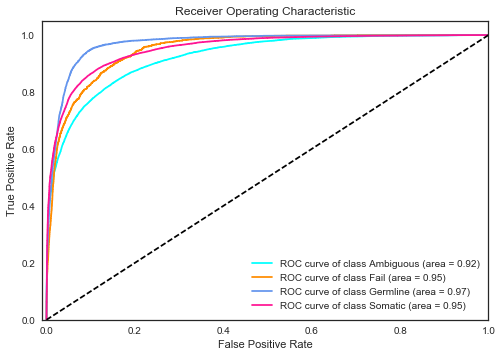

In [18]:
n_classes = Y.shape[1]
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Germline', 3: 'Somatic'}
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.title('Receiver Operating Characteristic')
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = metrics.roc_curve(Y[:, i], probabilities[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0}'
             ' (area = {1:0.2f})'.format(class_lookup[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

confidence intervals +-:  [ 0.00039082  0.00358407  0.0055062   0.00664793  0.00779148  0.00738297
  0.00793836  0.00665025  0.00504016  0.001231  ]


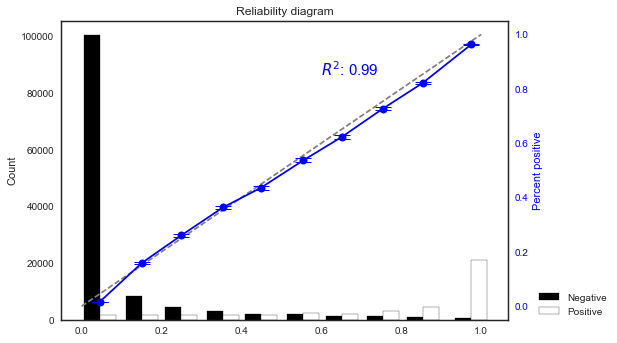

In [19]:
create_reliability_diagram(probabilities, Y, 
                           ['Ambiguous','Fail','Germline', 'Somatic'], 'blue')

## Feature importance analysis

In [20]:
feature_metrics = determine_feature_importance(baseline_model(), X, Y)

Epoch 1/10
41654/41654 [==============================] - 8s - loss: 0.7342 - acc: 0.7071     
Epoch 2/10
41654/41654 [==============================] - 8s - loss: 0.5892 - acc: 0.7702     
Epoch 3/10
41654/41654 [==============================] - 7s - loss: 0.5584 - acc: 0.7838     
Epoch 4/10
41654/41654 [==============================] - 8s - loss: 0.5346 - acc: 0.7924     
Epoch 5/10
41654/41654 [==============================] - 8s - loss: 0.5233 - acc: 0.7941     
Epoch 6/10
41654/41654 [==============================] - 9s - loss: 0.5137 - acc: 0.7987     
Epoch 7/10
41654/41654 [==============================] - 9s - loss: 0.5075 - acc: 0.8005     
Epoch 8/10
41654/41654 [==============================] - 8s - loss: 0.5007 - acc: 0.8021     
Epoch 9/10
41654/41654 [==============================] - 8s - loss: 0.4951 - acc: 0.8056     
Epoch 10/10
41024/41654 [============================>.] - ETA: 0s

In [22]:
feature_metrics.head(15)

feature  shuffled_auc  delta_auc
0                                      disease      0.798737   0.142646
1                                     reviewer      0.856427   0.084955
31                                   tumor_VAF      0.856600   0.084782
47                   tumor_var_avg_basequality      0.891721   0.049662
51               tumor_var_avg_mapping_quality      0.893853   0.047529
48                tumor_var_avg_clipped_length      0.908359   0.033024
55        tumor_var_avg_sum_mismatch_qualities      0.919242   0.022141
54            tumor_var_avg_se_mapping_quality      0.921882   0.019501
49  tumor_var_avg_distance_to_effective_3p_end      0.927254   0.014129
2                                   normal_VAF      0.933360   0.008023
19               normal_var_avg_clipped_length      0.935165   0.006218
12           normal_ref_avg_se_mapping_quality      0.935257   0.006126
41            tumor_ref_avg_se_mapping_quality      0.935450   0.005933
39     tumor_ref_avg_num_mismaches_as_fraction      0.936575   0.004808
52     tumor_var_avg_num_mismaches_as_fraction      0.937324   0.004058

## Refactor to single class classifier 
Manual reviewer's calling variants germline is problematic as the callers that produced the calls are designed to call somatic variants. These germline calls are likely very poor quality and in most analysis streams get thrown out anyway. While 'ambigous' variant exist in a grey area where the reviewer is unsure whether to call the variant somatic or fail. All of these classes (germile, ambiguous, and fail) are treated the same in downstream analysis (thrown out).

In [22]:
training_data.groupby('call').size()

call
a    14589
f     1600
g     4309
s    21156
dtype: int64

In [5]:
training_data['binary_call'] = training_data.call.replace(['a', 'f', 'g'], False)
training_data['binary_call'] = training_data['binary_call'].replace('s', True)

In [24]:
training_data.groupby('binary_call').size()

binary_call
False    20498
True     21156
dtype: int64

In [25]:
# Get Labels
binary_Y = training_data.binary_call.astype(int).values
# Get training data as numpy array
X = training_data.drop(['call', 'binary_call'], axis=1).astype(float).values

In [26]:
X.shape

(41654, 71)

In [27]:
binary_Y.shape

(41654,)

In [28]:
# define baseline model
def baseline_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(67, input_dim=71, kernel_initializer='normal', activation='relu'))
    model.add(Dense(23, activation='relu'))
    model.add(Dense(23, activation='relu'))
    model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [29]:
binary_estimator = KerasClassifier(build_fn=baseline_binary_model, epochs=10, batch_size=5, verbose=1)

In [30]:
binary_kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [31]:
if not os.path.exists('../data/deep_learning/binary_relu_probs.npy'):
    binary_probabilities = cross_val_predict(binary_estimator, X, binary_Y, cv=binary_kfold, method='predict_proba')
    np.save('../data/deep_learning/binary_relu_probs.npy', binary_probabilities)
else:
    binary_probabilities = np.load('../data/deep_learning/binary_relu_probs.npy')

In [32]:
predicted = np.array([list(a).index(max(list(a))) for a in list(binary_probabilities)])

In [33]:
metrics.accuracy_score(binary_Y, predicted)

0.8684159984635329

In [34]:
print(metrics.classification_report(binary_Y, predicted))

             precision    recall  f1-score   support

          0       0.87      0.86      0.87     20498
          1       0.87      0.88      0.87     21156

avg / total       0.87      0.87      0.87     41654



In [35]:
somatic_prob = binary_probabilities[:,1]

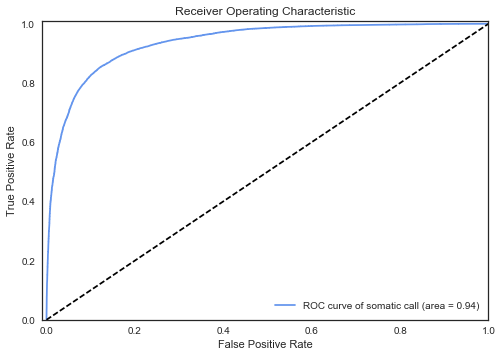

In [36]:
plt.title('Receiver Operating Characteristic')
fpr, tpr, _ = metrics.roc_curve(binary_Y, somatic_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='cornflowerblue',label='ROC curve of somatic call'
         ' (area = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

confidence intervals +-:  [ 0.00114263  0.00458546  0.00605786  0.00837481  0.00915538  0.01047418
  0.01036666  0.00957446  0.00714201  0.00143816]


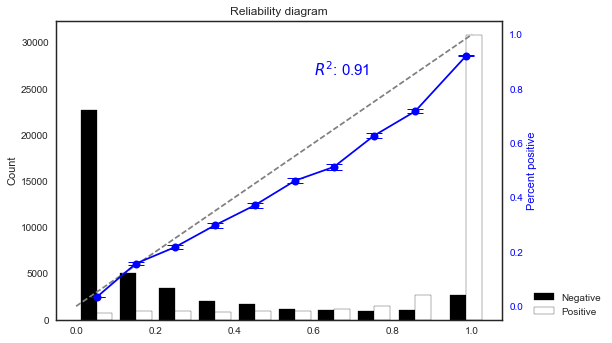

In [37]:
create_reliability_diagram(binary_probabilities, np.array([np.logical_not(binary_Y),binary_Y]).T,['Fail', 'Somatic'], 'blue')

## Feature importance analysis

In [16]:
feature_metrics = determine_feature_importance(baseline_binary_model(), X, np.array([np.logical_not(binary_Y),binary_Y]).T)

NameError: name 'baseline_binary_model' is not defined

In [39]:
feature_metrics.head(15)

feature  shuffled_loss  \
31                                       tumor_VAF       0.650099   
0                                          disease       0.580268   
1                                         reviewer       0.541300   
48                    tumor_var_avg_clipped_length       0.421468   
51                   tumor_var_avg_mapping_quality       0.446473   
47                       tumor_var_avg_basequality       0.371773   
49      tumor_var_avg_distance_to_effective_3p_end       0.359545   
55            tumor_var_avg_sum_mismatch_qualities       0.347787   
2                                       normal_VAF       0.348813   
39         tumor_ref_avg_num_mismaches_as_fraction       0.320667   
54                tumor_var_avg_se_mapping_quality       0.319356   
50  tumor_var_avg_distance_to_q2_start_in_q2_reads       0.321677   
18                      normal_var_avg_basequality       0.318450   
52         tumor_var_avg_num_mismaches_as_fraction       0.315431   
53                   tumor_var_avg_pos_as_fraction       0.315785   

    shuffled_accuracy  delta_loss  delta_accuracy  
31           0.756614   -0.344648        0.114947  
0            0.757718   -0.274816        0.113843  
1            0.787920   -0.235849        0.083641  
48           0.814952   -0.116017        0.056609  
51           0.817160   -0.141022        0.054401  
47           0.837639   -0.066321        0.033922  
49           0.852211   -0.054093        0.019350  
55           0.852307   -0.042335        0.019254  
2            0.859533   -0.043362        0.012028  
39           0.865007   -0.015215        0.006554  
54           0.865247   -0.013905        0.006314  
50           0.865823   -0.016225        0.005738  
18           0.866447   -0.012999        0.005114  
52           0.866735   -0.009979        0.004825  
53           0.866952   -0.010333        0.004609

## Elu activation function

In [40]:
# define baseline model
def baseline_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(67, input_dim=71, kernel_initializer='normal', activation='elu'))
    model.add(Dense(23, activation='elu'))
    model.add(Dense(23, activation='elu'))
    model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [41]:
binary_estimator = KerasClassifier(build_fn=baseline_binary_model, epochs=10, batch_size=5, verbose=1)

In [42]:
binary_kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [43]:
if not os.path.exists('../data/deep_learning/binary_elu_probs.npy'):
    binary_probabilities = cross_val_predict(binary_estimator, X, binary_Y, cv=binary_kfold, method='predict_proba')
    np.save('../data/deep_learning/binary_elu_probs.npy', binary_probabilities)
else:
    binary_probabilities = np.load('../data/deep_learning/binary_elu_probs.npy')

Epoch 1/10
37488/37488 [==============================] - 32s - loss: 0.4356 - acc: 0.8067    
Epoch 2/10
37488/37488 [==============================] - 34s - loss: 0.3765 - acc: 0.8384    
Epoch 3/10
37488/37488 [==============================] - 31s - loss: 0.3591 - acc: 0.8484    
Epoch 4/10
37488/37488 [==============================] - 32s - loss: 0.3486 - acc: 0.8527    
Epoch 5/10
37488/37488 [==============================] - 31s - loss: 0.3406 - acc: 0.8571    
Epoch 6/10
37488/37488 [==============================] - 32s - loss: 0.3344 - acc: 0.8582    
Epoch 7/10
37488/37488 [==============================] - 32s - loss: 0.3302 - acc: 0.8603    
Epoch 8/10
37488/37488 [==============================] - 30s - loss: 0.3258 - acc: 0.8619    
Epoch 9/10
37488/37488 [==============================] - 31s - loss: 0.3221 - acc: 0.8638    
Epoch 10/10
37488/37488 [==============================] - 30s - loss: 0.4394 - acc: 0.8069    
Epoch 2/10
37488/37488 [=========================

In [44]:
predicted = np.array([list(a).index(max(list(a))) for a in list(binary_probabilities)])

In [45]:
metrics.accuracy_score(binary_Y, predicted)

0.86419071397704905

In [46]:
print(metrics.classification_report(binary_Y, predicted))

             precision    recall  f1-score   support

          0       0.86      0.86      0.86     20498
          1       0.87      0.86      0.87     21156

avg / total       0.86      0.86      0.86     41654



In [47]:
somatic_prob = binary_probabilities[:,1]

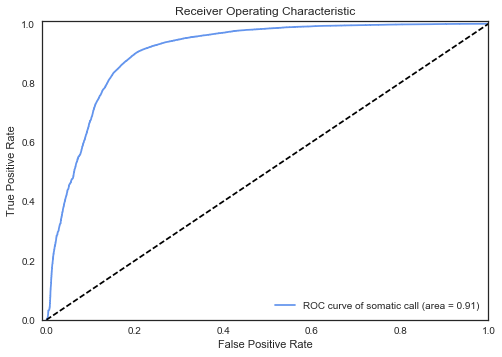

In [48]:
plt.title('Receiver Operating Characteristic')
fpr, tpr, _ = metrics.roc_curve(binary_Y, somatic_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='cornflowerblue',label='ROC curve of somatic call'
         ' (area = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

confidence intervals +-:  [ 0.00128496  0.00446677  0.00683209  0.00932325  0.0088213   0.00740925
  0.00592803  0.00563814  0.00452751  0.00197963]


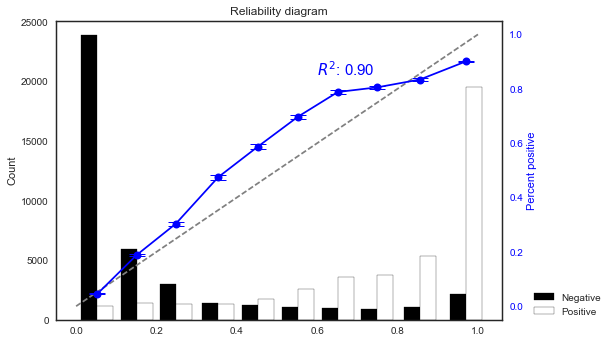

In [49]:

create_reliability_diagram(binary_probabilities, np.array([np.logical_not(binary_Y),binary_Y]).T,['Fail', 'Somatic'], 'blue')

## Feature importance analysis

In [50]:
feature_metrics = determine_feature_importance(baseline_binary_model(), X, np.array([np.logical_not(binary_Y),binary_Y]).T)

Epoch 1/10
41654/41654 [==============================] - 37s - loss: 0.4304 - acc: 0.8101    
Epoch 2/10
41654/41654 [==============================] - 38s - loss: 0.3686 - acc: 0.8441    
Epoch 3/10
41654/41654 [==============================] - 40s - loss: 0.3552 - acc: 0.8503    
Epoch 4/10
41654/41654 [==============================] - 39s - loss: 0.3432 - acc: 0.8553    
Epoch 5/10
41654/41654 [==============================] - 34s - loss: 0.3351 - acc: 0.8579    
Epoch 6/10
41654/41654 [==============================] - 42s - loss: 0.3276 - acc: 0.8625    
Epoch 7/10
41654/41654 [==============================] - 40s - loss: 0.3218 - acc: 0.8643    
Epoch 8/10
41654/41654 [==============================] - 42s - loss: 0.3184 - acc: 0.8657    
Epoch 9/10
41654/41654 [==============================] - 42s - loss: 0.3142 - acc: 0.8664    
Epoch 10/10
41650/41654 [============================>.] - ETA: 0s

In [51]:
feature_metrics.head(15)

feature  shuffled_loss  \
0                                      disease       0.580244   
31                                   tumor_VAF       0.626417   
1                                     reviewer       0.553894   
47                   tumor_var_avg_basequality       0.427446   
51               tumor_var_avg_mapping_quality       0.457023   
48                tumor_var_avg_clipped_length       0.389558   
55        tumor_var_avg_sum_mismatch_qualities       0.349348   
2                                   normal_VAF       0.351961   
49  tumor_var_avg_distance_to_effective_3p_end       0.340665   
54            tumor_var_avg_se_mapping_quality       0.333058   
52     tumor_var_avg_num_mismaches_as_fraction       0.321120   
39     tumor_ref_avg_num_mismaches_as_fraction       0.324276   
18                  normal_var_avg_basequality       0.315724   
19               normal_var_avg_clipped_length       0.318664   
13       normal_ref_avg_sum_mismatch_qualities       0.315673   

    shuffled_accuracy  delta_loss  delta_accuracy  
0            0.750204   -0.274385        0.117780  
31           0.752293   -0.320557        0.115691  
1            0.791185   -0.248034        0.076799  
47           0.811087   -0.121586        0.056897  
51           0.813439   -0.151164        0.054545  
48           0.828780   -0.083698        0.039204  
55           0.850915   -0.043488        0.017069  
2            0.853579   -0.046101        0.014404  
49           0.855452   -0.034806        0.012532  
54           0.857685   -0.027198        0.010299  
52           0.860085   -0.015260        0.007898  
39           0.861982   -0.018416        0.006002  
18           0.862678   -0.009864        0.005306  
19           0.862918   -0.012804        0.005066  
13           0.863350   -0.009813        0.004633

# Somatic, ambigous, fail classifier

In [6]:
three_class = training_data.replace('g','f')

In [7]:
three_class.groupby('call').size()

call
a    14589
f     5909
s    21156
dtype: int64

In [8]:
# Get Labels
Y = pd.get_dummies(three_class.call).astype(float).values
# Get training data as numpy array
X = training_data.drop(['call', 'binary_call'], axis=1).astype(float).values

In [9]:
X.shape

(41654, 71)

In [10]:
Y.shape

(41654, 3)

In [11]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [12]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(67, input_dim=71, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(3, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=700, batch_size=2000, verbose=1)

In [14]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [15]:
if not os.path.exists('../data/deep_learning/threeclass_tanh_probs.npy'):
    probabilities = cross_val_predict(estimator, X, Y, cv=kfold, method='predict_proba')
    np.save('../data/deep_learning/threeclass_tanh_probs.npy', probabilities)
else:
    probabilities = np.load('../data/deep_learning/threeclass_tanh_probs.npy')

Epoch 1/700
37488/37488 [==============================] - 0s - loss: 1.0472 - acc: 0.4773     
Epoch 2/700
37488/37488 [==============================] - 0s - loss: 0.9540 - acc: 0.5473     
Epoch 3/700
37488/37488 [==============================] - 0s - loss: 0.8676 - acc: 0.6130     
Epoch 4/700
37488/37488 [==============================] - 0s - loss: 0.7784 - acc: 0.6686     
Epoch 5/700
37488/37488 [==============================] - 0s - loss: 0.7022 - acc: 0.7165     
Epoch 6/700
37488/37488 [==============================] - 0s - loss: 0.6570 - acc: 0.7376     
Epoch 7/700
37488/37488 [==============================] - 0s - loss: 0.6350 - acc: 0.7479     
Epoch 8/700
37488/37488 [==============================] - 0s - loss: 0.6206 - acc: 0.7532     
Epoch 9/700
37488/37488 [==============================] - 0s - loss: 0.6149 - acc: 0.7562     
Epoch 10/700
37488/37488 [==============================] - 0s - loss: 0.6053 - acc: 0.7597     
Epoch 11/700
37488/37488 [=============

37488/37488 [==============================] - 0s - loss: 0.4209 - acc: 0.8278     
Epoch 168/700
37488/37488 [==============================] - 0s - loss: 0.4233 - acc: 0.8273     
Epoch 169/700
37488/37488 [==============================] - 0s - loss: 0.4234 - acc: 0.8266     
Epoch 170/700
37488/37488 [==============================] - 0s - loss: 0.4213 - acc: 0.8269     
Epoch 171/700
37488/37488 [==============================] - 0s - loss: 0.4208 - acc: 0.8274     
Epoch 172/700
37488/37488 [==============================] - 0s - loss: 0.4204 - acc: 0.8271     
Epoch 173/700
37488/37488 [==============================] - 0s - loss: 0.4217 - acc: 0.8265     
Epoch 174/700
37488/37488 [==============================] - 0s - loss: 0.4213 - acc: 0.8275     
Epoch 175/700
37488/37488 [==============================] - 0s - loss: 0.4203 - acc: 0.8280     
Epoch 176/700
37488/37488 [==============================] - 0s - loss: 0.4198 - acc: 0.8283     
Epoch 177/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.3992 - acc: 0.8358     
Epoch 334/700
37488/37488 [==============================] - 0s - loss: 0.4042 - acc: 0.8346     
Epoch 335/700
37488/37488 [==============================] - 0s - loss: 0.4002 - acc: 0.8342     
Epoch 336/700
37488/37488 [==============================] - 0s - loss: 0.3980 - acc: 0.8353     
Epoch 337/700
37488/37488 [==============================] - 0s - loss: 0.3989 - acc: 0.8358     
Epoch 338/700
37488/37488 [==============================] - 0s - loss: 0.3995 - acc: 0.8350     
Epoch 339/700
37488/37488 [==============================] - 0s - loss: 0.4006 - acc: 0.8345     
Epoch 340/700
37488/37488 [==============================] - 0s - loss: 0.3991 - acc: 0.8338     
Epoch 341/700
37488/37488 [==============================] - 0s - loss: 0.4016 - acc: 0.8354     
Epoch 342/700
37488/37488 [==============================] - 0s - loss: 0.4010 - acc: 0.8348     
Epoch 343/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.3864 - acc: 0.8413     
Epoch 500/700
37488/37488 [==============================] - 0s - loss: 0.3833 - acc: 0.8415     
Epoch 501/700
37488/37488 [==============================] - 0s - loss: 0.3857 - acc: 0.8413     
Epoch 502/700
37488/37488 [==============================] - 0s - loss: 0.3857 - acc: 0.8412     
Epoch 503/700
37488/37488 [==============================] - 0s - loss: 0.3848 - acc: 0.8409     
Epoch 504/700
37488/37488 [==============================] - 0s - loss: 0.3824 - acc: 0.8428     
Epoch 505/700
37488/37488 [==============================] - 0s - loss: 0.3851 - acc: 0.8408     
Epoch 506/700
37488/37488 [==============================] - 0s - loss: 0.3842 - acc: 0.8421     
Epoch 507/700
37488/37488 [==============================] - 0s - loss: 0.3832 - acc: 0.8424     
Epoch 508/700
37488/37488 [==============================] - 0s - loss: 0.3850 - acc: 0.8421     
Epoch 509/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.3736 - acc: 0.8457     
Epoch 666/700
37488/37488 [==============================] - 0s - loss: 0.3746 - acc: 0.8453     
Epoch 667/700
37488/37488 [==============================] - 0s - loss: 0.3778 - acc: 0.8442     
Epoch 668/700
37488/37488 [==============================] - 0s - loss: 0.3767 - acc: 0.8448     
Epoch 669/700
37488/37488 [==============================] - 0s - loss: 0.3768 - acc: 0.8428     
Epoch 670/700
37488/37488 [==============================] - 0s - loss: 0.3723 - acc: 0.8461     
Epoch 671/700
37488/37488 [==============================] - 0s - loss: 0.3736 - acc: 0.8458     
Epoch 672/700
37488/37488 [==============================] - 0s - loss: 0.3779 - acc: 0.8445     
Epoch 673/700
37488/37488 [==============================] - 0s - loss: 0.3723 - acc: 0.8461     
Epoch 674/700
37488/37488 [==============================] - 0s - loss: 0.3742 - acc: 0.8448     
Epoch 675/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4245 - acc: 0.8275     
Epoch 132/700
37488/37488 [==============================] - 0s - loss: 0.4240 - acc: 0.8274     
Epoch 133/700
37488/37488 [==============================] - 0s - loss: 0.4264 - acc: 0.8261     
Epoch 134/700
37488/37488 [==============================] - 0s - loss: 0.4233 - acc: 0.8273     
Epoch 135/700
37488/37488 [==============================] - 0s - loss: 0.4230 - acc: 0.8270     
Epoch 136/700
37488/37488 [==============================] - 0s - loss: 0.4214 - acc: 0.8275     
Epoch 137/700
37488/37488 [==============================] - 0s - loss: 0.4224 - acc: 0.8284     
Epoch 138/700
37488/37488 [==============================] - 0s - loss: 0.4219 - acc: 0.8276     
Epoch 139/700
37488/37488 [==============================] - 0s - loss: 0.4247 - acc: 0.8269     
Epoch 140/700
37488/37488 [==============================] - 0s - loss: 0.4236 - acc: 0.8279     
Epoch 141/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.3977 - acc: 0.8362     
Epoch 298/700
37488/37488 [==============================] - 0s - loss: 0.3967 - acc: 0.8373     
Epoch 299/700
37488/37488 [==============================] - 0s - loss: 0.3982 - acc: 0.8366     
Epoch 300/700
37488/37488 [==============================] - 0s - loss: 0.3945 - acc: 0.8384     
Epoch 301/700
37488/37488 [==============================] - 0s - loss: 0.3935 - acc: 0.8375     
Epoch 302/700
37488/37488 [==============================] - 0s - loss: 0.3941 - acc: 0.8370     
Epoch 303/700
37488/37488 [==============================] - 0s - loss: 0.3947 - acc: 0.8379     
Epoch 304/700
37488/37488 [==============================] - 0s - loss: 0.3953 - acc: 0.8378     
Epoch 305/700
37488/37488 [==============================] - 0s - loss: 0.3933 - acc: 0.8382     
Epoch 306/700
37488/37488 [==============================] - 0s - loss: 0.3937 - acc: 0.8381     
Epoch 307/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.3828 - acc: 0.8422     
Epoch 464/700
37488/37488 [==============================] - 0s - loss: 0.3817 - acc: 0.8425     
Epoch 465/700
37488/37488 [==============================] - 0s - loss: 0.3816 - acc: 0.8433     
Epoch 466/700
37488/37488 [==============================] - 0s - loss: 0.3853 - acc: 0.8417     
Epoch 467/700
37488/37488 [==============================] - 0s - loss: 0.3832 - acc: 0.8410     
Epoch 468/700
37488/37488 [==============================] - 0s - loss: 0.3826 - acc: 0.8428     
Epoch 469/700
37488/37488 [==============================] - 0s - loss: 0.3811 - acc: 0.8425     
Epoch 470/700
37488/37488 [==============================] - 0s - loss: 0.3816 - acc: 0.8423     
Epoch 471/700
37488/37488 [==============================] - 0s - loss: 0.3815 - acc: 0.8426     
Epoch 472/700
37488/37488 [==============================] - 0s - loss: 0.3832 - acc: 0.8427     
Epoch 473/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.3754 - acc: 0.8456     
Epoch 630/700
37488/37488 [==============================] - 0s - loss: 0.3730 - acc: 0.8462     
Epoch 631/700
37488/37488 [==============================] - 0s - loss: 0.3744 - acc: 0.8453     
Epoch 632/700
37488/37488 [==============================] - 0s - loss: 0.3775 - acc: 0.8433     
Epoch 633/700
37488/37488 [==============================] - 0s - loss: 0.3760 - acc: 0.8456     
Epoch 634/700
37488/37488 [==============================] - 0s - loss: 0.3740 - acc: 0.8452     
Epoch 635/700
37488/37488 [==============================] - 0s - loss: 0.3766 - acc: 0.8447     
Epoch 636/700
37488/37488 [==============================] - 0s - loss: 0.3734 - acc: 0.8452     
Epoch 637/700
37488/37488 [==============================] - 0s - loss: 0.3728 - acc: 0.8456     
Epoch 638/700
37488/37488 [==============================] - 0s - loss: 0.3732 - acc: 0.8460     
Epoch 639/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.5723 - acc: 0.7738     
Epoch 13/700
37488/37488 [==============================] - 0s - loss: 0.5673 - acc: 0.7761     
Epoch 14/700
37488/37488 [==============================] - 0s - loss: 0.5636 - acc: 0.7767     
Epoch 15/700
37488/37488 [==============================] - 0s - loss: 0.5599 - acc: 0.7786     
Epoch 16/700
37488/37488 [==============================] - 0s - loss: 0.5558 - acc: 0.7796     
Epoch 17/700
37488/37488 [==============================] - 0s - loss: 0.5509 - acc: 0.7811     
Epoch 18/700
37488/37488 [==============================] - 0s - loss: 0.5473 - acc: 0.7828     
Epoch 19/700
37488/37488 [==============================] - 0s - loss: 0.5428 - acc: 0.7851     
Epoch 20/700
37488/37488 [==============================] - 0s - loss: 0.5414 - acc: 0.7851     
Epoch 21/700
37488/37488 [==============================] - 0s - loss: 0.5366 - acc: 0.7871     
Epoch 22/700
37488/37488 [=================

37488/37488 [==============================] - 0s - loss: 0.4148 - acc: 0.8294     
Epoch 180/700
37488/37488 [==============================] - 0s - loss: 0.4142 - acc: 0.8301     
Epoch 181/700
37488/37488 [==============================] - 0s - loss: 0.4143 - acc: 0.8300     
Epoch 182/700
37488/37488 [==============================] - 0s - loss: 0.4147 - acc: 0.8293     
Epoch 183/700
37488/37488 [==============================] - 0s - loss: 0.4167 - acc: 0.8292     
Epoch 184/700
37488/37488 [==============================] - 0s - loss: 0.4141 - acc: 0.8299     
Epoch 185/700
37488/37488 [==============================] - 0s - loss: 0.4126 - acc: 0.8314     
Epoch 186/700
37488/37488 [==============================] - 0s - loss: 0.4145 - acc: 0.8294     
Epoch 187/700
37488/37488 [==============================] - 0s - loss: 0.4127 - acc: 0.8309     
Epoch 188/700
37488/37488 [==============================] - 0s - loss: 0.4125 - acc: 0.8309     
Epoch 189/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.3899 - acc: 0.8382     
Epoch 346/700
37488/37488 [==============================] - 0s - loss: 0.3910 - acc: 0.8380     
Epoch 347/700
37488/37488 [==============================] - 0s - loss: 0.3906 - acc: 0.8386     
Epoch 348/700
37488/37488 [==============================] - 0s - loss: 0.3952 - acc: 0.8356     
Epoch 349/700
37488/37488 [==============================] - 0s - loss: 0.3920 - acc: 0.8377     
Epoch 350/700
37488/37488 [==============================] - 0s - loss: 0.3933 - acc: 0.8374     
Epoch 351/700
37488/37488 [==============================] - 0s - loss: 0.3920 - acc: 0.8373     
Epoch 352/700
37488/37488 [==============================] - 0s - loss: 0.3911 - acc: 0.8386     
Epoch 353/700
37488/37488 [==============================] - 0s - loss: 0.3907 - acc: 0.8381     
Epoch 354/700
37488/37488 [==============================] - 0s - loss: 0.3905 - acc: 0.8385     
Epoch 355/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.3793 - acc: 0.8414     
Epoch 512/700
37488/37488 [==============================] - 0s - loss: 0.3791 - acc: 0.8425     
Epoch 513/700
37488/37488 [==============================] - 0s - loss: 0.3778 - acc: 0.8431     
Epoch 514/700
37488/37488 [==============================] - 0s - loss: 0.3790 - acc: 0.8435     
Epoch 515/700
37488/37488 [==============================] - 0s - loss: 0.3785 - acc: 0.8426     
Epoch 516/700
37488/37488 [==============================] - 0s - loss: 0.3821 - acc: 0.8407     
Epoch 517/700
37488/37488 [==============================] - 0s - loss: 0.3786 - acc: 0.8426     
Epoch 518/700
37488/37488 [==============================] - 0s - loss: 0.3783 - acc: 0.8413     
Epoch 519/700
37488/37488 [==============================] - 0s - loss: 0.3770 - acc: 0.8425     
Epoch 520/700
37488/37488 [==============================] - 0s - loss: 0.3770 - acc: 0.8432     
Epoch 521/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.3676 - acc: 0.8462     
Epoch 678/700
37488/37488 [==============================] - 0s - loss: 0.3671 - acc: 0.8464     
Epoch 679/700
37488/37488 [==============================] - 0s - loss: 0.3675 - acc: 0.8455     
Epoch 680/700
37488/37488 [==============================] - 0s - loss: 0.3666 - acc: 0.8465     
Epoch 681/700
37488/37488 [==============================] - 0s - loss: 0.3706 - acc: 0.8454     
Epoch 682/700
37488/37488 [==============================] - 0s - loss: 0.3694 - acc: 0.8460     
Epoch 683/700
37488/37488 [==============================] - 0s - loss: 0.3695 - acc: 0.8468     
Epoch 684/700
37488/37488 [==============================] - 0s - loss: 0.3703 - acc: 0.8457     
Epoch 685/700
37488/37488 [==============================] - 0s - loss: 0.3710 - acc: 0.8459     
Epoch 686/700
37488/37488 [==============================] - 0s - loss: 0.3660 - acc: 0.8476     
Epoch 687/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4206 - acc: 0.8286     
Epoch 144/700
37488/37488 [==============================] - 0s - loss: 0.4190 - acc: 0.8286     
Epoch 145/700
37488/37488 [==============================] - 0s - loss: 0.4212 - acc: 0.8270     
Epoch 146/700
37488/37488 [==============================] - 0s - loss: 0.4189 - acc: 0.8291     
Epoch 147/700
37488/37488 [==============================] - 0s - loss: 0.4190 - acc: 0.8289     
Epoch 148/700
37488/37488 [==============================] - 0s - loss: 0.4187 - acc: 0.8294     
Epoch 149/700
37488/37488 [==============================] - 0s - loss: 0.4177 - acc: 0.8287     
Epoch 150/700
37488/37488 [==============================] - 0s - loss: 0.4176 - acc: 0.8294     - ETA: 0s - loss: 0.4157 - acc: 0.82
Epoch 151/700
37488/37488 [==============================] - 0s - loss: 0.4177 - acc: 0.8290     
Epoch 152/700
37488/37488 [==============================] - 0s - loss: 0.4171 - acc: 0.8294    

37488/37488 [==============================] - 0s - loss: 0.3953 - acc: 0.8376     
Epoch 310/700
37488/37488 [==============================] - 0s - loss: 0.3910 - acc: 0.8393     
Epoch 311/700
37488/37488 [==============================] - 0s - loss: 0.3934 - acc: 0.8384     
Epoch 312/700
37488/37488 [==============================] - 0s - loss: 0.3957 - acc: 0.8371     
Epoch 313/700
37488/37488 [==============================] - 0s - loss: 0.3941 - acc: 0.8382     
Epoch 314/700
37488/37488 [==============================] - 0s - loss: 0.3912 - acc: 0.8402     
Epoch 315/700
37488/37488 [==============================] - 0s - loss: 0.3900 - acc: 0.8401     
Epoch 316/700
37488/37488 [==============================] - 0s - loss: 0.3931 - acc: 0.8394     
Epoch 317/700
37488/37488 [==============================] - 0s - loss: 0.3947 - acc: 0.8379     - ETA: 0s - loss: 0.3967 - acc: 0.83
Epoch 318/700
37488/37488 [==============================] - 0s - loss: 0.3988 - acc: 0.8372    

37488/37488 [==============================] - 0s - loss: 0.3804 - acc: 0.8448     
Epoch 473/700
37488/37488 [==============================] - 0s - loss: 0.3790 - acc: 0.8442     
Epoch 474/700
37488/37488 [==============================] - 0s - loss: 0.3785 - acc: 0.8435     
Epoch 475/700
37488/37488 [==============================] - 0s - loss: 0.3795 - acc: 0.8439     
Epoch 476/700
37488/37488 [==============================] - 0s - loss: 0.3795 - acc: 0.8435     
Epoch 477/700
37488/37488 [==============================] - 0s - loss: 0.3802 - acc: 0.8437     
Epoch 478/700
37488/37488 [==============================] - 0s - loss: 0.3836 - acc: 0.8409     
Epoch 479/700
37488/37488 [==============================] - 0s - loss: 0.3812 - acc: 0.8428     
Epoch 480/700
37488/37488 [==============================] - 0s - loss: 0.3783 - acc: 0.8439     
Epoch 481/700
37488/37488 [==============================] - 0s - loss: 0.3774 - acc: 0.8448     
Epoch 482/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.3675 - acc: 0.8473     
Epoch 637/700
37488/37488 [==============================] - 0s - loss: 0.3679 - acc: 0.8481     
Epoch 638/700
37488/37488 [==============================] - 0s - loss: 0.3692 - acc: 0.8475     
Epoch 639/700
37488/37488 [==============================] - 0s - loss: 0.3708 - acc: 0.8471     
Epoch 640/700
37488/37488 [==============================] - 0s - loss: 0.3712 - acc: 0.8469     
Epoch 641/700
37488/37488 [==============================] - 0s - loss: 0.3677 - acc: 0.8479     
Epoch 642/700
37488/37488 [==============================] - 0s - loss: 0.3700 - acc: 0.8476     
Epoch 643/700
37488/37488 [==============================] - 0s - loss: 0.3702 - acc: 0.8466     
Epoch 644/700
37488/37488 [==============================] - 0s - loss: 0.3679 - acc: 0.8472     
Epoch 645/700
37488/37488 [==============================] - 0s - loss: 0.3707 - acc: 0.8471     
Epoch 646/700
37488/37488 [=======

37489/37489 [==============================] - 0s - loss: 0.5485 - acc: 0.7862     
Epoch 20/700
37489/37489 [==============================] - 0s - loss: 0.5428 - acc: 0.7887     
Epoch 21/700
37489/37489 [==============================] - 0s - loss: 0.5397 - acc: 0.7898     
Epoch 22/700
37489/37489 [==============================] - 0s - loss: 0.5353 - acc: 0.7899     
Epoch 23/700
37489/37489 [==============================] - 0s - loss: 0.5310 - acc: 0.7936     
Epoch 24/700
37489/37489 [==============================] - 0s - loss: 0.5275 - acc: 0.7930     
Epoch 25/700
37489/37489 [==============================] - 0s - loss: 0.5248 - acc: 0.7934     
Epoch 26/700
37489/37489 [==============================] - 0s - loss: 0.5199 - acc: 0.7952     
Epoch 27/700
37489/37489 [==============================] - 0s - loss: 0.5177 - acc: 0.7964     
Epoch 28/700
37489/37489 [==============================] - 0s - loss: 0.5148 - acc: 0.7966     
Epoch 29/700
37489/37489 [=================

37489/37489 [==============================] - 0s - loss: 0.4104 - acc: 0.8310     
Epoch 186/700
37489/37489 [==============================] - 0s - loss: 0.4113 - acc: 0.8301     
Epoch 187/700
37489/37489 [==============================] - 0s - loss: 0.4119 - acc: 0.8296     
Epoch 188/700
37489/37489 [==============================] - 0s - loss: 0.4139 - acc: 0.8299     
Epoch 189/700
37489/37489 [==============================] - 0s - loss: 0.4097 - acc: 0.8305     
Epoch 190/700
37489/37489 [==============================] - 0s - loss: 0.4087 - acc: 0.8308     
Epoch 191/700
37489/37489 [==============================] - 0s - loss: 0.4093 - acc: 0.8323     
Epoch 192/700
37489/37489 [==============================] - 0s - loss: 0.4083 - acc: 0.8320     
Epoch 193/700
37489/37489 [==============================] - 0s - loss: 0.4084 - acc: 0.8320     
Epoch 194/700
37489/37489 [==============================] - 0s - loss: 0.4089 - acc: 0.8301     
Epoch 195/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3867 - acc: 0.8399     
Epoch 352/700
37489/37489 [==============================] - 0s - loss: 0.3874 - acc: 0.8398     
Epoch 353/700
37489/37489 [==============================] - 0s - loss: 0.3881 - acc: 0.8405     
Epoch 354/700
37489/37489 [==============================] - 0s - loss: 0.3870 - acc: 0.8413     
Epoch 355/700
37489/37489 [==============================] - 0s - loss: 0.3858 - acc: 0.8413     
Epoch 356/700
37489/37489 [==============================] - 0s - loss: 0.3856 - acc: 0.8401     
Epoch 357/700
37489/37489 [==============================] - 0s - loss: 0.3881 - acc: 0.8400     
Epoch 358/700
37489/37489 [==============================] - 0s - loss: 0.3895 - acc: 0.8403     
Epoch 359/700
37489/37489 [==============================] - 0s - loss: 0.3858 - acc: 0.8421     
Epoch 360/700
37489/37489 [==============================] - 0s - loss: 0.3868 - acc: 0.8408     
Epoch 361/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3787 - acc: 0.8436     
Epoch 517/700
37489/37489 [==============================] - 0s - loss: 0.3761 - acc: 0.8449     
Epoch 518/700
37489/37489 [==============================] - 0s - loss: 0.3785 - acc: 0.8451     
Epoch 519/700
37489/37489 [==============================] - 0s - loss: 0.3772 - acc: 0.8450     
Epoch 520/700
37489/37489 [==============================] - 0s - loss: 0.3754 - acc: 0.8454     
Epoch 521/700
37489/37489 [==============================] - 0s - loss: 0.3746 - acc: 0.8463     
Epoch 522/700
37489/37489 [==============================] - 0s - loss: 0.3760 - acc: 0.8446     
Epoch 523/700
37489/37489 [==============================] - 0s - loss: 0.3756 - acc: 0.8453     
Epoch 524/700
37489/37489 [==============================] - 0s - loss: 0.3739 - acc: 0.8456     
Epoch 525/700
37489/37489 [==============================] - 0s - loss: 0.3751 - acc: 0.8438     
Epoch 526/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3674 - acc: 0.8486     
Epoch 683/700
37489/37489 [==============================] - 0s - loss: 0.3664 - acc: 0.8489     
Epoch 684/700
37489/37489 [==============================] - 0s - loss: 0.3656 - acc: 0.8488     
Epoch 685/700
37489/37489 [==============================] - 0s - loss: 0.3653 - acc: 0.8494     
Epoch 686/700
37489/37489 [==============================] - 0s - loss: 0.3687 - acc: 0.8475     
Epoch 687/700
37489/37489 [==============================] - 0s - loss: 0.3670 - acc: 0.8494     
Epoch 688/700
37489/37489 [==============================] - 0s - loss: 0.3642 - acc: 0.8484     
Epoch 689/700
37489/37489 [==============================] - 0s - loss: 0.3651 - acc: 0.8494     
Epoch 690/700
37489/37489 [==============================] - 0s - loss: 0.3658 - acc: 0.8491     
Epoch 691/700
37489/37489 [==============================] - 0s - loss: 0.3652 - acc: 0.8495     
Epoch 692/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4259 - acc: 0.8262     
Epoch 148/700
37489/37489 [==============================] - 0s - loss: 0.4218 - acc: 0.8267     
Epoch 149/700
37489/37489 [==============================] - 0s - loss: 0.4229 - acc: 0.8275     
Epoch 150/700
37489/37489 [==============================] - 0s - loss: 0.4225 - acc: 0.8265     
Epoch 151/700
37489/37489 [==============================] - 0s - loss: 0.4224 - acc: 0.8275     
Epoch 152/700
37489/37489 [==============================] - 0s - loss: 0.4207 - acc: 0.8282     
Epoch 153/700
37489/37489 [==============================] - 0s - loss: 0.4228 - acc: 0.8251     
Epoch 154/700
37489/37489 [==============================] - 0s - loss: 0.4250 - acc: 0.8251     
Epoch 155/700
37489/37489 [==============================] - 0s - loss: 0.4211 - acc: 0.8279     
Epoch 156/700
37489/37489 [==============================] - 0s - loss: 0.4210 - acc: 0.8269     
Epoch 157/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4052 - acc: 0.8327     
Epoch 231/700
37489/37489 [==============================] - 0s - loss: 0.4028 - acc: 0.8333     
Epoch 232/700
37489/37489 [==============================] - 0s - loss: 0.4042 - acc: 0.8337     
Epoch 233/700
37489/37489 [==============================] - 0s - loss: 0.4028 - acc: 0.8343     
Epoch 234/700
37489/37489 [==============================] - 0s - loss: 0.4064 - acc: 0.8332     
Epoch 235/700
37489/37489 [==============================] - 0s - loss: 0.4036 - acc: 0.8328     
Epoch 236/700
37489/37489 [==============================] - 0s - loss: 0.4058 - acc: 0.8334     
Epoch 237/700
37489/37489 [==============================] - 0s - loss: 0.4062 - acc: 0.8333     
Epoch 238/700
37489/37489 [==============================] - 0s - loss: 0.4025 - acc: 0.8334     
Epoch 239/700
37489/37489 [==============================] - 0s - loss: 0.4048 - acc: 0.8333     
Epoch 240/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3840 - acc: 0.8428     
Epoch 397/700
37489/37489 [==============================] - 0s - loss: 0.3844 - acc: 0.8410     
Epoch 398/700
37489/37489 [==============================] - 0s - loss: 0.3841 - acc: 0.8427     
Epoch 399/700
37489/37489 [==============================] - 0s - loss: 0.3848 - acc: 0.8416     
Epoch 400/700
37489/37489 [==============================] - 0s - loss: 0.3828 - acc: 0.8428     
Epoch 401/700
37489/37489 [==============================] - 0s - loss: 0.3852 - acc: 0.8417     
Epoch 402/700
37489/37489 [==============================] - 0s - loss: 0.3868 - acc: 0.8416     
Epoch 403/700
37489/37489 [==============================] - 0s - loss: 0.3861 - acc: 0.8416     
Epoch 404/700
37489/37489 [==============================] - 0s - loss: 0.3853 - acc: 0.8413     
Epoch 405/700
37489/37489 [==============================] - 0s - loss: 0.3846 - acc: 0.8421     
Epoch 406/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3750 - acc: 0.8462     
Epoch 563/700
37489/37489 [==============================] - 0s - loss: 0.3750 - acc: 0.8454     
Epoch 564/700
37489/37489 [==============================] - 0s - loss: 0.3737 - acc: 0.8457     
Epoch 565/700
37489/37489 [==============================] - 0s - loss: 0.3790 - acc: 0.8437     
Epoch 566/700
37489/37489 [==============================] - 0s - loss: 0.3761 - acc: 0.8460     
Epoch 567/700
37489/37489 [==============================] - 0s - loss: 0.3740 - acc: 0.8470     
Epoch 568/700
37489/37489 [==============================] - 0s - loss: 0.3751 - acc: 0.8456     
Epoch 569/700
37489/37489 [==============================] - 0s - loss: 0.3750 - acc: 0.8465     
Epoch 570/700
37489/37489 [==============================] - 0s - loss: 0.3751 - acc: 0.8452     
Epoch 571/700
37489/37489 [==============================] - 0s - loss: 0.3745 - acc: 0.8453     
Epoch 572/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.5122 - acc: 0.7961     
Epoch 29/700
37489/37489 [==============================] - 0s - loss: 0.5088 - acc: 0.7976     
Epoch 30/700
37489/37489 [==============================] - 0s - loss: 0.5063 - acc: 0.7988     
Epoch 31/700
37489/37489 [==============================] - 0s - loss: 0.5087 - acc: 0.7969     
Epoch 32/700
37489/37489 [==============================] - 0s - loss: 0.5157 - acc: 0.7943     
Epoch 33/700
37489/37489 [==============================] - 0s - loss: 0.5067 - acc: 0.7979     
Epoch 34/700
37489/37489 [==============================] - 0s - loss: 0.5001 - acc: 0.8014     
Epoch 35/700
37489/37489 [==============================] - 0s - loss: 0.4993 - acc: 0.8017     
Epoch 36/700
37489/37489 [==============================] - 0s - loss: 0.4962 - acc: 0.8031     
Epoch 37/700
37489/37489 [==============================] - 0s - loss: 0.4965 - acc: 0.8025     
Epoch 38/700
37489/37489 [=================

37489/37489 [==============================] - 0s - loss: 0.4308 - acc: 0.8250     
Epoch 113/700
37489/37489 [==============================] - 0s - loss: 0.4311 - acc: 0.8239     
Epoch 114/700
37489/37489 [==============================] - 0s - loss: 0.4324 - acc: 0.8240     
Epoch 115/700
37489/37489 [==============================] - 0s - loss: 0.4318 - acc: 0.8245     
Epoch 116/700
37489/37489 [==============================] - 0s - loss: 0.4317 - acc: 0.8228     
Epoch 117/700
37489/37489 [==============================] - 0s - loss: 0.4300 - acc: 0.8242     
Epoch 118/700
37489/37489 [==============================] - 0s - loss: 0.4301 - acc: 0.8243     
Epoch 119/700
37489/37489 [==============================] - 0s - loss: 0.4298 - acc: 0.8248     
Epoch 120/700
37489/37489 [==============================] - 0s - loss: 0.4288 - acc: 0.8253     
Epoch 121/700
37489/37489 [==============================] - 0s - loss: 0.4317 - acc: 0.8235     
Epoch 122/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4019 - acc: 0.8347     
Epoch 279/700
37489/37489 [==============================] - 0s - loss: 0.3996 - acc: 0.8345     
Epoch 280/700
37489/37489 [==============================] - 0s - loss: 0.3991 - acc: 0.8340     
Epoch 281/700
37489/37489 [==============================] - 0s - loss: 0.3992 - acc: 0.8348     
Epoch 282/700
37489/37489 [==============================] - 0s - loss: 0.4004 - acc: 0.8343     
Epoch 283/700
37489/37489 [==============================] - 0s - loss: 0.4008 - acc: 0.8347     
Epoch 284/700
37489/37489 [==============================] - 0s - loss: 0.3988 - acc: 0.8353     
Epoch 285/700
37489/37489 [==============================] - 0s - loss: 0.4010 - acc: 0.8348     
Epoch 286/700
37489/37489 [==============================] - 0s - loss: 0.3997 - acc: 0.8353     
Epoch 287/700
37489/37489 [==============================] - 0s - loss: 0.3988 - acc: 0.8346     
Epoch 288/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3884 - acc: 0.8397     
Epoch 445/700
37489/37489 [==============================] - 0s - loss: 0.3876 - acc: 0.8387     
Epoch 446/700
37489/37489 [==============================] - 0s - loss: 0.3887 - acc: 0.8386     
Epoch 447/700
37489/37489 [==============================] - 0s - loss: 0.3885 - acc: 0.8394     
Epoch 448/700
37489/37489 [==============================] - 0s - loss: 0.3904 - acc: 0.8381     
Epoch 449/700
37489/37489 [==============================] - 0s - loss: 0.3866 - acc: 0.8399     
Epoch 450/700
37489/37489 [==============================] - 0s - loss: 0.3879 - acc: 0.8401     
Epoch 451/700
37489/37489 [==============================] - 0s - loss: 0.3891 - acc: 0.8389     
Epoch 452/700
37489/37489 [==============================] - 0s - loss: 0.3890 - acc: 0.8391     
Epoch 453/700
37489/37489 [==============================] - 0s - loss: 0.3855 - acc: 0.8408     
Epoch 454/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3777 - acc: 0.8420     
Epoch 611/700
37489/37489 [==============================] - 0s - loss: 0.3808 - acc: 0.8409     
Epoch 612/700
37489/37489 [==============================] - 0s - loss: 0.3759 - acc: 0.8429     
Epoch 613/700
37489/37489 [==============================] - 0s - loss: 0.3759 - acc: 0.8431     
Epoch 614/700
37489/37489 [==============================] - 0s - loss: 0.3766 - acc: 0.8435     
Epoch 615/700
37489/37489 [==============================] - 0s - loss: 0.3784 - acc: 0.8422     
Epoch 616/700
37489/37489 [==============================] - 0s - loss: 0.3752 - acc: 0.8452     
Epoch 617/700
37489/37489 [==============================] - 0s - loss: 0.3771 - acc: 0.8434     
Epoch 618/700
37489/37489 [==============================] - 0s - loss: 0.3779 - acc: 0.8426     
Epoch 619/700
37489/37489 [==============================] - 0s - loss: 0.3777 - acc: 0.8440     
Epoch 620/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4564 - acc: 0.8164     
Epoch 77/700
37489/37489 [==============================] - 0s - loss: 0.4538 - acc: 0.8177     
Epoch 78/700
37489/37489 [==============================] - 0s - loss: 0.4529 - acc: 0.8171     
Epoch 79/700
37489/37489 [==============================] - 0s - loss: 0.4531 - acc: 0.8178     
Epoch 80/700
37489/37489 [==============================] - 0s - loss: 0.4520 - acc: 0.8174     
Epoch 81/700
37489/37489 [==============================] - 0s - loss: 0.4541 - acc: 0.8165     
Epoch 82/700
37489/37489 [==============================] - 0s - loss: 0.4527 - acc: 0.8179     
Epoch 83/700
37489/37489 [==============================] - 0s - loss: 0.4496 - acc: 0.8195     
Epoch 84/700
37489/37489 [==============================] - 0s - loss: 0.4489 - acc: 0.8186     
Epoch 85/700
37489/37489 [==============================] - 0s - loss: 0.4501 - acc: 0.8189     
Epoch 86/700
37489/37489 [=================

37489/37489 [==============================] - 0s - loss: 0.4026 - acc: 0.8347     
Epoch 243/700
37489/37489 [==============================] - 0s - loss: 0.4049 - acc: 0.8348     
Epoch 244/700
37489/37489 [==============================] - 0s - loss: 0.4084 - acc: 0.8333     
Epoch 245/700
37489/37489 [==============================] - 0s - loss: 0.4034 - acc: 0.8346     
Epoch 246/700
37489/37489 [==============================] - 0s - loss: 0.4037 - acc: 0.8342     
Epoch 247/700
37489/37489 [==============================] - 0s - loss: 0.4092 - acc: 0.8333     
Epoch 248/700
37489/37489 [==============================] - 0s - loss: 0.4046 - acc: 0.8340     
Epoch 249/700
37489/37489 [==============================] - 0s - loss: 0.4043 - acc: 0.8335     
Epoch 250/700
37489/37489 [==============================] - 0s - loss: 0.4037 - acc: 0.8334     
Epoch 251/700
37489/37489 [==============================] - 0s - loss: 0.4085 - acc: 0.8312     
Epoch 252/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3882 - acc: 0.8396     
Epoch 409/700
37489/37489 [==============================] - 0s - loss: 0.3866 - acc: 0.8407     
Epoch 410/700
37489/37489 [==============================] - 0s - loss: 0.3869 - acc: 0.8398     
Epoch 411/700
37489/37489 [==============================] - 0s - loss: 0.3881 - acc: 0.8398     
Epoch 412/700
37489/37489 [==============================] - 0s - loss: 0.3859 - acc: 0.8419     
Epoch 413/700
37489/37489 [==============================] - 0s - loss: 0.3884 - acc: 0.8397     
Epoch 414/700
37489/37489 [==============================] - 0s - loss: 0.3887 - acc: 0.8398     
Epoch 415/700
37489/37489 [==============================] - 0s - loss: 0.3878 - acc: 0.8413     
Epoch 416/700
37489/37489 [==============================] - 0s - loss: 0.3898 - acc: 0.8389     
Epoch 417/700
37489/37489 [==============================] - 0s - loss: 0.3889 - acc: 0.8401     
Epoch 418/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3792 - acc: 0.8451     
Epoch 575/700
37489/37489 [==============================] - 0s - loss: 0.3759 - acc: 0.8451     
Epoch 576/700
37489/37489 [==============================] - 0s - loss: 0.3754 - acc: 0.8450     
Epoch 577/700
37489/37489 [==============================] - 0s - loss: 0.3768 - acc: 0.8444     
Epoch 578/700
37489/37489 [==============================] - 0s - loss: 0.3785 - acc: 0.8435     
Epoch 579/700
37489/37489 [==============================] - 0s - loss: 0.3771 - acc: 0.8448     
Epoch 580/700
37489/37489 [==============================] - 0s - loss: 0.3747 - acc: 0.8453     
Epoch 581/700
37489/37489 [==============================] - 0s - loss: 0.3755 - acc: 0.8451     
Epoch 582/700
37489/37489 [==============================] - 0s - loss: 0.3750 - acc: 0.8446     
Epoch 583/700
37489/37489 [==============================] - 0s - loss: 0.3756 - acc: 0.8452     
Epoch 584/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4851 - acc: 0.8062     
Epoch 41/700
37489/37489 [==============================] - 0s - loss: 0.4823 - acc: 0.8077     
Epoch 42/700
37489/37489 [==============================] - 0s - loss: 0.4830 - acc: 0.8070     
Epoch 43/700
37489/37489 [==============================] - 0s - loss: 0.4833 - acc: 0.8063     
Epoch 44/700
37489/37489 [==============================] - 0s - loss: 0.4793 - acc: 0.8087     
Epoch 45/700
37489/37489 [==============================] - 0s - loss: 0.4780 - acc: 0.8089     
Epoch 46/700
37489/37489 [==============================] - 0s - loss: 0.4775 - acc: 0.8090     
Epoch 47/700
37489/37489 [==============================] - 0s - loss: 0.4806 - acc: 0.8075     
Epoch 48/700
37489/37489 [==============================] - 0s - loss: 0.4760 - acc: 0.8093     
Epoch 49/700
37489/37489 [==============================] - 0s - loss: 0.4745 - acc: 0.8100     
Epoch 50/700
37489/37489 [=================

37489/37489 [==============================] - 0s - loss: 0.4032 - acc: 0.8342     
Epoch 208/700
37489/37489 [==============================] - 0s - loss: 0.4027 - acc: 0.8347     
Epoch 209/700
37489/37489 [==============================] - 0s - loss: 0.4069 - acc: 0.8339     
Epoch 210/700
37489/37489 [==============================] - 0s - loss: 0.4024 - acc: 0.8352     
Epoch 211/700
37489/37489 [==============================] - 0s - loss: 0.4036 - acc: 0.8353     
Epoch 212/700
37489/37489 [==============================] - 0s - loss: 0.4035 - acc: 0.8358     
Epoch 213/700
37489/37489 [==============================] - 0s - loss: 0.4022 - acc: 0.8356     
Epoch 214/700
37489/37489 [==============================] - 0s - loss: 0.4031 - acc: 0.8350     
Epoch 215/700
37489/37489 [==============================] - 0s - loss: 0.4036 - acc: 0.8348     
Epoch 216/700
37489/37489 [==============================] - 0s - loss: 0.4021 - acc: 0.8348     
Epoch 217/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3867 - acc: 0.8410     
Epoch 373/700
37489/37489 [==============================] - 0s - loss: 0.3846 - acc: 0.8423     
Epoch 374/700
37489/37489 [==============================] - 0s - loss: 0.3869 - acc: 0.8407     - ETA: 0s - loss: 0.3874 - acc: 0.840
Epoch 375/700
37489/37489 [==============================] - 0s - loss: 0.3864 - acc: 0.8421     
Epoch 376/700
37489/37489 [==============================] - 0s - loss: 0.3839 - acc: 0.8406     
Epoch 377/700
37489/37489 [==============================] - 0s - loss: 0.3856 - acc: 0.8418     
Epoch 378/700
37489/37489 [==============================] - 0s - loss: 0.3850 - acc: 0.8418     
Epoch 379/700
37489/37489 [==============================] - 0s - loss: 0.3882 - acc: 0.8411     
Epoch 380/700
37489/37489 [==============================] - 0s - loss: 0.3883 - acc: 0.8406     
Epoch 381/700
37489/37489 [==============================] - 0s - loss: 0.3882 - acc: 0.8402   

37489/37489 [==============================] - 0s - loss: 0.3754 - acc: 0.8452     
Epoch 539/700
37489/37489 [==============================] - 0s - loss: 0.3766 - acc: 0.8448     
Epoch 540/700
37489/37489 [==============================] - 0s - loss: 0.3737 - acc: 0.8465     
Epoch 541/700
37489/37489 [==============================] - 0s - loss: 0.3727 - acc: 0.8471     
Epoch 542/700
37489/37489 [==============================] - 0s - loss: 0.3735 - acc: 0.8458     
Epoch 543/700
37489/37489 [==============================] - 0s - loss: 0.3729 - acc: 0.8464     
Epoch 544/700
37489/37489 [==============================] - 0s - loss: 0.3729 - acc: 0.8473     
Epoch 545/700
37489/37489 [==============================] - 0s - loss: 0.3740 - acc: 0.8462     
Epoch 546/700
37489/37489 [==============================] - 0s - loss: 0.3744 - acc: 0.8460     
Epoch 547/700
37489/37489 [==============================] - 0s - loss: 0.3728 - acc: 0.8462     
Epoch 548/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.8403 - acc: 0.6212     
Epoch 5/700
37489/37489 [==============================] - 0s - loss: 0.7582 - acc: 0.6533     
Epoch 6/700
37489/37489 [==============================] - 0s - loss: 0.6896 - acc: 0.7119     
Epoch 7/700
37489/37489 [==============================] - 0s - loss: 0.6443 - acc: 0.7431     
Epoch 8/700
37489/37489 [==============================] - 0s - loss: 0.6194 - acc: 0.7570     
Epoch 9/700
37489/37489 [==============================] - 0s - loss: 0.6020 - acc: 0.7656     
Epoch 10/700
37489/37489 [==============================] - 0s - loss: 0.5898 - acc: 0.7717     
Epoch 11/700
37489/37489 [==============================] - 0s - loss: 0.5822 - acc: 0.7713     
Epoch 12/700
37489/37489 [==============================] - 0s - loss: 0.5754 - acc: 0.7735     
Epoch 13/700
37489/37489 [==============================] - 0s - loss: 0.5709 - acc: 0.7743     
Epoch 14/700
37489/37489 [======================

37489/37489 [==============================] - 0s - loss: 0.4192 - acc: 0.8284     
Epoch 170/700
37489/37489 [==============================] - 0s - loss: 0.4179 - acc: 0.8281     
Epoch 171/700
37489/37489 [==============================] - 0s - loss: 0.4209 - acc: 0.8264     
Epoch 172/700
37489/37489 [==============================] - 0s - loss: 0.4197 - acc: 0.8268     
Epoch 173/700
37489/37489 [==============================] - 0s - loss: 0.4188 - acc: 0.8272     
Epoch 174/700
37489/37489 [==============================] - 0s - loss: 0.4203 - acc: 0.8269     
Epoch 175/700
37489/37489 [==============================] - 0s - loss: 0.4177 - acc: 0.8281     
Epoch 176/700
37489/37489 [==============================] - 0s - loss: 0.4204 - acc: 0.8265     
Epoch 177/700
37489/37489 [==============================] - 0s - loss: 0.4216 - acc: 0.8260     
Epoch 178/700
37489/37489 [==============================] - 0s - loss: 0.4178 - acc: 0.8286     
Epoch 179/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3941 - acc: 0.8377     
Epoch 335/700
37489/37489 [==============================] - 0s - loss: 0.3940 - acc: 0.8374     
Epoch 336/700
37489/37489 [==============================] - 0s - loss: 0.3947 - acc: 0.8370     
Epoch 337/700
37489/37489 [==============================] - 0s - loss: 0.3932 - acc: 0.8379     
Epoch 338/700
37489/37489 [==============================] - 0s - loss: 0.3967 - acc: 0.8364     
Epoch 339/700
37489/37489 [==============================] - 0s - loss: 0.3996 - acc: 0.8351     
Epoch 340/700
37489/37489 [==============================] - 0s - loss: 0.4004 - acc: 0.8335     
Epoch 341/700
37489/37489 [==============================] - 0s - loss: 0.3922 - acc: 0.8377     
Epoch 342/700
37489/37489 [==============================] - 0s - loss: 0.3926 - acc: 0.8375     
Epoch 343/700
37489/37489 [==============================] - 0s - loss: 0.3940 - acc: 0.8368     
Epoch 344/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3788 - acc: 0.8429     
Epoch 500/700
37489/37489 [==============================] - 0s - loss: 0.3806 - acc: 0.8419     
Epoch 501/700
37489/37489 [==============================] - 0s - loss: 0.3796 - acc: 0.8436     
Epoch 502/700
37489/37489 [==============================] - 0s - loss: 0.3789 - acc: 0.8431     
Epoch 503/700
37489/37489 [==============================] - 0s - loss: 0.3787 - acc: 0.8440     
Epoch 504/700
37489/37489 [==============================] - 0s - loss: 0.3782 - acc: 0.8432     
Epoch 505/700
37489/37489 [==============================] - 0s - loss: 0.3792 - acc: 0.8429     
Epoch 506/700
37489/37489 [==============================] - 0s - loss: 0.3783 - acc: 0.8438     
Epoch 507/700
37489/37489 [==============================] - 0s - loss: 0.3788 - acc: 0.8431     
Epoch 508/700
37489/37489 [==============================] - 0s - loss: 0.3778 - acc: 0.8434     
Epoch 509/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3764 - acc: 0.8446     
Epoch 666/700
37489/37489 [==============================] - 0s - loss: 0.3704 - acc: 0.8465     
Epoch 667/700
37489/37489 [==============================] - 0s - loss: 0.3678 - acc: 0.8476     
Epoch 668/700
37489/37489 [==============================] - 0s - loss: 0.3669 - acc: 0.8489     
Epoch 669/700
37489/37489 [==============================] - 0s - loss: 0.3719 - acc: 0.8459     
Epoch 670/700
37489/37489 [==============================] - 0s - loss: 0.3674 - acc: 0.8480     
Epoch 671/700
37489/37489 [==============================] - 0s - loss: 0.3661 - acc: 0.8482     
Epoch 672/700
37489/37489 [==============================] - 0s - loss: 0.3670 - acc: 0.8479     
Epoch 673/700
37489/37489 [==============================] - 0s - loss: 0.3672 - acc: 0.8478     
Epoch 674/700
37489/37489 [==============================] - 0s - loss: 0.3693 - acc: 0.8471     
Epoch 675/700
37489/37489 [=======

In [16]:
predicted = np.array([list(a).index(max(list(a))) for a in list(probabilities)])

In [17]:
label_binarizer = preprocessing.LabelBinarizer()

label_binarizer.fit(range(max(predicted)+1))
predicted_transformed = label_binarizer.transform(predicted)

In [18]:
metrics.accuracy_score(Y, predicted_transformed)

0.83062851106736446

#### Classification report
* 0 = ambiguous
* 1 = fail
* 2 = germline
* 3 = somatic

In [19]:
print(metrics.classification_report(Y, predicted_transformed))

             precision    recall  f1-score   support

          0       0.81      0.76      0.79     14589
          1       0.71      0.78      0.75      5909
          2       0.88      0.89      0.88     21156

avg / total       0.83      0.83      0.83     41654



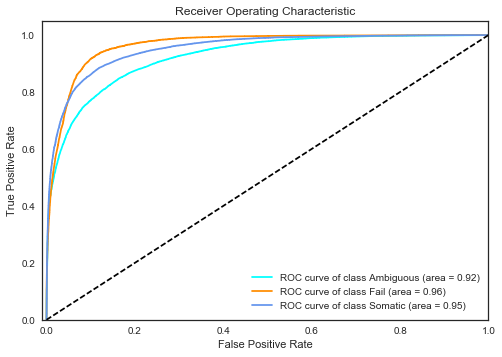

In [20]:
n_classes = Y.shape[1]
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Somatic'}
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.title('Receiver Operating Characteristic')
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = metrics.roc_curve(Y[:, i], probabilities[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0}'
             ' (area = {1:0.2f})'.format(class_lookup[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

confidence intervals +-:  [ 0.00058744  0.00380737  0.00546475  0.00696819  0.00805465  0.00795595
  0.00745662  0.00643278  0.00499972  0.00123251]


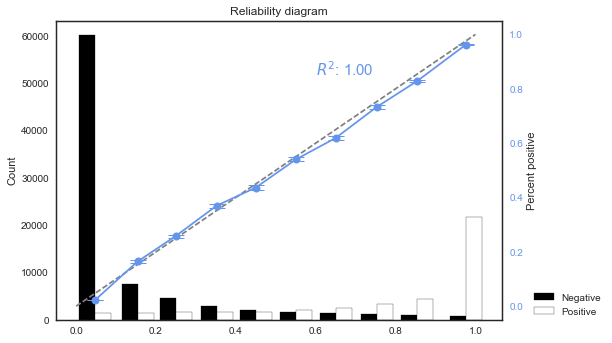

In [22]:
create_reliability_diagram(probabilities, Y,['Ambiguous','Fail','Somatic'], 'cornflowerblue')

## Feature importance analysis

In [18]:
feature_metrics = determine_feature_importance(estimator, X, Y)

Epoch 1/700
41654/41654 [==============================] - 0s - loss: 1.0732 - acc: 0.4858     
Epoch 2/700
41654/41654 [==============================] - 0s - loss: 0.9715 - acc: 0.5079     
Epoch 3/700
41654/41654 [==============================] - 0s - loss: 0.8885 - acc: 0.5373     
Epoch 4/700
41654/41654 [==============================] - 0s - loss: 0.8132 - acc: 0.6201     
Epoch 5/700
41654/41654 [==============================] - 0s - loss: 0.7350 - acc: 0.6618     
Epoch 6/700
41654/41654 [==============================] - 0s - loss: 0.6709 - acc: 0.7023     
Epoch 7/700
41654/41654 [==============================] - ETA: 0s - loss: 0.6227 - acc: 0.738 - 0s - loss: 0.6219 - acc: 0.7394     
Epoch 8/700
41654/41654 [==============================] - 0s - loss: 0.5891 - acc: 0.7635     
Epoch 9/700
41654/41654 [==============================] - 0s - loss: 0.5676 - acc: 0.7758     
Epoch 10/700
41654/41654 [==============================] - 0s - loss: 0.5532 - acc: 0.7805     
E

41654/41654 [==============================] - 0s - loss: 0.3928 - acc: 0.8396     
Epoch 168/700
41654/41654 [==============================] - 0s - loss: 0.3934 - acc: 0.8385     
Epoch 169/700
41654/41654 [==============================] - 0s - loss: 0.3939 - acc: 0.8383     
Epoch 170/700
41654/41654 [==============================] - 0s - loss: 0.3914 - acc: 0.8383     
Epoch 171/700
41654/41654 [==============================] - 0s - loss: 0.3907 - acc: 0.8378     
Epoch 172/700
41654/41654 [==============================] - 0s - loss: 0.3905 - acc: 0.8391     
Epoch 173/700
41654/41654 [==============================] - 0s - loss: 0.3914 - acc: 0.8391     
Epoch 174/700
41654/41654 [==============================] - 0s - loss: 0.3899 - acc: 0.8396     
Epoch 175/700
41654/41654 [==============================] - 0s - loss: 0.3913 - acc: 0.8393     
Epoch 176/700
41654/41654 [==============================] - 0s - loss: 0.3948 - acc: 0.8372     
Epoch 177/700
41654/41654 [=======

41654/41654 [==============================] - 0s - loss: 0.3736 - acc: 0.8461     
Epoch 334/700
41654/41654 [==============================] - 0s - loss: 0.3746 - acc: 0.8463     
Epoch 335/700
41654/41654 [==============================] - 0s - loss: 0.3744 - acc: 0.8469     
Epoch 336/700
41654/41654 [==============================] - 0s - loss: 0.3772 - acc: 0.8448     
Epoch 337/700
41654/41654 [==============================] - 0s - loss: 0.3750 - acc: 0.8460     
Epoch 338/700
41654/41654 [==============================] - 0s - loss: 0.3770 - acc: 0.8456     
Epoch 339/700
41654/41654 [==============================] - 0s - loss: 0.3789 - acc: 0.8446     
Epoch 340/700
41654/41654 [==============================] - 0s - loss: 0.3739 - acc: 0.8470     
Epoch 341/700
41654/41654 [==============================] - 0s - loss: 0.3726 - acc: 0.8476     
Epoch 342/700
41654/41654 [==============================] - 0s - loss: 0.3719 - acc: 0.8476     
Epoch 343/700
41654/41654 [=======

41654/41654 [==============================] - 0s - loss: 0.3635 - acc: 0.8503     
Epoch 500/700
41654/41654 [==============================] - 0s - loss: 0.3623 - acc: 0.8509     
Epoch 501/700
41654/41654 [==============================] - 0s - loss: 0.3632 - acc: 0.8513     
Epoch 502/700
41654/41654 [==============================] - 0s - loss: 0.3635 - acc: 0.8511     
Epoch 503/700
41654/41654 [==============================] - 0s - loss: 0.3621 - acc: 0.8521     
Epoch 504/700
41654/41654 [==============================] - 0s - loss: 0.3620 - acc: 0.8503     
Epoch 505/700
41654/41654 [==============================] - 0s - loss: 0.3688 - acc: 0.8488     
Epoch 506/700
41654/41654 [==============================] - 0s - loss: 0.3612 - acc: 0.8507     
Epoch 507/700
41654/41654 [==============================] - 0s - loss: 0.3623 - acc: 0.8514     
Epoch 508/700
41654/41654 [==============================] - 0s - loss: 0.3628 - acc: 0.8516     
Epoch 509/700
41654/41654 [=======

41654/41654 [==============================] - 0s - loss: 0.3575 - acc: 0.8519     
Epoch 666/700
41654/41654 [==============================] - 0s - loss: 0.3567 - acc: 0.8533     
Epoch 667/700
41654/41654 [==============================] - 0s - loss: 0.3547 - acc: 0.8543     
Epoch 668/700
41654/41654 [==============================] - 0s - loss: 0.3548 - acc: 0.8524     
Epoch 669/700
41654/41654 [==============================] - 0s - loss: 0.3532 - acc: 0.8540     
Epoch 670/700
41654/41654 [==============================] - 0s - loss: 0.3537 - acc: 0.8538     
Epoch 671/700
41654/41654 [==============================] - 0s - loss: 0.3538 - acc: 0.8548     
Epoch 672/700
41654/41654 [==============================] - 0s - loss: 0.3574 - acc: 0.8521     
Epoch 673/700
41654/41654 [==============================] - 0s - loss: 0.3568 - acc: 0.8537     
Epoch 674/700
41654/41654 [==============================] - 0s - loss: 0.3559 - acc: 0.8541     
Epoch 675/700
41654/41654 [=======

In [19]:
feature_metrics.head(15)

feature  shuffled_auc  delta_auc
0                                      disease      0.775011   0.185856
1                                     reviewer      0.867725   0.093142
31                                   tumor_VAF      0.873578   0.087289
51               tumor_var_avg_mapping_quality      0.917808   0.043060
47                   tumor_var_avg_basequality      0.921208   0.039660
48                tumor_var_avg_clipped_length      0.922866   0.038002
19               normal_var_avg_clipped_length      0.934021   0.026846
54            tumor_var_avg_se_mapping_quality      0.935660   0.025207
55        tumor_var_avg_sum_mismatch_qualities      0.938424   0.022443
12           normal_ref_avg_se_mapping_quality      0.939347   0.021521
49  tumor_var_avg_distance_to_effective_3p_end      0.939527   0.021341
18                  normal_var_avg_basequality      0.945819   0.015049
22              normal_var_avg_mapping_quality      0.946017   0.014851
53               tumor_var_avg_pos_as_fraction      0.948077   0.012791
9               normal_ref_avg_mapping_quality      0.949913   0.010954

# Solid vs blood tumor

In [6]:
three_class = training_data.replace('g','f')

In [29]:
s_v_b = three_class
s_v_b['blood_tumor'] = s_v_b[['disease_AML','disease_lymphoma']].apply(any, axis=1).astype(int)
s_v_b['solid_tumor'] = s_v_b[['disease_GST', 'disease_MPNST', 'disease_SCLC',
                              'disease_breast', 'disease_colorectal', 
                              'disease_glioblastoma', 'disease_melanoma']].apply(any, axis=1).astype(int)
s_v_b.drop(['disease_AML', 'disease_GST', 'disease_MPNST', 'disease_SCLC',
       'disease_breast', 'disease_colorectal', 'disease_glioblastoma',
       'disease_lymphoma', 'disease_melanoma'], axis=1, inplace=True)

In [31]:
s_v_b.groupby('call').size()

call
a    14589
f     5909
s    21156
dtype: int64

In [32]:
# Get Labels
Y = pd.get_dummies(three_class.call).astype(float).values
# Get training data as numpy array
X = s_v_b.drop(['call', 'binary_call'], axis=1).astype(float).values

In [33]:
X.shape

(41654, 64)

In [34]:
Y.shape

(41654, 3)

In [35]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [36]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=64, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(3, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [37]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=700, batch_size=2000, verbose=1)

In [38]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [39]:
if not os.path.exists('../data/deep_learning/solid_v_blood_tanh_probs.npy'):
    probabilities = cross_val_predict(estimator, X, Y, cv=kfold, method='predict_proba')
    np.save('../data/deep_learning/solid_v_blood_tanh_probs.npy', probabilities)
else:
    probabilities = np.load('../data/deep_learning/solid_v_blood_tanh_probs.npy')

Epoch 1/700
37488/37488 [==============================] - 0s - loss: 1.0566 - acc: 0.4756     
Epoch 2/700
37488/37488 [==============================] - 0s - loss: 0.9785 - acc: 0.5093     
Epoch 3/700
37488/37488 [==============================] - 0s - loss: 0.8962 - acc: 0.5973     
Epoch 4/700
37488/37488 [==============================] - 0s - loss: 0.8140 - acc: 0.6214     
Epoch 5/700
37488/37488 [==============================] - 0s - loss: 0.7323 - acc: 0.6956     
Epoch 6/700
37488/37488 [==============================] - 0s - loss: 0.6764 - acc: 0.7228     
Epoch 7/700
37488/37488 [==============================] - 0s - loss: 0.6521 - acc: 0.7382     
Epoch 8/700
37488/37488 [==============================] - 0s - loss: 0.6374 - acc: 0.7435     
Epoch 9/700
37488/37488 [==============================] - 0s - loss: 0.6276 - acc: 0.7483     
Epoch 10/700
37488/37488 [==============================] - 0s - loss: 0.6167 - acc: 0.7543     
Epoch 11/700
37488/37488 [=============

37488/37488 [==============================] - 0s - loss: 0.4395 - acc: 0.8226     
Epoch 169/700
37488/37488 [==============================] - 0s - loss: 0.4392 - acc: 0.8213     
Epoch 170/700
37488/37488 [==============================] - 0s - loss: 0.4377 - acc: 0.8224     
Epoch 171/700
37488/37488 [==============================] - 0s - loss: 0.4349 - acc: 0.8224     
Epoch 172/700
37488/37488 [==============================] - 0s - loss: 0.4360 - acc: 0.8225     
Epoch 173/700
37488/37488 [==============================] - 0s - loss: 0.4404 - acc: 0.8217     
Epoch 174/700
37488/37488 [==============================] - 0s - loss: 0.4388 - acc: 0.8218     
Epoch 175/700
37488/37488 [==============================] - 0s - loss: 0.4378 - acc: 0.8235     
Epoch 176/700
37488/37488 [==============================] - 0s - loss: 0.4352 - acc: 0.8231     
Epoch 177/700
37488/37488 [==============================] - 0s - loss: 0.4343 - acc: 0.8236     
Epoch 178/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4093 - acc: 0.8332     
Epoch 333/700
37488/37488 [==============================] - 0s - loss: 0.4104 - acc: 0.8327     
Epoch 334/700
37488/37488 [==============================] - 0s - loss: 0.4136 - acc: 0.8306     
Epoch 335/700
37488/37488 [==============================] - ETA: 0s - loss: 0.4137 - acc: 0.833 - 0s - loss: 0.4125 - acc: 0.8327     
Epoch 336/700
37488/37488 [==============================] - 0s - loss: 0.4120 - acc: 0.8333     
Epoch 337/700
37488/37488 [==============================] - 0s - loss: 0.4113 - acc: 0.8331     
Epoch 338/700
37488/37488 [==============================] - 0s - loss: 0.4119 - acc: 0.8330     
Epoch 339/700
37488/37488 [==============================] - 0s - loss: 0.4105 - acc: 0.8325     
Epoch 340/700
37488/37488 [==============================] - 0s - loss: 0.4098 - acc: 0.8330     
Epoch 341/700
37488/37488 [==============================] - 0s - loss: 0.4121 - acc: 0.8319  

37488/37488 [==============================] - 0s - loss: 0.4038 - acc: 0.8372     
Epoch 416/700
37488/37488 [==============================] - 0s - loss: 0.4081 - acc: 0.8341     
Epoch 417/700
37488/37488 [==============================] - 0s - loss: 0.4051 - acc: 0.8349     
Epoch 418/700
37488/37488 [==============================] - 0s - loss: 0.4028 - acc: 0.8364     
Epoch 419/700
37488/37488 [==============================] - ETA: 0s - loss: 0.4042 - acc: 0.836 - 0s - loss: 0.4028 - acc: 0.8367     
Epoch 420/700
37488/37488 [==============================] - 0s - loss: 0.4016 - acc: 0.8375     
Epoch 421/700
37488/37488 [==============================] - 0s - loss: 0.4029 - acc: 0.8362     
Epoch 422/700
37488/37488 [==============================] - 0s - loss: 0.4031 - acc: 0.8357     
Epoch 423/700
37488/37488 [==============================] - 0s - loss: 0.4014 - acc: 0.8366     
Epoch 424/700
37488/37488 [==============================] - 0s - loss: 0.4023 - acc: 0.8366  

37488/37488 [==============================] - 0s - loss: 0.3917 - acc: 0.8399     
Epoch 581/700
37488/37488 [==============================] - 0s - loss: 0.3953 - acc: 0.8382     
Epoch 582/700
37488/37488 [==============================] - 0s - loss: 0.3954 - acc: 0.8385     
Epoch 583/700
37488/37488 [==============================] - 0s - loss: 0.3966 - acc: 0.8371     
Epoch 584/700
37488/37488 [==============================] - 0s - loss: 0.3953 - acc: 0.8387     
Epoch 585/700
37488/37488 [==============================] - 0s - loss: 0.3910 - acc: 0.8399     
Epoch 586/700
37488/37488 [==============================] - 0s - loss: 0.3920 - acc: 0.8411     
Epoch 587/700
37488/37488 [==============================] - 0s - loss: 0.3914 - acc: 0.8398     
Epoch 588/700
37488/37488 [==============================] - 0s - loss: 0.3914 - acc: 0.8395     
Epoch 589/700
37488/37488 [==============================] - 0s - loss: 0.3913 - acc: 0.8404     
Epoch 590/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.5129 - acc: 0.7979     
Epoch 45/700
37488/37488 [==============================] - 0s - loss: 0.5096 - acc: 0.7988     
Epoch 46/700
37488/37488 [==============================] - 0s - loss: 0.5090 - acc: 0.7990     
Epoch 47/700
37488/37488 [==============================] - 0s - loss: 0.5091 - acc: 0.7991     
Epoch 48/700
37488/37488 [==============================] - 0s - loss: 0.5058 - acc: 0.8002     
Epoch 49/700
37488/37488 [==============================] - 0s - loss: 0.5062 - acc: 0.7989     
Epoch 50/700
37488/37488 [==============================] - 0s - loss: 0.5039 - acc: 0.8004     
Epoch 51/700
37488/37488 [==============================] - 0s - loss: 0.5035 - acc: 0.8001     
Epoch 52/700
37488/37488 [==============================] - 0s - loss: 0.5028 - acc: 0.7996     
Epoch 53/700
37488/37488 [==============================] - 0s - loss: 0.5003 - acc: 0.8015     
Epoch 54/700
37488/37488 [=================

37488/37488 [==============================] - 0s - loss: 0.4322 - acc: 0.8246     
Epoch 211/700
37488/37488 [==============================] - 0s - loss: 0.4361 - acc: 0.8238     
Epoch 212/700
37488/37488 [==============================] - 0s - loss: 0.4314 - acc: 0.8249     
Epoch 213/700
37488/37488 [==============================] - 0s - loss: 0.4300 - acc: 0.8258     
Epoch 214/700
37488/37488 [==============================] - 0s - loss: 0.4296 - acc: 0.8253     
Epoch 215/700
37488/37488 [==============================] - 0s - loss: 0.4322 - acc: 0.8249     
Epoch 216/700
37488/37488 [==============================] - 0s - loss: 0.4316 - acc: 0.8242     
Epoch 217/700
37488/37488 [==============================] - 0s - loss: 0.4342 - acc: 0.8236     
Epoch 218/700
37488/37488 [==============================] - 0s - loss: 0.4298 - acc: 0.8258     
Epoch 219/700
37488/37488 [==============================] - 0s - loss: 0.4284 - acc: 0.8254     
Epoch 220/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4103 - acc: 0.8343     
Epoch 377/700
37488/37488 [==============================] - 0s - loss: 0.4105 - acc: 0.8338     
Epoch 378/700
37488/37488 [==============================] - 0s - loss: 0.4096 - acc: 0.8331     
Epoch 379/700
37488/37488 [==============================] - 0s - loss: 0.4094 - acc: 0.8345     
Epoch 380/700
37488/37488 [==============================] - 0s - loss: 0.4105 - acc: 0.8339     
Epoch 381/700
37488/37488 [==============================] - 0s - loss: 0.4112 - acc: 0.8339     
Epoch 382/700
37488/37488 [==============================] - 0s - loss: 0.4091 - acc: 0.8343     
Epoch 383/700
37488/37488 [==============================] - 0s - loss: 0.4082 - acc: 0.8343     
Epoch 384/700
37488/37488 [==============================] - 0s - loss: 0.4087 - acc: 0.8339     
Epoch 385/700
37488/37488 [==============================] - 0s - loss: 0.4109 - acc: 0.8331     
Epoch 386/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4036 - acc: 0.8373     
Epoch 543/700
37488/37488 [==============================] - 0s - loss: 0.3994 - acc: 0.8382     
Epoch 544/700
37488/37488 [==============================] - 0s - loss: 0.3984 - acc: 0.8379     
Epoch 545/700
37488/37488 [==============================] - 0s - loss: 0.3980 - acc: 0.8374     
Epoch 546/700
37488/37488 [==============================] - 0s - loss: 0.3976 - acc: 0.8390     
Epoch 547/700
37488/37488 [==============================] - 0s - loss: 0.3975 - acc: 0.8388     
Epoch 548/700
37488/37488 [==============================] - 0s - loss: 0.3973 - acc: 0.8385     
Epoch 549/700
37488/37488 [==============================] - 0s - loss: 0.3959 - acc: 0.8387     
Epoch 550/700
37488/37488 [==============================] - 0s - loss: 0.3967 - acc: 0.8387     
Epoch 551/700
37488/37488 [==============================] - 0s - loss: 0.3962 - acc: 0.8378     
Epoch 552/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.6419 - acc: 0.7436     
Epoch 9/700
37488/37488 [==============================] - 0s - loss: 0.6292 - acc: 0.7473     
Epoch 10/700
37488/37488 [==============================] - 0s - loss: 0.6205 - acc: 0.7514     
Epoch 11/700
37488/37488 [==============================] - 0s - loss: 0.6114 - acc: 0.7567     
Epoch 12/700
37488/37488 [==============================] - 0s - loss: 0.6007 - acc: 0.7614     
Epoch 13/700
37488/37488 [==============================] - 0s - loss: 0.5904 - acc: 0.7659     
Epoch 14/700
37488/37488 [==============================] - 0s - loss: 0.5798 - acc: 0.7701     
Epoch 15/700
37488/37488 [==============================] - 0s - loss: 0.5720 - acc: 0.7733     - ETA: 0s - loss: 0.5724 - acc: 0.77
Epoch 16/700
37488/37488 [==============================] - 0s - loss: 0.5636 - acc: 0.7750     
Epoch 17/700
37488/37488 [==============================] - 0s - loss: 0.5575 - acc: 0.7804     
Epoch 18

37488/37488 [==============================] - 0s - loss: 0.4726 - acc: 0.8111     
Epoch 92/700
37488/37488 [==============================] - 0s - loss: 0.4720 - acc: 0.8109     
Epoch 93/700
37488/37488 [==============================] - 0s - loss: 0.4720 - acc: 0.8113     
Epoch 94/700
37488/37488 [==============================] - 0s - loss: 0.4715 - acc: 0.8126     
Epoch 95/700
37488/37488 [==============================] - 0s - loss: 0.4690 - acc: 0.8131     
Epoch 96/700
37488/37488 [==============================] - 0s - loss: 0.4705 - acc: 0.8118     
Epoch 97/700
37488/37488 [==============================] - 0s - loss: 0.4675 - acc: 0.8121     
Epoch 98/700
37488/37488 [==============================] - 0s - loss: 0.4713 - acc: 0.8126     
Epoch 99/700
37488/37488 [==============================] - 0s - loss: 0.4657 - acc: 0.8133     
Epoch 100/700
37488/37488 [==============================] - 0s - loss: 0.4639 - acc: 0.8142     
Epoch 101/700
37488/37488 [===============

37488/37488 [==============================] - 0s - loss: 0.4202 - acc: 0.8292     
Epoch 258/700
37488/37488 [==============================] - 0s - loss: 0.4170 - acc: 0.8310     
Epoch 259/700
37488/37488 [==============================] - 0s - loss: 0.4178 - acc: 0.8306     
Epoch 260/700
37488/37488 [==============================] - 0s - loss: 0.4175 - acc: 0.8301     
Epoch 261/700
37488/37488 [==============================] - 0s - loss: 0.4172 - acc: 0.8308     
Epoch 262/700
37488/37488 [==============================] - 0s - loss: 0.4188 - acc: 0.8301     
Epoch 263/700
37488/37488 [==============================] - 0s - loss: 0.4219 - acc: 0.8293     
Epoch 264/700
37488/37488 [==============================] - 0s - loss: 0.4183 - acc: 0.8304     
Epoch 265/700
37488/37488 [==============================] - 0s - loss: 0.4169 - acc: 0.8312     
Epoch 266/700
37488/37488 [==============================] - 0s - loss: 0.4184 - acc: 0.8312     
Epoch 267/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4024 - acc: 0.8366     
Epoch 424/700
37488/37488 [==============================] - 0s - loss: 0.4031 - acc: 0.8371     
Epoch 425/700
37488/37488 [==============================] - 0s - loss: 0.4035 - acc: 0.8353     
Epoch 426/700
37488/37488 [==============================] - 0s - loss: 0.4012 - acc: 0.8369     
Epoch 427/700
37488/37488 [==============================] - 0s - loss: 0.4008 - acc: 0.8367     
Epoch 428/700
37488/37488 [==============================] - 0s - loss: 0.4003 - acc: 0.8369     
Epoch 429/700
37488/37488 [==============================] - 0s - loss: 0.4003 - acc: 0.8376     
Epoch 430/700
37488/37488 [==============================] - 0s - loss: 0.3998 - acc: 0.8375     
Epoch 431/700
37488/37488 [==============================] - 0s - loss: 0.3999 - acc: 0.8375     
Epoch 432/700
37488/37488 [==============================] - 0s - loss: 0.3995 - acc: 0.8381     
Epoch 433/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.3884 - acc: 0.8413     
Epoch 589/700
37488/37488 [==============================] - 0s - loss: 0.3885 - acc: 0.8416     
Epoch 590/700
37488/37488 [==============================] - 0s - loss: 0.3937 - acc: 0.8399     
Epoch 591/700
37488/37488 [==============================] - 0s - loss: 0.3915 - acc: 0.8407     
Epoch 592/700
37488/37488 [==============================] - 0s - loss: 0.3880 - acc: 0.8416     
Epoch 593/700
37488/37488 [==============================] - 0s - loss: 0.3877 - acc: 0.8414     
Epoch 594/700
37488/37488 [==============================] - 0s - loss: 0.3873 - acc: 0.8421     
Epoch 595/700
37488/37488 [==============================] - 0s - loss: 0.3878 - acc: 0.8414     
Epoch 596/700
37488/37488 [==============================] - 0s - loss: 0.3902 - acc: 0.8406     
Epoch 597/700
37488/37488 [==============================] - 0s - loss: 0.3882 - acc: 0.8417     
Epoch 598/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4985 - acc: 0.8019     
Epoch 54/700
37488/37488 [==============================] - 0s - loss: 0.4967 - acc: 0.8015     
Epoch 55/700
37488/37488 [==============================] - 0s - loss: 0.4946 - acc: 0.8031     
Epoch 56/700
37488/37488 [==============================] - 0s - loss: 0.5000 - acc: 0.8005     
Epoch 57/700
37488/37488 [==============================] - 0s - loss: 0.4936 - acc: 0.8042     
Epoch 58/700
37488/37488 [==============================] - 0s - loss: 0.4955 - acc: 0.8019     
Epoch 59/700
37488/37488 [==============================] - 0s - loss: 0.4917 - acc: 0.8032     
Epoch 60/700
37488/37488 [==============================] - 0s - loss: 0.4911 - acc: 0.8024     
Epoch 61/700
37488/37488 [==============================] - 0s - loss: 0.4888 - acc: 0.8045     
Epoch 62/700
37488/37488 [==============================] - 0s - loss: 0.4951 - acc: 0.8011     
Epoch 63/700
37488/37488 [=================

37488/37488 [==============================] - 0s - loss: 0.4278 - acc: 0.8266     
Epoch 221/700
37488/37488 [==============================] - 0s - loss: 0.4295 - acc: 0.8268     
Epoch 222/700
37488/37488 [==============================] - 0s - loss: 0.4292 - acc: 0.8255     
Epoch 223/700
37488/37488 [==============================] - 0s - loss: 0.4286 - acc: 0.8259     
Epoch 224/700
37488/37488 [==============================] - 0s - loss: 0.4319 - acc: 0.8251     
Epoch 225/700
37488/37488 [==============================] - 0s - loss: 0.4284 - acc: 0.8253     
Epoch 226/700
37488/37488 [==============================] - 0s - loss: 0.4270 - acc: 0.8267     
Epoch 227/700
37488/37488 [==============================] - 0s - loss: 0.4271 - acc: 0.8260     
Epoch 228/700
37488/37488 [==============================] - 0s - loss: 0.4343 - acc: 0.8238     
Epoch 229/700
37488/37488 [==============================] - 0s - loss: 0.4300 - acc: 0.8255     
Epoch 230/700
37488/37488 [=======

37488/37488 [==============================] - 0s - loss: 0.4080 - acc: 0.8332     
Epoch 387/700
37488/37488 [==============================] - 0s - loss: 0.4134 - acc: 0.8329     
Epoch 388/700
37488/37488 [==============================] - 0s - loss: 0.4132 - acc: 0.8322     
Epoch 389/700
37488/37488 [==============================] - ETA: 0s - loss: 0.4110 - acc: 0.834 - 0s - loss: 0.4116 - acc: 0.8335     
Epoch 390/700
37488/37488 [==============================] - 0s - loss: 0.4091 - acc: 0.8333     
Epoch 391/700
37488/37488 [==============================] - 0s - loss: 0.4053 - acc: 0.8360     
Epoch 392/700
37488/37488 [==============================] - 0s - loss: 0.4058 - acc: 0.8347     
Epoch 393/700
37488/37488 [==============================] - 0s - loss: 0.4075 - acc: 0.8334     
Epoch 394/700
37488/37488 [==============================] - 0s - loss: 0.4070 - acc: 0.8343     
Epoch 395/700
37488/37488 [==============================] - 0s - loss: 0.4063 - acc: 0.8341  

37488/37488 [==============================] - 0s - loss: 0.3935 - acc: 0.8388     
Epoch 552/700
37488/37488 [==============================] - 0s - loss: 0.3951 - acc: 0.8389     
Epoch 553/700
37488/37488 [==============================] - 0s - loss: 0.3954 - acc: 0.8374     
Epoch 554/700
37488/37488 [==============================] - 0s - loss: 0.3979 - acc: 0.8369     
Epoch 555/700
37488/37488 [==============================] - 0s - loss: 0.3939 - acc: 0.8379     
Epoch 556/700
37488/37488 [==============================] - 0s - loss: 0.3968 - acc: 0.8376     
Epoch 557/700
37488/37488 [==============================] - 0s - loss: 0.3991 - acc: 0.8369     
Epoch 558/700
37488/37488 [==============================] - 0s - loss: 0.3940 - acc: 0.8390     
Epoch 559/700
37488/37488 [==============================] - 0s - loss: 0.3954 - acc: 0.8377     
Epoch 560/700
37488/37488 [==============================] - 0s - loss: 0.3954 - acc: 0.8386     
Epoch 561/700
37488/37488 [=======

37489/37489 [==============================] - 0s - loss: 0.5541 - acc: 0.7823     
Epoch 18/700
37489/37489 [==============================] - 0s - loss: 0.5502 - acc: 0.7842     
Epoch 19/700
37489/37489 [==============================] - 0s - loss: 0.5486 - acc: 0.7851     
Epoch 20/700
37489/37489 [==============================] - 0s - loss: 0.5448 - acc: 0.7857     
Epoch 21/700
37489/37489 [==============================] - 0s - loss: 0.5406 - acc: 0.7877     
Epoch 22/700
37489/37489 [==============================] - 0s - loss: 0.5388 - acc: 0.7883     
Epoch 23/700
37489/37489 [==============================] - 0s - loss: 0.5365 - acc: 0.7897     
Epoch 24/700
37489/37489 [==============================] - 0s - loss: 0.5340 - acc: 0.7907     - ETA: 0s - loss: 0.5326 - acc: 0.79
Epoch 25/700
37489/37489 [==============================] - 0s - loss: 0.5312 - acc: 0.7923     
Epoch 26/700
37489/37489 [==============================] - 0s - loss: 0.5278 - acc: 0.7924     
Epoch 2

37489/37489 [==============================] - 0s - loss: 0.4252 - acc: 0.8285     
Epoch 184/700
37489/37489 [==============================] - 0s - loss: 0.4249 - acc: 0.8276     
Epoch 185/700
37489/37489 [==============================] - 0s - loss: 0.4247 - acc: 0.8278     
Epoch 186/700
37489/37489 [==============================] - 0s - loss: 0.4252 - acc: 0.8285     
Epoch 187/700
37489/37489 [==============================] - 0s - loss: 0.4252 - acc: 0.8282     
Epoch 188/700
37489/37489 [==============================] - 0s - loss: 0.4297 - acc: 0.8271     
Epoch 189/700
37489/37489 [==============================] - 0s - loss: 0.4249 - acc: 0.8276     
Epoch 190/700
37489/37489 [==============================] - 0s - loss: 0.4243 - acc: 0.8282     
Epoch 191/700
37489/37489 [==============================] - 0s - loss: 0.4240 - acc: 0.8286     
Epoch 192/700
37489/37489 [==============================] - 0s - loss: 0.4230 - acc: 0.8292     
Epoch 193/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4050 - acc: 0.8362     
Epoch 350/700
37489/37489 [==============================] - 0s - loss: 0.4077 - acc: 0.8352     
Epoch 351/700
37489/37489 [==============================] - 0s - loss: 0.4055 - acc: 0.8351     
Epoch 352/700
37489/37489 [==============================] - 0s - loss: 0.4040 - acc: 0.8365     
Epoch 353/700
37489/37489 [==============================] - 0s - loss: 0.4034 - acc: 0.8371     
Epoch 354/700
37489/37489 [==============================] - 0s - loss: 0.4032 - acc: 0.8357     
Epoch 355/700
37489/37489 [==============================] - 0s - loss: 0.4036 - acc: 0.8357     
Epoch 356/700
37489/37489 [==============================] - 0s - loss: 0.4037 - acc: 0.8369     
Epoch 357/700
37489/37489 [==============================] - 0s - loss: 0.4077 - acc: 0.8355     
Epoch 358/700
37489/37489 [==============================] - 0s - loss: 0.4047 - acc: 0.8369     
Epoch 359/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3949 - acc: 0.8405     
Epoch 516/700
37489/37489 [==============================] - 0s - loss: 0.3935 - acc: 0.8396     
Epoch 517/700
37489/37489 [==============================] - 0s - loss: 0.3910 - acc: 0.8402     
Epoch 518/700
37489/37489 [==============================] - 0s - loss: 0.3938 - acc: 0.8412     
Epoch 519/700
37489/37489 [==============================] - 0s - loss: 0.3920 - acc: 0.8409     
Epoch 520/700
37489/37489 [==============================] - 0s - loss: 0.3897 - acc: 0.8423     
Epoch 521/700
37489/37489 [==============================] - 0s - loss: 0.3907 - acc: 0.8414     
Epoch 522/700
37489/37489 [==============================] - 0s - loss: 0.3921 - acc: 0.8408     
Epoch 523/700
37489/37489 [==============================] - 0s - loss: 0.3908 - acc: 0.8429     
Epoch 524/700
37489/37489 [==============================] - 0s - loss: 0.3893 - acc: 0.8425     
Epoch 525/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3801 - acc: 0.8449     
Epoch 681/700
37489/37489 [==============================] - 0s - loss: 0.3797 - acc: 0.8454     
Epoch 682/700
37489/37489 [==============================] - 0s - loss: 0.3847 - acc: 0.8435     
Epoch 683/700
37489/37489 [==============================] - 0s - loss: 0.3817 - acc: 0.8453     
Epoch 684/700
37489/37489 [==============================] - 0s - loss: 0.3813 - acc: 0.8445     
Epoch 685/700
37489/37489 [==============================] - 0s - loss: 0.3801 - acc: 0.8457     
Epoch 686/700
37489/37489 [==============================] - 0s - loss: 0.3812 - acc: 0.8453     
Epoch 687/700
37489/37489 [==============================] - 0s - loss: 0.3807 - acc: 0.8454     
Epoch 688/700
37489/37489 [==============================] - 0s - loss: 0.3798 - acc: 0.8457     
Epoch 689/700
37489/37489 [==============================] - 0s - loss: 0.3813 - acc: 0.8450     
Epoch 690/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4449 - acc: 0.8225     
Epoch 148/700
37489/37489 [==============================] - 0s - loss: 0.4440 - acc: 0.8206     
Epoch 149/700
37489/37489 [==============================] - 0s - loss: 0.4437 - acc: 0.8228     
Epoch 150/700
37489/37489 [==============================] - 0s - loss: 0.4410 - acc: 0.8219     
Epoch 151/700
37489/37489 [==============================] - 0s - loss: 0.4432 - acc: 0.8224     
Epoch 152/700
37489/37489 [==============================] - 0s - loss: 0.4420 - acc: 0.8226     
Epoch 153/700
37489/37489 [==============================] - 0s - loss: 0.4403 - acc: 0.8225     
Epoch 154/700
37489/37489 [==============================] - 0s - loss: 0.4412 - acc: 0.8224     
Epoch 155/700
37489/37489 [==============================] - 0s - loss: 0.4421 - acc: 0.8219     
Epoch 156/700
37489/37489 [==============================] - 0s - loss: 0.4414 - acc: 0.8222     
Epoch 157/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4155 - acc: 0.8317     
Epoch 314/700
37489/37489 [==============================] - 0s - loss: 0.4145 - acc: 0.8313     
Epoch 315/700
37489/37489 [==============================] - 0s - loss: 0.4146 - acc: 0.8313     
Epoch 316/700
37489/37489 [==============================] - 0s - loss: 0.4169 - acc: 0.8312     
Epoch 317/700
37489/37489 [==============================] - 0s - loss: 0.4149 - acc: 0.8318     
Epoch 318/700
37489/37489 [==============================] - 0s - loss: 0.4164 - acc: 0.8312     
Epoch 319/700
37489/37489 [==============================] - 0s - loss: 0.4151 - acc: 0.8325     
Epoch 320/700
37489/37489 [==============================] - 0s - loss: 0.4185 - acc: 0.8301     
Epoch 321/700
37489/37489 [==============================] - 0s - loss: 0.4148 - acc: 0.8320     
Epoch 322/700
37489/37489 [==============================] - 0s - loss: 0.4168 - acc: 0.8313     
Epoch 323/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4018 - acc: 0.8362     
Epoch 479/700
37489/37489 [==============================] - 0s - loss: 0.3992 - acc: 0.8382     
Epoch 480/700
37489/37489 [==============================] - 0s - loss: 0.3998 - acc: 0.8377     
Epoch 481/700
37489/37489 [==============================] - 0s - loss: 0.4003 - acc: 0.8377     
Epoch 482/700
37489/37489 [==============================] - 0s - loss: 0.4008 - acc: 0.8376     
Epoch 483/700
37489/37489 [==============================] - 0s - loss: 0.3998 - acc: 0.8377     
Epoch 484/700
37489/37489 [==============================] - 0s - loss: 0.3984 - acc: 0.8374     
Epoch 485/700
37489/37489 [==============================] - 0s - loss: 0.4003 - acc: 0.8382     
Epoch 486/700
37489/37489 [==============================] - 0s - loss: 0.4001 - acc: 0.8368     
Epoch 487/700
37489/37489 [==============================] - 0s - loss: 0.3995 - acc: 0.8374     
Epoch 488/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3895 - acc: 0.8414     
Epoch 645/700
37489/37489 [==============================] - 0s - loss: 0.3906 - acc: 0.8417     
Epoch 646/700
37489/37489 [==============================] - 0s - loss: 0.3891 - acc: 0.8428     
Epoch 647/700
37489/37489 [==============================] - 0s - loss: 0.3907 - acc: 0.8418     
Epoch 648/700
37489/37489 [==============================] - 0s - loss: 0.3881 - acc: 0.8432     
Epoch 649/700
37489/37489 [==============================] - 0s - loss: 0.3882 - acc: 0.8435     
Epoch 650/700
37489/37489 [==============================] - 0s - loss: 0.3865 - acc: 0.8433     
Epoch 651/700
37489/37489 [==============================] - 0s - loss: 0.3876 - acc: 0.8426     
Epoch 652/700
37489/37489 [==============================] - 0s - loss: 0.3856 - acc: 0.8450     
Epoch 653/700
37489/37489 [==============================] - ETA: 0s - loss: 0.3872 - acc: 0.843 - 0s - loss: 0.3870 - acc: 0.8433  

37489/37489 [==============================] - 0s - loss: 0.4564 - acc: 0.8173     
Epoch 112/700
37489/37489 [==============================] - 0s - loss: 0.4523 - acc: 0.8191     
Epoch 113/700
37489/37489 [==============================] - 0s - loss: 0.4533 - acc: 0.8178     
Epoch 114/700
37489/37489 [==============================] - 0s - loss: 0.4518 - acc: 0.8195     
Epoch 115/700
37489/37489 [==============================] - 0s - loss: 0.4548 - acc: 0.8171     
Epoch 116/700
37489/37489 [==============================] - 0s - loss: 0.4554 - acc: 0.8181     
Epoch 117/700
37489/37489 [==============================] - 0s - loss: 0.4530 - acc: 0.8171     
Epoch 118/700
37489/37489 [==============================] - 0s - loss: 0.4521 - acc: 0.8186     
Epoch 119/700
37489/37489 [==============================] - 0s - loss: 0.4516 - acc: 0.8184     
Epoch 120/700
37489/37489 [==============================] - 0s - loss: 0.4498 - acc: 0.8197     
Epoch 121/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4206 - acc: 0.8286     
Epoch 276/700
37489/37489 [==============================] - 0s - loss: 0.4244 - acc: 0.8275     
Epoch 277/700
37489/37489 [==============================] - 0s - loss: 0.4222 - acc: 0.8292     
Epoch 278/700
37489/37489 [==============================] - 0s - loss: 0.4224 - acc: 0.8282     
Epoch 279/700
37489/37489 [==============================] - 0s - loss: 0.4192 - acc: 0.8290     
Epoch 280/700
37489/37489 [==============================] - 0s - loss: 0.4200 - acc: 0.8282     
Epoch 281/700
37489/37489 [==============================] - 0s - loss: 0.4199 - acc: 0.8294     
Epoch 282/700
37489/37489 [==============================] - 0s - loss: 0.4200 - acc: 0.8289     
Epoch 283/700
37489/37489 [==============================] - 0s - loss: 0.4220 - acc: 0.8298     
Epoch 284/700
37489/37489 [==============================] - 0s - loss: 0.4189 - acc: 0.8287     
Epoch 285/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4055 - acc: 0.8361     
Epoch 442/700
37489/37489 [==============================] - 0s - loss: 0.4028 - acc: 0.8368     
Epoch 443/700
37489/37489 [==============================] - 0s - loss: 0.4050 - acc: 0.8348     
Epoch 444/700
37489/37489 [==============================] - 0s - loss: 0.4043 - acc: 0.8361     
Epoch 445/700
37489/37489 [==============================] - 0s - loss: 0.4030 - acc: 0.8352     
Epoch 446/700
37489/37489 [==============================] - 0s - loss: 0.4061 - acc: 0.8345     
Epoch 447/700
37489/37489 [==============================] - 0s - loss: 0.4092 - acc: 0.8347     
Epoch 448/700
37489/37489 [==============================] - 0s - loss: 0.4087 - acc: 0.8340     
Epoch 449/700
37489/37489 [==============================] - 0s - loss: 0.4040 - acc: 0.8360     
Epoch 450/700
37489/37489 [==============================] - 0s - loss: 0.4030 - acc: 0.8360     
Epoch 451/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3909 - acc: 0.8420     
Epoch 607/700
37489/37489 [==============================] - 0s - loss: 0.3904 - acc: 0.8412     
Epoch 608/700
37489/37489 [==============================] - 0s - loss: 0.3923 - acc: 0.8394     
Epoch 609/700
37489/37489 [==============================] - 0s - loss: 0.3906 - acc: 0.8416     
Epoch 610/700
37489/37489 [==============================] - 0s - loss: 0.3925 - acc: 0.8409     
Epoch 611/700
37489/37489 [==============================] - 0s - loss: 0.3952 - acc: 0.8386     
Epoch 612/700
37489/37489 [==============================] - 0s - loss: 0.3902 - acc: 0.8413     
Epoch 613/700
37489/37489 [==============================] - 0s - loss: 0.3908 - acc: 0.8408     
Epoch 614/700
37489/37489 [==============================] - 0s - loss: 0.3921 - acc: 0.8404     
Epoch 615/700
37489/37489 [==============================] - 0s - loss: 0.3947 - acc: 0.8391     
Epoch 616/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4792 - acc: 0.8072     
Epoch 71/700
37489/37489 [==============================] - ETA: 0s - loss: 0.4831 - acc: 0.807 - 0s - loss: 0.4826 - acc: 0.8073     
Epoch 72/700
37489/37489 [==============================] - 0s - loss: 0.4808 - acc: 0.8073     
Epoch 73/700
37489/37489 [==============================] - 0s - loss: 0.4802 - acc: 0.8070     
Epoch 74/700
37489/37489 [==============================] - 0s - loss: 0.4776 - acc: 0.8090     
Epoch 75/700
37489/37489 [==============================] - 0s - loss: 0.4794 - acc: 0.8076     
Epoch 76/700
37489/37489 [==============================] - 0s - loss: 0.4778 - acc: 0.8081     - ETA: 0s - loss: 0.4818 - acc: 0.80
Epoch 77/700
37489/37489 [==============================] - 0s - loss: 0.4764 - acc: 0.8094     
Epoch 78/700
37489/37489 [==============================] - 0s - loss: 0.4745 - acc: 0.8099     
Epoch 79/700
37489/37489 [==============================] - 0s - l

37489/37489 [==============================] - 0s - loss: 0.4241 - acc: 0.8282     
Epoch 234/700
37489/37489 [==============================] - 0s - loss: 0.4239 - acc: 0.8285     
Epoch 235/700
37489/37489 [==============================] - 0s - loss: 0.4251 - acc: 0.8275     
Epoch 236/700
37489/37489 [==============================] - 0s - loss: 0.4212 - acc: 0.8294     
Epoch 237/700
37489/37489 [==============================] - 0s - loss: 0.4249 - acc: 0.8272     
Epoch 238/700
37489/37489 [==============================] - 0s - loss: 0.4248 - acc: 0.8292     
Epoch 239/700
37489/37489 [==============================] - 0s - loss: 0.4209 - acc: 0.8297     
Epoch 240/700
37489/37489 [==============================] - 0s - loss: 0.4206 - acc: 0.8292     
Epoch 241/700
37489/37489 [==============================] - 0s - loss: 0.4206 - acc: 0.8287     
Epoch 242/700
37489/37489 [==============================] - 0s - loss: 0.4205 - acc: 0.8290     
Epoch 243/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4044 - acc: 0.8356     
Epoch 398/700
37489/37489 [==============================] - 0s - loss: 0.4037 - acc: 0.8354     
Epoch 399/700
37489/37489 [==============================] - 0s - loss: 0.4040 - acc: 0.8359     
Epoch 400/700
37489/37489 [==============================] - 0s - loss: 0.4040 - acc: 0.8350     
Epoch 401/700
37489/37489 [==============================] - 0s - loss: 0.4056 - acc: 0.8343     
Epoch 402/700
37489/37489 [==============================] - 0s - loss: 0.4042 - acc: 0.8349     
Epoch 403/700
37489/37489 [==============================] - 0s - loss: 0.4053 - acc: 0.8350     
Epoch 404/700
37489/37489 [==============================] - 0s - loss: 0.4023 - acc: 0.8361     
Epoch 405/700
37489/37489 [==============================] - 0s - loss: 0.4011 - acc: 0.8364     
Epoch 406/700
37489/37489 [==============================] - 0s - loss: 0.4018 - acc: 0.8355     
Epoch 407/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3878 - acc: 0.8410     
Epoch 563/700
37489/37489 [==============================] - 0s - loss: 0.3884 - acc: 0.8406     
Epoch 564/700
37489/37489 [==============================] - 0s - loss: 0.3869 - acc: 0.8414     
Epoch 565/700
37489/37489 [==============================] - 0s - loss: 0.3898 - acc: 0.8406     
Epoch 566/700
37489/37489 [==============================] - 0s - loss: 0.3899 - acc: 0.8405     
Epoch 567/700
37489/37489 [==============================] - 0s - loss: 0.3896 - acc: 0.8405     
Epoch 568/700
37489/37489 [==============================] - 0s - loss: 0.3898 - acc: 0.8414     
Epoch 569/700
37489/37489 [==============================] - 0s - loss: 0.3879 - acc: 0.8414     
Epoch 570/700
37489/37489 [==============================] - 0s - loss: 0.3872 - acc: 0.8412     
Epoch 571/700
37489/37489 [==============================] - 0s - loss: 0.3881 - acc: 0.8415     
Epoch 572/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.5223 - acc: 0.7919     
Epoch 28/700
37489/37489 [==============================] - 0s - loss: 0.5182 - acc: 0.7951     
Epoch 29/700
37489/37489 [==============================] - 0s - loss: 0.5175 - acc: 0.7953     
Epoch 30/700
37489/37489 [==============================] - 0s - loss: 0.5165 - acc: 0.7949     
Epoch 31/700
37489/37489 [==============================] - 0s - loss: 0.5164 - acc: 0.7947     
Epoch 32/700
37489/37489 [==============================] - 0s - loss: 0.5144 - acc: 0.7957     
Epoch 33/700
37489/37489 [==============================] - 0s - loss: 0.5104 - acc: 0.7974     
Epoch 34/700
37489/37489 [==============================] - 0s - loss: 0.5100 - acc: 0.7974     
Epoch 35/700
37489/37489 [==============================] - 0s - loss: 0.5089 - acc: 0.7979     
Epoch 36/700
37489/37489 [==============================] - 0s - loss: 0.5065 - acc: 0.7978     
Epoch 37/700
37489/37489 [=================

37489/37489 [==============================] - 0s - loss: 0.4559 - acc: 0.8156     
Epoch 112/700
37489/37489 [==============================] - 0s - loss: 0.4544 - acc: 0.8174     
Epoch 113/700
37489/37489 [==============================] - ETA: 0s - loss: 0.4493 - acc: 0.818 - 0s - loss: 0.4495 - acc: 0.8187     
Epoch 114/700
37489/37489 [==============================] - 0s - loss: 0.4494 - acc: 0.8189     
Epoch 115/700
37489/37489 [==============================] - 0s - loss: 0.4497 - acc: 0.8190     
Epoch 116/700
37489/37489 [==============================] - 0s - loss: 0.4524 - acc: 0.8178     
Epoch 117/700
37489/37489 [==============================] - 0s - loss: 0.4491 - acc: 0.8196     
Epoch 118/700
37489/37489 [==============================] - 0s - loss: 0.4481 - acc: 0.8188     
Epoch 119/700
37489/37489 [==============================] - 0s - loss: 0.4480 - acc: 0.8209     
Epoch 120/700
37489/37489 [==============================] - 0s - loss: 0.4489 - acc: 0.8196  

37489/37489 [==============================] - 0s - loss: 0.4193 - acc: 0.8291     
Epoch 278/700
37489/37489 [==============================] - 0s - loss: 0.4167 - acc: 0.8304     
Epoch 279/700
37489/37489 [==============================] - 0s - loss: 0.4150 - acc: 0.8299     
Epoch 280/700
37489/37489 [==============================] - 0s - loss: 0.4161 - acc: 0.8299     
Epoch 281/700
37489/37489 [==============================] - 0s - loss: 0.4164 - acc: 0.8303     
Epoch 282/700
37489/37489 [==============================] - 0s - loss: 0.4180 - acc: 0.8303     
Epoch 283/700
37489/37489 [==============================] - 0s - loss: 0.4182 - acc: 0.8301     
Epoch 284/700
37489/37489 [==============================] - 0s - loss: 0.4187 - acc: 0.8291     
Epoch 285/700
37489/37489 [==============================] - 0s - loss: 0.4184 - acc: 0.8295     
Epoch 286/700
37489/37489 [==============================] - 0s - loss: 0.4160 - acc: 0.8302     
Epoch 287/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4011 - acc: 0.8358     
Epoch 444/700
37489/37489 [==============================] - 0s - loss: 0.4027 - acc: 0.8354     
Epoch 445/700
37489/37489 [==============================] - 0s - loss: 0.4006 - acc: 0.8370     
Epoch 446/700
37489/37489 [==============================] - 0s - loss: 0.4013 - acc: 0.8362     
Epoch 447/700
37489/37489 [==============================] - 0s - loss: 0.4007 - acc: 0.8356     
Epoch 448/700
37489/37489 [==============================] - 0s - loss: 0.3987 - acc: 0.8375     
Epoch 449/700
37489/37489 [==============================] - 0s - loss: 0.4017 - acc: 0.8357     
Epoch 450/700
37489/37489 [==============================] - 0s - loss: 0.4018 - acc: 0.8359     
Epoch 451/700
37489/37489 [==============================] - 0s - loss: 0.4018 - acc: 0.8356     
Epoch 452/700
37489/37489 [==============================] - 0s - loss: 0.4022 - acc: 0.8349     
Epoch 453/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.3943 - acc: 0.8382     
Epoch 608/700
37489/37489 [==============================] - 0s - loss: 0.3944 - acc: 0.8377     
Epoch 609/700
37489/37489 [==============================] - 0s - loss: 0.3911 - acc: 0.8403     
Epoch 610/700
37489/37489 [==============================] - 0s - loss: 0.3904 - acc: 0.8405     
Epoch 611/700
37489/37489 [==============================] - 0s - loss: 0.3908 - acc: 0.8406     
Epoch 612/700
37489/37489 [==============================] - 0s - loss: 0.3896 - acc: 0.8402     
Epoch 613/700
37489/37489 [==============================] - 0s - loss: 0.3896 - acc: 0.8401     
Epoch 614/700
37489/37489 [==============================] - 0s - loss: 0.3901 - acc: 0.8408     
Epoch 615/700
37489/37489 [==============================] - 0s - loss: 0.3899 - acc: 0.8397     
Epoch 616/700
37489/37489 [==============================] - 0s - loss: 0.3887 - acc: 0.8408     
Epoch 617/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4711 - acc: 0.8124     
Epoch 73/700
37489/37489 [==============================] - 0s - loss: 0.4717 - acc: 0.8113     
Epoch 74/700
37489/37489 [==============================] - 0s - loss: 0.4688 - acc: 0.8128     - ETA: 0s - loss: 0.4685 - acc: 0.
Epoch 75/700
37489/37489 [==============================] - 0s - loss: 0.4684 - acc: 0.8138     
Epoch 76/700
37489/37489 [==============================] - 0s - loss: 0.4702 - acc: 0.8114     
Epoch 77/700
37489/37489 [==============================] - 0s - loss: 0.4664 - acc: 0.8127     
Epoch 78/700
37489/37489 [==============================] - 0s - loss: 0.4666 - acc: 0.8127     
Epoch 79/700
37489/37489 [==============================] - 0s - loss: 0.4666 - acc: 0.8125     
Epoch 80/700
37489/37489 [==============================] - 0s - loss: 0.4711 - acc: 0.8103     
Epoch 81/700
37489/37489 [==============================] - 0s - loss: 0.4663 - acc: 0.8138     
Epoch 82/

37489/37489 [==============================] - 0s - loss: 0.4246 - acc: 0.8275     
Epoch 239/700
37489/37489 [==============================] - 0s - loss: 0.4247 - acc: 0.8280     
Epoch 240/700
37489/37489 [==============================] - 0s - loss: 0.4231 - acc: 0.8277     
Epoch 241/700
37489/37489 [==============================] - 0s - loss: 0.4245 - acc: 0.8284     
Epoch 242/700
37489/37489 [==============================] - 0s - loss: 0.4241 - acc: 0.8271     
Epoch 243/700
37489/37489 [==============================] - 0s - loss: 0.4251 - acc: 0.8273     
Epoch 244/700
37489/37489 [==============================] - 0s - loss: 0.4249 - acc: 0.8265     
Epoch 245/700
37489/37489 [==============================] - 0s - loss: 0.4230 - acc: 0.8292     
Epoch 246/700
37489/37489 [==============================] - 0s - loss: 0.4253 - acc: 0.8275     
Epoch 247/700
37489/37489 [==============================] - 0s - loss: 0.4221 - acc: 0.8286     
Epoch 248/700
37489/37489 [=======

37489/37489 [==============================] - 0s - loss: 0.4073 - acc: 0.8344     
Epoch 403/700
37489/37489 [==============================] - ETA: 0s - loss: 0.4056 - acc: 0.834 - 0s - loss: 0.4047 - acc: 0.8348     
Epoch 404/700
37489/37489 [==============================] - 0s - loss: 0.4084 - acc: 0.8358     
Epoch 405/700
37489/37489 [==============================] - 0s - loss: 0.4091 - acc: 0.8353     
Epoch 406/700
37489/37489 [==============================] - 0s - loss: 0.4074 - acc: 0.8345     
Epoch 407/700
37489/37489 [==============================] - 0s - loss: 0.4083 - acc: 0.8330     
Epoch 408/700
37489/37489 [==============================] - 0s - loss: 0.4087 - acc: 0.8332     
Epoch 409/700
37489/37489 [==============================] - 0s - loss: 0.4063 - acc: 0.8360     
Epoch 410/700
37489/37489 [==============================] - 0s - loss: 0.4061 - acc: 0.8343     
Epoch 411/700
37489/37489 [==============================] - 0s - loss: 0.4056 - acc: 0.8349  

37489/37489 [==============================] - 0s - loss: 0.3967 - acc: 0.8391     
Epoch 568/700
37489/37489 [==============================] - 0s - loss: 0.3942 - acc: 0.8400     
Epoch 569/700
37489/37489 [==============================] - 0s - loss: 0.3925 - acc: 0.8413     
Epoch 570/700
37489/37489 [==============================] - 0s - loss: 0.3935 - acc: 0.8406     
Epoch 571/700
37489/37489 [==============================] - 0s - loss: 0.3942 - acc: 0.8408     
Epoch 572/700
37489/37489 [==============================] - 0s - loss: 0.3944 - acc: 0.8406     
Epoch 573/700
37489/37489 [==============================] - 0s - loss: 0.3928 - acc: 0.8399     
Epoch 574/700
37489/37489 [==============================] - 0s - loss: 0.3937 - acc: 0.8398     
Epoch 575/700
37489/37489 [==============================] - 0s - loss: 0.3933 - acc: 0.8416     
Epoch 576/700
37489/37489 [==============================] - 0s - loss: 0.3956 - acc: 0.8397     
Epoch 577/700
37489/37489 [=======

In [40]:
predicted = np.array([list(a).index(max(list(a))) for a in list(probabilities)])

In [41]:
label_binarizer = preprocessing.LabelBinarizer()

label_binarizer.fit(range(max(predicted)+1))
predicted_transformed = label_binarizer.transform(predicted)

In [42]:
metrics.accuracy_score(Y, predicted_transformed)

0.82719546742209626

#### Classification report
* 0 = ambiguous
* 1 = fail
* 2 = germline
* 3 = somatic

In [43]:
print(metrics.classification_report(Y, predicted_transformed))

             precision    recall  f1-score   support

          0       0.81      0.76      0.79     14589
          1       0.71      0.77      0.74      5909
          2       0.88      0.89      0.88     21156

avg / total       0.83      0.83      0.83     41654



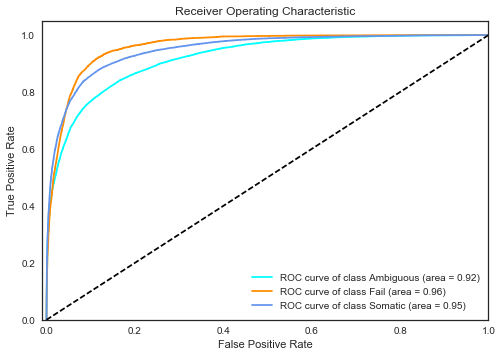

In [44]:
n_classes = Y.shape[1]
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Somatic'}
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.title('Receiver Operating Characteristic')
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = metrics.roc_curve(Y[:, i], probabilities[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0}'
             ' (area = {1:0.2f})'.format(class_lookup[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

confidence intervals +-:  [ 0.00060379  0.00361411  0.0053779   0.00680834  0.00817335  0.007902
  0.00757474  0.00596206  0.00477995  0.0012711 ]


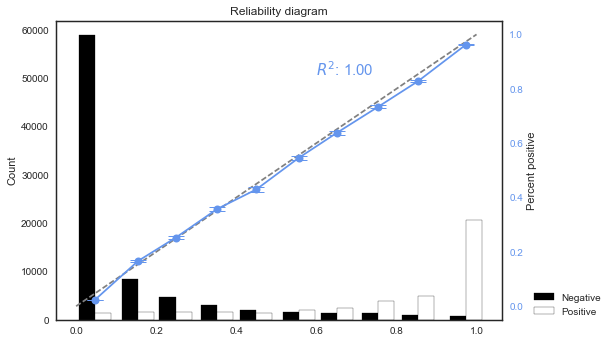

In [45]:
create_reliability_diagram(probabilities, Y,['Ambiguous','Fail','Somatic'], 'cornflowerblue')

## Feature importance analysis

In [18]:
feature_metrics = determine_feature_importance(estimator, X, Y)

Epoch 1/700
41654/41654 [==============================] - 0s - loss: 1.0732 - acc: 0.4858     
Epoch 2/700
41654/41654 [==============================] - 0s - loss: 0.9715 - acc: 0.5079     
Epoch 3/700
41654/41654 [==============================] - 0s - loss: 0.8885 - acc: 0.5373     
Epoch 4/700
41654/41654 [==============================] - 0s - loss: 0.8132 - acc: 0.6201     
Epoch 5/700
41654/41654 [==============================] - 0s - loss: 0.7350 - acc: 0.6618     
Epoch 6/700
41654/41654 [==============================] - 0s - loss: 0.6709 - acc: 0.7023     
Epoch 7/700
41654/41654 [==============================] - ETA: 0s - loss: 0.6227 - acc: 0.738 - 0s - loss: 0.6219 - acc: 0.7394     
Epoch 8/700
41654/41654 [==============================] - 0s - loss: 0.5891 - acc: 0.7635     
Epoch 9/700
41654/41654 [==============================] - 0s - loss: 0.5676 - acc: 0.7758     
Epoch 10/700
41654/41654 [==============================] - 0s - loss: 0.5532 - acc: 0.7805     
E

41654/41654 [==============================] - 0s - loss: 0.3928 - acc: 0.8396     
Epoch 168/700
41654/41654 [==============================] - 0s - loss: 0.3934 - acc: 0.8385     
Epoch 169/700
41654/41654 [==============================] - 0s - loss: 0.3939 - acc: 0.8383     
Epoch 170/700
41654/41654 [==============================] - 0s - loss: 0.3914 - acc: 0.8383     
Epoch 171/700
41654/41654 [==============================] - 0s - loss: 0.3907 - acc: 0.8378     
Epoch 172/700
41654/41654 [==============================] - 0s - loss: 0.3905 - acc: 0.8391     
Epoch 173/700
41654/41654 [==============================] - 0s - loss: 0.3914 - acc: 0.8391     
Epoch 174/700
41654/41654 [==============================] - 0s - loss: 0.3899 - acc: 0.8396     
Epoch 175/700
41654/41654 [==============================] - 0s - loss: 0.3913 - acc: 0.8393     
Epoch 176/700
41654/41654 [==============================] - 0s - loss: 0.3948 - acc: 0.8372     
Epoch 177/700
41654/41654 [=======

41654/41654 [==============================] - 0s - loss: 0.3736 - acc: 0.8461     
Epoch 334/700
41654/41654 [==============================] - 0s - loss: 0.3746 - acc: 0.8463     
Epoch 335/700
41654/41654 [==============================] - 0s - loss: 0.3744 - acc: 0.8469     
Epoch 336/700
41654/41654 [==============================] - 0s - loss: 0.3772 - acc: 0.8448     
Epoch 337/700
41654/41654 [==============================] - 0s - loss: 0.3750 - acc: 0.8460     
Epoch 338/700
41654/41654 [==============================] - 0s - loss: 0.3770 - acc: 0.8456     
Epoch 339/700
41654/41654 [==============================] - 0s - loss: 0.3789 - acc: 0.8446     
Epoch 340/700
41654/41654 [==============================] - 0s - loss: 0.3739 - acc: 0.8470     
Epoch 341/700
41654/41654 [==============================] - 0s - loss: 0.3726 - acc: 0.8476     
Epoch 342/700
41654/41654 [==============================] - 0s - loss: 0.3719 - acc: 0.8476     
Epoch 343/700
41654/41654 [=======

41654/41654 [==============================] - 0s - loss: 0.3635 - acc: 0.8503     
Epoch 500/700
41654/41654 [==============================] - 0s - loss: 0.3623 - acc: 0.8509     
Epoch 501/700
41654/41654 [==============================] - 0s - loss: 0.3632 - acc: 0.8513     
Epoch 502/700
41654/41654 [==============================] - 0s - loss: 0.3635 - acc: 0.8511     
Epoch 503/700
41654/41654 [==============================] - 0s - loss: 0.3621 - acc: 0.8521     
Epoch 504/700
41654/41654 [==============================] - 0s - loss: 0.3620 - acc: 0.8503     
Epoch 505/700
41654/41654 [==============================] - 0s - loss: 0.3688 - acc: 0.8488     
Epoch 506/700
41654/41654 [==============================] - 0s - loss: 0.3612 - acc: 0.8507     
Epoch 507/700
41654/41654 [==============================] - 0s - loss: 0.3623 - acc: 0.8514     
Epoch 508/700
41654/41654 [==============================] - 0s - loss: 0.3628 - acc: 0.8516     
Epoch 509/700
41654/41654 [=======

41654/41654 [==============================] - 0s - loss: 0.3575 - acc: 0.8519     
Epoch 666/700
41654/41654 [==============================] - 0s - loss: 0.3567 - acc: 0.8533     
Epoch 667/700
41654/41654 [==============================] - 0s - loss: 0.3547 - acc: 0.8543     
Epoch 668/700
41654/41654 [==============================] - 0s - loss: 0.3548 - acc: 0.8524     
Epoch 669/700
41654/41654 [==============================] - 0s - loss: 0.3532 - acc: 0.8540     
Epoch 670/700
41654/41654 [==============================] - 0s - loss: 0.3537 - acc: 0.8538     
Epoch 671/700
41654/41654 [==============================] - 0s - loss: 0.3538 - acc: 0.8548     
Epoch 672/700
41654/41654 [==============================] - 0s - loss: 0.3574 - acc: 0.8521     
Epoch 673/700
41654/41654 [==============================] - 0s - loss: 0.3568 - acc: 0.8537     
Epoch 674/700
41654/41654 [==============================] - 0s - loss: 0.3559 - acc: 0.8541     
Epoch 675/700
41654/41654 [=======

In [19]:
feature_metrics.head(15)

feature  shuffled_auc  delta_auc
0                                      disease      0.775011   0.185856
1                                     reviewer      0.867725   0.093142
31                                   tumor_VAF      0.873578   0.087289
51               tumor_var_avg_mapping_quality      0.917808   0.043060
47                   tumor_var_avg_basequality      0.921208   0.039660
48                tumor_var_avg_clipped_length      0.922866   0.038002
19               normal_var_avg_clipped_length      0.934021   0.026846
54            tumor_var_avg_se_mapping_quality      0.935660   0.025207
55        tumor_var_avg_sum_mismatch_qualities      0.938424   0.022443
12           normal_ref_avg_se_mapping_quality      0.939347   0.021521
49  tumor_var_avg_distance_to_effective_3p_end      0.939527   0.021341
18                  normal_var_avg_basequality      0.945819   0.015049
22              normal_var_avg_mapping_quality      0.946017   0.014851
53               tumor_var_avg_pos_as_fraction      0.948077   0.012791
9               normal_ref_avg_mapping_quality      0.949913   0.010954

# Somatic fail classifier
remove ambiguous calls

In [70]:
two_class = three_class[three_class.call != 'a']

In [71]:
two_class.replace({'call': {'f': False, 's': True}}, inplace=True)

/Users/bainscou/anaconda/envs/manual_review/lib/python3.6/site-packages/pandas/core/generic.py:3485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [72]:
two_class.groupby('call').size()

call
False     5909
True     21156
dtype: int64

In [73]:
# Get Labels
binary_Y = two_class.call.astype(int).values
# Get training data as numpy array
X = two_class.drop(['call', 'binary_call'], axis=1).astype(float).values

In [74]:
X.shape

(27065, 71)

In [75]:
binary_Y.shape

(27065,)

In [76]:
# define baseline model
def baseline_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(67, input_dim=71, kernel_initializer='normal', activation='relu'))
    model.add(Dense(23, activation='relu'))
    model.add(Dense(23, activation='relu'))
    model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [77]:
binary_estimator = KerasClassifier(build_fn=baseline_binary_model, epochs=10, batch_size=5, verbose=1)

In [78]:
binary_kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [79]:
if not os.path.exists('../data/deep_learning/no_amb_relu_probs.npy'):
    binary_probabilities = cross_val_predict(binary_estimator, X, binary_Y, cv=binary_kfold, method='predict_proba')
    np.save('../data/deep_learning/no_amb_relu_probs.npy', binary_probabilities)
else:
    binary_probabilities = np.load('../data/deep_learning/no_amb_relu_probs.npy')

In [80]:
predicted = np.array([list(a).index(max(list(a))) for a in list(binary_probabilities)])

In [81]:
metrics.accuracy_score(binary_Y, predicted)

0.94040273415850728

In [82]:
print(metrics.classification_report(binary_Y, predicted))

             precision    recall  f1-score   support

          0       0.88      0.85      0.86      5909
          1       0.96      0.97      0.96     21156

avg / total       0.94      0.94      0.94     27065



In [83]:
somatic_prob = binary_probabilities[:,1]

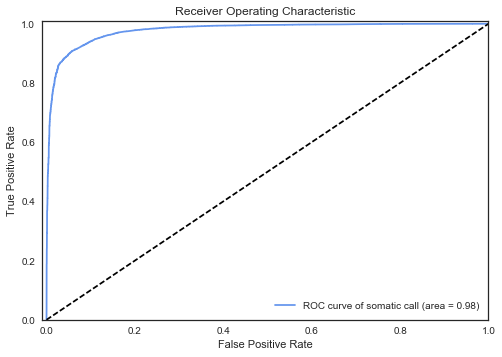

In [84]:
plt.title('Receiver Operating Characteristic')
fpr, tpr, _ = metrics.roc_curve(binary_Y, somatic_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='cornflowerblue',label='ROC curve of somatic call'
         ' (area = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

confidence intervals +-:  [ 0.00076448  0.00744795  0.01226755  0.01465366  0.01620529  0.01764818
  0.01660018  0.0130748   0.01013683  0.00086672]


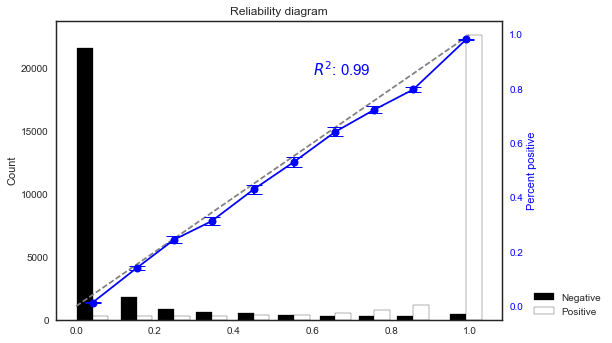

In [85]:
create_reliability_diagram(binary_probabilities, np.array([np.logical_not(binary_Y),binary_Y]).T,['Fail', 'Somatic'], 'blue')

## Feature importance analysis

In [86]:
feature_metrics = determine_feature_importance(baseline_binary_model(), X, pd.concat([~two_class.call,two_class.call],axis=1).astype(int).values)

Epoch 1/10
27065/27065 [==============================] - 26s - loss: 0.2254 - acc: 0.9050    
Epoch 2/10
27065/27065 [==============================] - 29s - loss: 0.1769 - acc: 0.9288    
Epoch 3/10
27065/27065 [==============================] - 26s - loss: 0.1655 - acc: 0.9332    
Epoch 4/10
27065/27065 [==============================] - 27s - loss: 0.1589 - acc: 0.9372    
Epoch 5/10
27065/27065 [==============================] - 27s - loss: 0.1551 - acc: 0.9379    
Epoch 6/10
27065/27065 [==============================] - 28s - loss: 0.1509 - acc: 0.9391    
Epoch 7/10
27065/27065 [==============================] - 28s - loss: 0.1478 - acc: 0.9412    
Epoch 8/10
27065/27065 [==============================] - 28s - loss: 0.1470 - acc: 0.9404    
Epoch 9/10
27065/27065 [==============================] - 28s - loss: 0.1440 - acc: 0.9413    
Epoch 10/10
27040/27065 [============================>.] - ETA: 0s

In [87]:
feature_metrics.head(15)

feature  shuffled_loss  shuffled_accuracy  \
0                                   disease       0.497287           0.846998   
51            tumor_var_avg_mapping_quality       0.302189           0.883724   
1                                  reviewer       0.244677           0.897247   
47                tumor_var_avg_basequality       0.280788           0.901644   
2                                normal_VAF       0.198583           0.928616   
12        normal_ref_avg_se_mapping_quality       0.148860           0.936228   
31                                tumor_VAF       0.175993           0.936265   
39  tumor_ref_avg_num_mismaches_as_fraction       0.152059           0.938777   
34                tumor_ref_avg_basequality       0.137716           0.939257   
55     tumor_var_avg_sum_mismatch_qualities       0.152253           0.939479   
53            tumor_var_avg_pos_as_fraction       0.144218           0.939664   
18               normal_var_avg_basequality       0.155246           0.939885   
41         tumor_ref_avg_se_mapping_quality       0.140865           0.941696   
19            normal_var_avg_clipped_length       0.146631           0.942361   
48             tumor_var_avg_clipped_length       0.145036           0.942804   

    delta_loss  delta_accuracy  
0    -0.363719        0.100647  
51   -0.168621        0.063920  
1    -0.111109        0.050397  
47   -0.147221        0.046000  
2    -0.065016        0.019028  
12   -0.015293        0.011417  
31   -0.042426        0.011380  
39   -0.018492        0.008868  
34   -0.004149        0.008387  
55   -0.018686        0.008166  
53   -0.010651        0.007981  
18   -0.021679        0.007759  
41   -0.007298        0.005949  
19   -0.013063        0.005284  
48   -0.011469        0.004840

* elu model
* drop amb
* som/amb/fail model
* different roc curves for each class
* look at signal for miscalls
* ambig analysis
* run on filtered variants one study
* variant callers roc curve
* trained model feature analyasis top ten feature
* new model -- reviewer variability - shuffel all reviewers and classify model

# Test set

In [6]:
three_class = training_data.replace('g','f')

In [7]:
three_class.groupby('call').size()

call
a    14589
f     5909
s    21156
dtype: int64

In [8]:
# Get Labels
Y = pd.get_dummies(three_class.call).astype(float).values
# Get training data as numpy array, drop reviewer and call
X = three_class.drop(three_class.columns[10:13].tolist() + ['call', 'binary_call'], axis=1).astype(float).values

In [9]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=seed)

In [11]:
X_train.shape

(27908, 68)

In [12]:
Y_train.shape

(27908, 3)

In [13]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(68, input_dim=68, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(3, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=700, batch_size=2000, verbose=1)

In [15]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [16]:
if not os.path.exists('../data/deep_learning/threeclass_tanh_test_noreviewer_probs.npy'):
    probabilities = cross_val_predict(estimator, X_train, Y_train, cv=kfold, method='predict_proba')
    np.save('../data/deep_learning/threeclass_tanh_test_noreviewer_probs.npy', probabilities)
else:
    probabilities = np.load('../data/deep_learning/threeclass_tanh_test_noreviewer_probs.npy')

Epoch 1/700
25117/25117 [==============================] - 1s - loss: 1.0513 - acc: 0.4772     
Epoch 2/700
25117/25117 [==============================] - 0s - loss: 0.9829 - acc: 0.5040     
Epoch 3/700
25117/25117 [==============================] - 0s - loss: 0.9537 - acc: 0.5112     
Epoch 4/700
25117/25117 [==============================] - 0s - loss: 0.9101 - acc: 0.5507     
Epoch 5/700
25117/25117 [==============================] - 0s - loss: 0.8672 - acc: 0.5988     
Epoch 6/700
25117/25117 [==============================] - 0s - loss: 0.8270 - acc: 0.6094     
Epoch 7/700
25117/25117 [==============================] - 0s - loss: 0.7870 - acc: 0.6292     
Epoch 8/700
25117/25117 [==============================] - 0s - loss: 0.7471 - acc: 0.6598     
Epoch 9/700
25117/25117 [==============================] - 0s - loss: 0.7100 - acc: 0.6936     
Epoch 10/700
25117/25117 [==============================] - 0s - loss: 0.6828 - acc: 0.7159     
Epoch 11/700
25117/25117 [=============

25117/25117 [==============================] - 0s - loss: 0.4557 - acc: 0.8093     
Epoch 169/700
25117/25117 [==============================] - 0s - loss: 0.4547 - acc: 0.8119     
Epoch 170/700
25117/25117 [==============================] - 0s - loss: 0.4543 - acc: 0.8116     
Epoch 171/700
25117/25117 [==============================] - 0s - loss: 0.4559 - acc: 0.8086     
Epoch 172/700
25117/25117 [==============================] - 0s - loss: 0.4558 - acc: 0.8104     
Epoch 173/700
25117/25117 [==============================] - 0s - loss: 0.4530 - acc: 0.8102     
Epoch 174/700
25117/25117 [==============================] - 0s - loss: 0.4526 - acc: 0.8115     
Epoch 175/700
25117/25117 [==============================] - 0s - loss: 0.4546 - acc: 0.8111     
Epoch 176/700
25117/25117 [==============================] - 0s - loss: 0.4522 - acc: 0.8118     
Epoch 177/700
25117/25117 [==============================] - 0s - loss: 0.4524 - acc: 0.8134     
Epoch 178/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4185 - acc: 0.8257     
Epoch 335/700
25117/25117 [==============================] - 0s - loss: 0.4192 - acc: 0.8254     
Epoch 336/700
25117/25117 [==============================] - 0s - loss: 0.4232 - acc: 0.8223     
Epoch 337/700
25117/25117 [==============================] - 0s - loss: 0.4185 - acc: 0.8246     
Epoch 338/700
25117/25117 [==============================] - 0s - loss: 0.4190 - acc: 0.8246     
Epoch 339/700
25117/25117 [==============================] - 0s - loss: 0.4191 - acc: 0.8242     
Epoch 340/700
25117/25117 [==============================] - 0s - loss: 0.4189 - acc: 0.8247     
Epoch 341/700
25117/25117 [==============================] - 0s - loss: 0.4196 - acc: 0.8244     
Epoch 342/700
25117/25117 [==============================] - 0s - loss: 0.4197 - acc: 0.8241     
Epoch 343/700
25117/25117 [==============================] - 0s - loss: 0.4190 - acc: 0.8241     
Epoch 344/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4005 - acc: 0.8318     
Epoch 500/700
25117/25117 [==============================] - 0s - loss: 0.4006 - acc: 0.8319     
Epoch 501/700
25117/25117 [==============================] - 0s - loss: 0.4010 - acc: 0.8310     
Epoch 502/700
25117/25117 [==============================] - 0s - loss: 0.4036 - acc: 0.8296     
Epoch 503/700
25117/25117 [==============================] - 0s - loss: 0.4037 - acc: 0.8315     
Epoch 504/700
25117/25117 [==============================] - 0s - loss: 0.4017 - acc: 0.8311     
Epoch 505/700
25117/25117 [==============================] - 0s - loss: 0.4014 - acc: 0.8314     
Epoch 506/700
25117/25117 [==============================] - 0s - loss: 0.4005 - acc: 0.8318     
Epoch 507/700
25117/25117 [==============================] - 0s - loss: 0.3993 - acc: 0.8325     
Epoch 508/700
25117/25117 [==============================] - 0s - loss: 0.3996 - acc: 0.8320     
Epoch 509/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.3895 - acc: 0.8364     
Epoch 665/700
25117/25117 [==============================] - 0s - loss: 0.3896 - acc: 0.8350     
Epoch 666/700
25117/25117 [==============================] - 0s - loss: 0.3892 - acc: 0.8362     
Epoch 667/700
25117/25117 [==============================] - 0s - loss: 0.3885 - acc: 0.8368     
Epoch 668/700
25117/25117 [==============================] - 0s - loss: 0.3884 - acc: 0.8360     
Epoch 669/700
25117/25117 [==============================] - 0s - loss: 0.3901 - acc: 0.8356     
Epoch 670/700
25117/25117 [==============================] - 0s - loss: 0.3901 - acc: 0.8357     
Epoch 671/700
25117/25117 [==============================] - 0s - loss: 0.3899 - acc: 0.8362     
Epoch 672/700
25117/25117 [==============================] - 0s - loss: 0.3883 - acc: 0.8381     
Epoch 673/700
25117/25117 [==============================] - 0s - loss: 0.3894 - acc: 0.8366     
Epoch 674/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4702 - acc: 0.8063     
Epoch 131/700
25117/25117 [==============================] - 0s - loss: 0.4697 - acc: 0.8059     
Epoch 132/700
25117/25117 [==============================] - 0s - loss: 0.4711 - acc: 0.8042     
Epoch 133/700
25117/25117 [==============================] - 0s - loss: 0.4686 - acc: 0.8070     
Epoch 134/700
25117/25117 [==============================] - 0s - loss: 0.4713 - acc: 0.8053     
Epoch 135/700
25117/25117 [==============================] - 0s - loss: 0.4693 - acc: 0.8060     
Epoch 136/700
25117/25117 [==============================] - 0s - loss: 0.4678 - acc: 0.8064     
Epoch 137/700
25117/25117 [==============================] - 0s - loss: 0.4669 - acc: 0.8078     
Epoch 138/700
25117/25117 [==============================] - 0s - loss: 0.4671 - acc: 0.8071     
Epoch 139/700
25117/25117 [==============================] - 0s - loss: 0.4667 - acc: 0.8066     
Epoch 140/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4299 - acc: 0.8214     
Epoch 296/700
25117/25117 [==============================] - 0s - loss: 0.4306 - acc: 0.8217     
Epoch 297/700
25117/25117 [==============================] - 0s - loss: 0.4298 - acc: 0.8214     
Epoch 298/700
25117/25117 [==============================] - 0s - loss: 0.4300 - acc: 0.8231     
Epoch 299/700
25117/25117 [==============================] - 0s - loss: 0.4344 - acc: 0.8186     
Epoch 300/700
25117/25117 [==============================] - 0s - loss: 0.4323 - acc: 0.8204     
Epoch 301/700
25117/25117 [==============================] - 0s - loss: 0.4291 - acc: 0.8207     
Epoch 302/700
25117/25117 [==============================] - 0s - loss: 0.4305 - acc: 0.8211     
Epoch 303/700
25117/25117 [==============================] - 0s - loss: 0.4305 - acc: 0.8219     
Epoch 304/700
25117/25117 [==============================] - 0s - loss: 0.4311 - acc: 0.8206     
Epoch 305/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4104 - acc: 0.8279     
Epoch 461/700
25117/25117 [==============================] - 0s - loss: 0.4108 - acc: 0.8278     
Epoch 462/700
25117/25117 [==============================] - 0s - loss: 0.4120 - acc: 0.8272     
Epoch 463/700
25117/25117 [==============================] - 0s - loss: 0.4118 - acc: 0.8281     
Epoch 464/700
25117/25117 [==============================] - 0s - loss: 0.4096 - acc: 0.8287     
Epoch 465/700
25117/25117 [==============================] - 0s - loss: 0.4100 - acc: 0.8290     
Epoch 466/700
25117/25117 [==============================] - 0s - loss: 0.4129 - acc: 0.8270     
Epoch 467/700
25117/25117 [==============================] - 0s - loss: 0.4102 - acc: 0.8275     
Epoch 468/700
25117/25117 [==============================] - 0s - loss: 0.4095 - acc: 0.8285     
Epoch 469/700
25117/25117 [==============================] - 0s - loss: 0.4134 - acc: 0.8274     
Epoch 470/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.3962 - acc: 0.8333     
Epoch 626/700
25117/25117 [==============================] - 0s - loss: 0.3965 - acc: 0.8338     
Epoch 627/700
25117/25117 [==============================] - 0s - loss: 0.3990 - acc: 0.8336     
Epoch 628/700
25117/25117 [==============================] - 0s - loss: 0.3967 - acc: 0.8350     
Epoch 629/700
25117/25117 [==============================] - 0s - loss: 0.3959 - acc: 0.8335     
Epoch 630/700
25117/25117 [==============================] - 0s - loss: 0.3992 - acc: 0.8325     
Epoch 631/700
25117/25117 [==============================] - 0s - loss: 0.3976 - acc: 0.8333     
Epoch 632/700
25117/25117 [==============================] - 0s - loss: 0.3980 - acc: 0.8341     
Epoch 633/700
25117/25117 [==============================] - 0s - loss: 0.3985 - acc: 0.8331     
Epoch 634/700
25117/25117 [==============================] - 0s - loss: 0.4014 - acc: 0.8328     
Epoch 635/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.5000 - acc: 0.7940     
Epoch 92/700
25117/25117 [==============================] - 0s - loss: 0.4995 - acc: 0.7956     
Epoch 93/700
25117/25117 [==============================] - 0s - loss: 0.4984 - acc: 0.7962     
Epoch 94/700
25117/25117 [==============================] - 0s - loss: 0.4969 - acc: 0.7958     
Epoch 95/700
25117/25117 [==============================] - 0s - loss: 0.4973 - acc: 0.7961     
Epoch 96/700
25117/25117 [==============================] - 0s - loss: 0.4968 - acc: 0.7960     
Epoch 97/700
25117/25117 [==============================] - 0s - loss: 0.4941 - acc: 0.7975     
Epoch 98/700
25117/25117 [==============================] - 0s - loss: 0.4938 - acc: 0.7976     
Epoch 99/700
25117/25117 [==============================] - 0s - loss: 0.4939 - acc: 0.7969     
Epoch 100/700
25117/25117 [==============================] - 0s - loss: 0.4929 - acc: 0.7987     
Epoch 101/700
25117/25117 [===============

25117/25117 [==============================] - 0s - loss: 0.4398 - acc: 0.8174     
Epoch 258/700
25117/25117 [==============================] - 0s - loss: 0.4401 - acc: 0.8166     
Epoch 259/700
25117/25117 [==============================] - 0s - loss: 0.4390 - acc: 0.8173     
Epoch 260/700
25117/25117 [==============================] - 0s - loss: 0.4421 - acc: 0.8168     
Epoch 261/700
25117/25117 [==============================] - 0s - loss: 0.4411 - acc: 0.8160     
Epoch 262/700
25117/25117 [==============================] - 0s - loss: 0.4381 - acc: 0.8182     
Epoch 263/700
25117/25117 [==============================] - 0s - loss: 0.4376 - acc: 0.8175     
Epoch 264/700
25117/25117 [==============================] - 0s - loss: 0.4389 - acc: 0.8167     
Epoch 265/700
25117/25117 [==============================] - 0s - loss: 0.4428 - acc: 0.8161     
Epoch 266/700
25117/25117 [==============================] - 0s - loss: 0.4423 - acc: 0.8167     
Epoch 267/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4173 - acc: 0.8260     
Epoch 423/700
25117/25117 [==============================] - 0s - loss: 0.4187 - acc: 0.8249     
Epoch 424/700
25117/25117 [==============================] - 0s - loss: 0.4175 - acc: 0.8245     
Epoch 425/700
25117/25117 [==============================] - 0s - loss: 0.4169 - acc: 0.8249     
Epoch 426/700
25117/25117 [==============================] - 0s - loss: 0.4174 - acc: 0.8243     
Epoch 427/700
25117/25117 [==============================] - 0s - loss: 0.4170 - acc: 0.8254     
Epoch 428/700
25117/25117 [==============================] - 0s - loss: 0.4173 - acc: 0.8262     
Epoch 429/700
25117/25117 [==============================] - 0s - loss: 0.4178 - acc: 0.8245     
Epoch 430/700
25117/25117 [==============================] - 0s - loss: 0.4183 - acc: 0.8256     
Epoch 431/700
25117/25117 [==============================] - 0s - loss: 0.4173 - acc: 0.8241     
Epoch 432/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4047 - acc: 0.8305     
Epoch 587/700
25117/25117 [==============================] - 0s - loss: 0.4022 - acc: 0.8306     
Epoch 588/700
25117/25117 [==============================] - 0s - loss: 0.4020 - acc: 0.8311     
Epoch 589/700
25117/25117 [==============================] - 0s - loss: 0.4033 - acc: 0.8300     
Epoch 590/700
25117/25117 [==============================] - 0s - loss: 0.4050 - acc: 0.8293     
Epoch 591/700
25117/25117 [==============================] - 0s - loss: 0.4023 - acc: 0.8299     
Epoch 592/700
25117/25117 [==============================] - 0s - loss: 0.4056 - acc: 0.8300     
Epoch 593/700
25117/25117 [==============================] - 0s - loss: 0.4035 - acc: 0.8302     
Epoch 594/700
25117/25117 [==============================] - 0s - loss: 0.4011 - acc: 0.8304     
Epoch 595/700
25117/25117 [==============================] - 0s - loss: 0.4032 - acc: 0.8301     
Epoch 596/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.5457 - acc: 0.7789     
Epoch 52/700
25117/25117 [==============================] - 0s - loss: 0.5449 - acc: 0.7788     - ETA: 0s - loss: 0.5451 - acc: 0.778
Epoch 53/700
25117/25117 [==============================] - 0s - loss: 0.5446 - acc: 0.7789     
Epoch 54/700
25117/25117 [==============================] - 0s - loss: 0.5447 - acc: 0.7806     
Epoch 55/700
25117/25117 [==============================] - 0s - loss: 0.5456 - acc: 0.7786     
Epoch 56/700
25117/25117 [==============================] - 0s - loss: 0.5436 - acc: 0.7801     
Epoch 57/700
25117/25117 [==============================] - 0s - loss: 0.5431 - acc: 0.7802     
Epoch 58/700
25117/25117 [==============================] - 0s - loss: 0.5397 - acc: 0.7809     
Epoch 59/700
25117/25117 [==============================] - 0s - loss: 0.5369 - acc: 0.7821     
Epoch 60/700
25117/25117 [==============================] - 0s - loss: 0.5351 - acc: 0.7834     
Epoch 

25117/25117 [==============================] - 0s - loss: 0.4452 - acc: 0.8152     
Epoch 218/700
25117/25117 [==============================] - 0s - loss: 0.4460 - acc: 0.8154     
Epoch 219/700
25117/25117 [==============================] - 0s - loss: 0.4462 - acc: 0.8160     
Epoch 220/700
25117/25117 [==============================] - 0s - loss: 0.4458 - acc: 0.8156     
Epoch 221/700
25117/25117 [==============================] - 0s - loss: 0.4444 - acc: 0.8151     
Epoch 222/700
25117/25117 [==============================] - 0s - loss: 0.4474 - acc: 0.8142     
Epoch 223/700
25117/25117 [==============================] - 0s - loss: 0.4505 - acc: 0.8135     
Epoch 224/700
25117/25117 [==============================] - 0s - loss: 0.4511 - acc: 0.8134     
Epoch 225/700
25117/25117 [==============================] - 0s - loss: 0.4460 - acc: 0.8152     
Epoch 226/700
25117/25117 [==============================] - 0s - loss: 0.4436 - acc: 0.8167     
Epoch 227/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4199 - acc: 0.8239     
Epoch 383/700
25117/25117 [==============================] - 0s - loss: 0.4167 - acc: 0.8256     
Epoch 384/700
25117/25117 [==============================] - 0s - loss: 0.4172 - acc: 0.8254     
Epoch 385/700
25117/25117 [==============================] - 0s - loss: 0.4174 - acc: 0.8250     
Epoch 386/700
25117/25117 [==============================] - 0s - loss: 0.4170 - acc: 0.8249     
Epoch 387/700
25117/25117 [==============================] - 0s - loss: 0.4174 - acc: 0.8246     
Epoch 388/700
25117/25117 [==============================] - 0s - loss: 0.4171 - acc: 0.8251     
Epoch 389/700
25117/25117 [==============================] - 0s - loss: 0.4182 - acc: 0.8250     
Epoch 390/700
25117/25117 [==============================] - 0s - loss: 0.4156 - acc: 0.8253     
Epoch 391/700
25117/25117 [==============================] - 0s - loss: 0.4158 - acc: 0.8257     
Epoch 392/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4007 - acc: 0.8320     
Epoch 547/700
25117/25117 [==============================] - 0s - loss: 0.3999 - acc: 0.8319     
Epoch 548/700
25117/25117 [==============================] - 0s - loss: 0.3994 - acc: 0.8318     
Epoch 549/700
25117/25117 [==============================] - 0s - loss: 0.4009 - acc: 0.8309     
Epoch 550/700
25117/25117 [==============================] - 0s - loss: 0.3999 - acc: 0.8312     
Epoch 551/700
25117/25117 [==============================] - 0s - loss: 0.3990 - acc: 0.8324     
Epoch 552/700
25117/25117 [==============================] - 0s - loss: 0.3999 - acc: 0.8312     
Epoch 553/700
25117/25117 [==============================] - 0s - loss: 0.4004 - acc: 0.8316     
Epoch 554/700
25117/25117 [==============================] - 0s - loss: 0.3999 - acc: 0.8319     
Epoch 555/700
25117/25117 [==============================] - 0s - loss: 0.4001 - acc: 0.8320     
Epoch 556/700
25117/25117 [=======

25117/25117 [==============================] - ETA: 0s - loss: 0.6906 - acc: 0.712 - 0s - loss: 0.6888 - acc: 0.7146     
Epoch 11/700
25117/25117 [==============================] - 0s - loss: 0.6662 - acc: 0.7249     
Epoch 12/700
25117/25117 [==============================] - 0s - loss: 0.6505 - acc: 0.7317     
Epoch 13/700
25117/25117 [==============================] - 0s - loss: 0.6413 - acc: 0.7342     
Epoch 14/700
25117/25117 [==============================] - 0s - loss: 0.6311 - acc: 0.7369     
Epoch 15/700
25117/25117 [==============================] - 0s - loss: 0.6263 - acc: 0.7397     
Epoch 16/700
25117/25117 [==============================] - 0s - loss: 0.6190 - acc: 0.7408     
Epoch 17/700
25117/25117 [==============================] - 0s - loss: 0.6141 - acc: 0.7435     
Epoch 18/700
25117/25117 [==============================] - 0s - loss: 0.6096 - acc: 0.7444     
Epoch 19/700
25117/25117 [==============================] - 0s - loss: 0.6043 - acc: 0.7484     
Epoch

25117/25117 [==============================] - 0s - loss: 0.4581 - acc: 0.8103     
Epoch 177/700
25117/25117 [==============================] - 0s - loss: 0.4576 - acc: 0.8104     
Epoch 178/700
25117/25117 [==============================] - 0s - loss: 0.4581 - acc: 0.8103     
Epoch 179/700
25117/25117 [==============================] - 0s - loss: 0.4588 - acc: 0.8094     
Epoch 180/700
25117/25117 [==============================] - 0s - loss: 0.4581 - acc: 0.8100     
Epoch 181/700
25117/25117 [==============================] - 0s - loss: 0.4581 - acc: 0.8110     
Epoch 182/700
25117/25117 [==============================] - 0s - loss: 0.4601 - acc: 0.8085     
Epoch 183/700
25117/25117 [==============================] - 0s - loss: 0.4599 - acc: 0.8087     
Epoch 184/700
25117/25117 [==============================] - 0s - loss: 0.4606 - acc: 0.8096     
Epoch 185/700
25117/25117 [==============================] - 0s - loss: 0.4617 - acc: 0.8095     
Epoch 186/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4267 - acc: 0.8218     
Epoch 343/700
25117/25117 [==============================] - 0s - loss: 0.4263 - acc: 0.8212     
Epoch 344/700
25117/25117 [==============================] - 0s - loss: 0.4227 - acc: 0.8244     
Epoch 345/700
25117/25117 [==============================] - 0s - loss: 0.4226 - acc: 0.8227     
Epoch 346/700
25117/25117 [==============================] - 0s - loss: 0.4213 - acc: 0.8239     
Epoch 347/700
25117/25117 [==============================] - 0s - loss: 0.4221 - acc: 0.8240     
Epoch 348/700
25117/25117 [==============================] - 0s - loss: 0.4223 - acc: 0.8233     
Epoch 349/700
25117/25117 [==============================] - 0s - loss: 0.4210 - acc: 0.8252     
Epoch 350/700
25117/25117 [==============================] - 0s - loss: 0.4216 - acc: 0.8250     
Epoch 351/700
25117/25117 [==============================] - 0s - loss: 0.4227 - acc: 0.8231     
Epoch 352/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4067 - acc: 0.8295     
Epoch 508/700
25117/25117 [==============================] - 0s - loss: 0.4068 - acc: 0.8290     
Epoch 509/700
25117/25117 [==============================] - 0s - loss: 0.4062 - acc: 0.8291     
Epoch 510/700
25117/25117 [==============================] - 0s - loss: 0.4053 - acc: 0.8300     
Epoch 511/700
25117/25117 [==============================] - 0s - loss: 0.4061 - acc: 0.8293     
Epoch 512/700
25117/25117 [==============================] - 0s - loss: 0.4047 - acc: 0.8299     
Epoch 513/700
25117/25117 [==============================] - 0s - loss: 0.4044 - acc: 0.8296     
Epoch 514/700
25117/25117 [==============================] - 0s - loss: 0.4047 - acc: 0.8298     
Epoch 515/700
25117/25117 [==============================] - 0s - loss: 0.4056 - acc: 0.8303     
Epoch 516/700
25117/25117 [==============================] - 0s - loss: 0.4067 - acc: 0.8292     
Epoch 517/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.3952 - acc: 0.8336     
Epoch 672/700
25117/25117 [==============================] - 0s - loss: 0.3934 - acc: 0.8344     
Epoch 673/700
25117/25117 [==============================] - ETA: 0s - loss: 0.3925 - acc: 0.834 - 0s - loss: 0.3932 - acc: 0.8342     
Epoch 674/700
25117/25117 [==============================] - 0s - loss: 0.3924 - acc: 0.8350     
Epoch 675/700
25117/25117 [==============================] - 0s - loss: 0.3929 - acc: 0.8341     
Epoch 676/700
25117/25117 [==============================] - 0s - loss: 0.3931 - acc: 0.8340     
Epoch 677/700
25117/25117 [==============================] - 0s - loss: 0.3967 - acc: 0.8331     
Epoch 678/700
25117/25117 [==============================] - 0s - loss: 0.3974 - acc: 0.8319     
Epoch 679/700
25117/25117 [==============================] - 0s - loss: 0.3970 - acc: 0.8322     
Epoch 680/700
25117/25117 [==============================] - 0s - loss: 0.3934 - acc: 0.8341  

25117/25117 [==============================] - 0s - loss: 0.5325 - acc: 0.7823     
Epoch 55/700
25117/25117 [==============================] - 0s - loss: 0.5324 - acc: 0.7835     
Epoch 56/700
25117/25117 [==============================] - 0s - loss: 0.5313 - acc: 0.7840     
Epoch 57/700
25117/25117 [==============================] - 0s - loss: 0.5293 - acc: 0.7852     
Epoch 58/700
25117/25117 [==============================] - 0s - loss: 0.5282 - acc: 0.7842     
Epoch 59/700
25117/25117 [==============================] - 0s - loss: 0.5270 - acc: 0.7855     
Epoch 60/700
25117/25117 [==============================] - 0s - loss: 0.5281 - acc: 0.7849     
Epoch 61/700
25117/25117 [==============================] - 0s - loss: 0.5262 - acc: 0.7854     
Epoch 62/700
25117/25117 [==============================] - 0s - loss: 0.5246 - acc: 0.7872     
Epoch 63/700
25117/25117 [==============================] - 0s - loss: 0.5238 - acc: 0.7868     
Epoch 64/700
25117/25117 [=================

25117/25117 [==============================] - 0s - loss: 0.4708 - acc: 0.8074     
Epoch 138/700
25117/25117 [==============================] - 0s - loss: 0.4711 - acc: 0.8066     
Epoch 139/700
25117/25117 [==============================] - 0s - loss: 0.4711 - acc: 0.8067     
Epoch 140/700
25117/25117 [==============================] - 0s - loss: 0.4692 - acc: 0.8073     
Epoch 141/700
25117/25117 [==============================] - 0s - loss: 0.4683 - acc: 0.8084     
Epoch 142/700
25117/25117 [==============================] - 0s - loss: 0.4703 - acc: 0.8058     
Epoch 143/700
25117/25117 [==============================] - 0s - loss: 0.4678 - acc: 0.8069     
Epoch 144/700
25117/25117 [==============================] - 0s - loss: 0.4675 - acc: 0.8073     
Epoch 145/700
25117/25117 [==============================] - 0s - loss: 0.4663 - acc: 0.8090     
Epoch 146/700
25117/25117 [==============================] - 0s - loss: 0.4665 - acc: 0.8085     
Epoch 147/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4264 - acc: 0.8216     
Epoch 303/700
25117/25117 [==============================] - 0s - loss: 0.4257 - acc: 0.8235     
Epoch 304/700
25117/25117 [==============================] - 0s - loss: 0.4243 - acc: 0.8227     
Epoch 305/700
25117/25117 [==============================] - 0s - loss: 0.4255 - acc: 0.8224     
Epoch 306/700
25117/25117 [==============================] - 0s - loss: 0.4259 - acc: 0.8224     
Epoch 307/700
25117/25117 [==============================] - 0s - loss: 0.4283 - acc: 0.8227     
Epoch 308/700
25117/25117 [==============================] - 0s - loss: 0.4284 - acc: 0.8217     
Epoch 309/700
25117/25117 [==============================] - 0s - loss: 0.4271 - acc: 0.8216     
Epoch 310/700
25117/25117 [==============================] - 0s - loss: 0.4255 - acc: 0.8231     
Epoch 311/700
25117/25117 [==============================] - 0s - loss: 0.4275 - acc: 0.8220     
Epoch 312/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4078 - acc: 0.8300     
Epoch 467/700
25117/25117 [==============================] - 0s - loss: 0.4083 - acc: 0.8292     
Epoch 468/700
25117/25117 [==============================] - 0s - loss: 0.4076 - acc: 0.8289     
Epoch 469/700
25117/25117 [==============================] - 0s - loss: 0.4057 - acc: 0.8302     
Epoch 470/700
25117/25117 [==============================] - 0s - loss: 0.4060 - acc: 0.8303     
Epoch 471/700
25117/25117 [==============================] - 0s - loss: 0.4051 - acc: 0.8310     
Epoch 472/700
25117/25117 [==============================] - 0s - loss: 0.4055 - acc: 0.8308     
Epoch 473/700
25117/25117 [==============================] - 0s - loss: 0.4047 - acc: 0.8314     
Epoch 474/700
25117/25117 [==============================] - 0s - loss: 0.4060 - acc: 0.8308     
Epoch 475/700
25117/25117 [==============================] - 0s - loss: 0.4047 - acc: 0.8306     
Epoch 476/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.3930 - acc: 0.8349     
Epoch 631/700
25117/25117 [==============================] - 0s - loss: 0.3942 - acc: 0.8345     
Epoch 632/700
25117/25117 [==============================] - 0s - loss: 0.3960 - acc: 0.8350     
Epoch 633/700
25117/25117 [==============================] - 0s - loss: 0.3946 - acc: 0.8353     
Epoch 634/700
25117/25117 [==============================] - 0s - loss: 0.3970 - acc: 0.8333     
Epoch 635/700
25117/25117 [==============================] - 0s - loss: 0.3956 - acc: 0.8351     
Epoch 636/700
25117/25117 [==============================] - ETA: 0s - loss: 0.3959 - acc: 0.835 - 0s - loss: 0.3978 - acc: 0.8338     
Epoch 637/700
25117/25117 [==============================] - 0s - loss: 0.3991 - acc: 0.8319     
Epoch 638/700
25117/25117 [==============================] - 0s - loss: 0.3934 - acc: 0.8351     
Epoch 639/700
25117/25117 [==============================] - 0s - loss: 0.3939 - acc: 0.8353  

25117/25117 [==============================] - 0s - loss: 0.4978 - acc: 0.7928     
Epoch 97/700
25117/25117 [==============================] - 0s - loss: 0.4978 - acc: 0.7937     
Epoch 98/700
25117/25117 [==============================] - 0s - loss: 0.4963 - acc: 0.7939     
Epoch 99/700
25117/25117 [==============================] - 0s - loss: 0.4966 - acc: 0.7949     
Epoch 100/700
25117/25117 [==============================] - 0s - loss: 0.4954 - acc: 0.7945     
Epoch 101/700
25117/25117 [==============================] - 0s - loss: 0.4953 - acc: 0.7942     
Epoch 102/700
25117/25117 [==============================] - 0s - loss: 0.4951 - acc: 0.7947     
Epoch 103/700
25117/25117 [==============================] - 0s - loss: 0.4940 - acc: 0.7954     
Epoch 104/700
25117/25117 [==============================] - 0s - loss: 0.4948 - acc: 0.7936     
Epoch 105/700
25117/25117 [==============================] - 0s - loss: 0.4937 - acc: 0.7963     
Epoch 106/700
25117/25117 [==========

25117/25117 [==============================] - 0s - loss: 0.4383 - acc: 0.8176     
Epoch 263/700
25117/25117 [==============================] - 0s - loss: 0.4368 - acc: 0.8172     
Epoch 264/700
25117/25117 [==============================] - 0s - loss: 0.4364 - acc: 0.8177     
Epoch 265/700
25117/25117 [==============================] - 0s - loss: 0.4358 - acc: 0.8169     
Epoch 266/700
25117/25117 [==============================] - 0s - loss: 0.4362 - acc: 0.8179     
Epoch 267/700
25117/25117 [==============================] - 0s - loss: 0.4368 - acc: 0.8176     
Epoch 268/700
25117/25117 [==============================] - 0s - loss: 0.4355 - acc: 0.8183     
Epoch 269/700
25117/25117 [==============================] - 0s - loss: 0.4344 - acc: 0.8182     
Epoch 270/700
25117/25117 [==============================] - 0s - loss: 0.4367 - acc: 0.8175     
Epoch 271/700
25117/25117 [==============================] - 0s - loss: 0.4392 - acc: 0.8161     
Epoch 272/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4148 - acc: 0.8259     
Epoch 428/700
25117/25117 [==============================] - 0s - loss: 0.4153 - acc: 0.8257     
Epoch 429/700
25117/25117 [==============================] - 0s - loss: 0.4126 - acc: 0.8272     
Epoch 430/700
25117/25117 [==============================] - 0s - loss: 0.4125 - acc: 0.8263     
Epoch 431/700
25117/25117 [==============================] - 0s - loss: 0.4123 - acc: 0.8274     
Epoch 432/700
25117/25117 [==============================] - 0s - loss: 0.4132 - acc: 0.8265     
Epoch 433/700
25117/25117 [==============================] - 0s - loss: 0.4118 - acc: 0.8287     
Epoch 434/700
25117/25117 [==============================] - 0s - loss: 0.4160 - acc: 0.8263     
Epoch 435/700
25117/25117 [==============================] - 0s - loss: 0.4144 - acc: 0.8261     
Epoch 436/700
25117/25117 [==============================] - 0s - loss: 0.4126 - acc: 0.8282     
Epoch 437/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.3996 - acc: 0.8312     
Epoch 594/700
25117/25117 [==============================] - 0s - loss: 0.3991 - acc: 0.8325     
Epoch 595/700
25117/25117 [==============================] - 0s - loss: 0.4012 - acc: 0.8306     
Epoch 596/700
25117/25117 [==============================] - 0s - loss: 0.4009 - acc: 0.8312     
Epoch 597/700
25117/25117 [==============================] - 0s - loss: 0.4001 - acc: 0.8318     
Epoch 598/700
25117/25117 [==============================] - 0s - loss: 0.4018 - acc: 0.8314     
Epoch 599/700
25117/25117 [==============================] - 0s - loss: 0.4001 - acc: 0.8319     
Epoch 600/700
25117/25117 [==============================] - 0s - loss: 0.3995 - acc: 0.8322     
Epoch 601/700
25117/25117 [==============================] - 0s - loss: 0.3999 - acc: 0.8321     
Epoch 602/700
25117/25117 [==============================] - 0s - loss: 0.4009 - acc: 0.8314     
Epoch 603/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.5337 - acc: 0.7833     
Epoch 59/700
25117/25117 [==============================] - 0s - loss: 0.5321 - acc: 0.7827     
Epoch 60/700
25117/25117 [==============================] - 0s - loss: 0.5319 - acc: 0.7832     
Epoch 61/700
25117/25117 [==============================] - 0s - loss: 0.5301 - acc: 0.7842     
Epoch 62/700
25117/25117 [==============================] - 0s - loss: 0.5288 - acc: 0.7839     
Epoch 63/700
25117/25117 [==============================] - 0s - loss: 0.5269 - acc: 0.7850     
Epoch 64/700
25117/25117 [==============================] - 0s - loss: 0.5262 - acc: 0.7842     
Epoch 65/700
25117/25117 [==============================] - 0s - loss: 0.5249 - acc: 0.7845     
Epoch 66/700
25117/25117 [==============================] - 0s - loss: 0.5252 - acc: 0.7846     
Epoch 67/700
25117/25117 [==============================] - 0s - loss: 0.5244 - acc: 0.7861     
Epoch 68/700
25117/25117 [=================

25117/25117 [==============================] - 0s - loss: 0.4617 - acc: 0.8087     
Epoch 142/700
25117/25117 [==============================] - 0s - loss: 0.4614 - acc: 0.8092     
Epoch 143/700
25117/25117 [==============================] - 0s - loss: 0.4597 - acc: 0.8089     
Epoch 144/700
25117/25117 [==============================] - 0s - loss: 0.4606 - acc: 0.8090     
Epoch 145/700
25117/25117 [==============================] - 0s - loss: 0.4593 - acc: 0.8096     
Epoch 146/700
25117/25117 [==============================] - 0s - loss: 0.4594 - acc: 0.8102     
Epoch 147/700
25117/25117 [==============================] - 0s - loss: 0.4594 - acc: 0.8098     
Epoch 148/700
25117/25117 [==============================] - 0s - loss: 0.4587 - acc: 0.8097     
Epoch 149/700
25117/25117 [==============================] - 0s - loss: 0.4575 - acc: 0.8119     
Epoch 150/700
25117/25117 [==============================] - 0s - loss: 0.4574 - acc: 0.8107     
Epoch 151/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.4226 - acc: 0.8243     
Epoch 308/700
25117/25117 [==============================] - ETA: 0s - loss: 0.4269 - acc: 0.821 - 0s - loss: 0.4240 - acc: 0.8227     
Epoch 309/700
25117/25117 [==============================] - 0s - loss: 0.4262 - acc: 0.8222     
Epoch 310/700
25117/25117 [==============================] - 0s - loss: 0.4281 - acc: 0.8221     
Epoch 311/700
25117/25117 [==============================] - 0s - loss: 0.4236 - acc: 0.8224     
Epoch 312/700
25117/25117 [==============================] - 0s - loss: 0.4229 - acc: 0.8225     
Epoch 313/700
25117/25117 [==============================] - 0s - loss: 0.4232 - acc: 0.8233     
Epoch 314/700
25117/25117 [==============================] - 0s - loss: 0.4223 - acc: 0.8235     
Epoch 315/700
25117/25117 [==============================] - 0s - loss: 0.4234 - acc: 0.8222     
Epoch 316/700
25117/25117 [==============================] - 0s - loss: 0.4222 - acc: 0.8231  

25117/25117 [==============================] - 0s - loss: 0.4057 - acc: 0.8294     
Epoch 473/700
25117/25117 [==============================] - 0s - loss: 0.4054 - acc: 0.8301     
Epoch 474/700
25117/25117 [==============================] - 0s - loss: 0.4055 - acc: 0.8298     
Epoch 475/700
25117/25117 [==============================] - 0s - loss: 0.4070 - acc: 0.8288     
Epoch 476/700
25117/25117 [==============================] - 0s - loss: 0.4045 - acc: 0.8292     
Epoch 477/700
25117/25117 [==============================] - 0s - loss: 0.4041 - acc: 0.8293     
Epoch 478/700
25117/25117 [==============================] - 0s - loss: 0.4038 - acc: 0.8298     
Epoch 479/700
25117/25117 [==============================] - 0s - loss: 0.4046 - acc: 0.8301     
Epoch 480/700
25117/25117 [==============================] - 0s - loss: 0.4042 - acc: 0.8300     
Epoch 481/700
25117/25117 [==============================] - 0s - loss: 0.4042 - acc: 0.8305     
Epoch 482/700
25117/25117 [=======

25117/25117 [==============================] - 0s - loss: 0.3936 - acc: 0.8339     
Epoch 639/700
25117/25117 [==============================] - 0s - loss: 0.3941 - acc: 0.8336     
Epoch 640/700
25117/25117 [==============================] - 0s - loss: 0.3931 - acc: 0.8351     
Epoch 641/700
25117/25117 [==============================] - 0s - loss: 0.3983 - acc: 0.8332     
Epoch 642/700
25117/25117 [==============================] - 0s - loss: 0.3950 - acc: 0.8329     
Epoch 643/700
25117/25117 [==============================] - 0s - loss: 0.3929 - acc: 0.8334     
Epoch 644/700
25117/25117 [==============================] - 0s - loss: 0.3950 - acc: 0.8347     
Epoch 645/700
25117/25117 [==============================] - 0s - loss: 0.3971 - acc: 0.8318     
Epoch 646/700
25117/25117 [==============================] - 0s - loss: 0.3952 - acc: 0.8330     
Epoch 647/700
25117/25117 [==============================] - 0s - loss: 0.3935 - acc: 0.8344     
Epoch 648/700
25117/25117 [=======

25118/25118 [==============================] - 0s - loss: 0.4865 - acc: 0.7991     
Epoch 105/700
25118/25118 [==============================] - 0s - loss: 0.4860 - acc: 0.7988     
Epoch 106/700
25118/25118 [==============================] - 0s - loss: 0.4858 - acc: 0.7987     
Epoch 107/700
25118/25118 [==============================] - 0s - loss: 0.4848 - acc: 0.7999     
Epoch 108/700
25118/25118 [==============================] - 0s - loss: 0.4835 - acc: 0.7999     
Epoch 109/700
25118/25118 [==============================] - 0s - loss: 0.4827 - acc: 0.8000     
Epoch 110/700
25118/25118 [==============================] - 0s - loss: 0.4846 - acc: 0.7995     
Epoch 111/700
25118/25118 [==============================] - 0s - loss: 0.4821 - acc: 0.8015     
Epoch 112/700
25118/25118 [==============================] - 0s - loss: 0.4813 - acc: 0.8019     
Epoch 113/700
25118/25118 [==============================] - 0s - loss: 0.4809 - acc: 0.8015     
Epoch 114/700
25118/25118 [=======

25118/25118 [==============================] - 0s - loss: 0.4350 - acc: 0.8212     
Epoch 270/700
25118/25118 [==============================] - 0s - loss: 0.4353 - acc: 0.8201     
Epoch 271/700
25118/25118 [==============================] - 0s - loss: 0.4351 - acc: 0.8197     
Epoch 272/700
25118/25118 [==============================] - 0s - loss: 0.4340 - acc: 0.8203     
Epoch 273/700
25118/25118 [==============================] - 0s - loss: 0.4365 - acc: 0.8186     
Epoch 274/700
25118/25118 [==============================] - 0s - loss: 0.4346 - acc: 0.8207     
Epoch 275/700
25118/25118 [==============================] - 0s - loss: 0.4330 - acc: 0.8203     
Epoch 276/700
25118/25118 [==============================] - 0s - loss: 0.4328 - acc: 0.8209     
Epoch 277/700
25118/25118 [==============================] - 0s - loss: 0.4321 - acc: 0.8212     
Epoch 278/700
25118/25118 [==============================] - 0s - loss: 0.4322 - acc: 0.8209     
Epoch 279/700
25118/25118 [=======

25118/25118 [==============================] - 0s - loss: 0.4170 - acc: 0.8247     
Epoch 436/700
25118/25118 [==============================] - 0s - loss: 0.4145 - acc: 0.8273     
Epoch 437/700
25118/25118 [==============================] - 0s - loss: 0.4145 - acc: 0.8267     
Epoch 438/700
25118/25118 [==============================] - 0s - loss: 0.4149 - acc: 0.8268     
Epoch 439/700
25118/25118 [==============================] - 0s - loss: 0.4151 - acc: 0.8270     - ETA: 0s - loss: 0.4128 - acc: 0.828
Epoch 440/700
25118/25118 [==============================] - 0s - loss: 0.4148 - acc: 0.8279     
Epoch 441/700
25118/25118 [==============================] - 0s - loss: 0.4138 - acc: 0.8279     
Epoch 442/700
25118/25118 [==============================] - 0s - loss: 0.4132 - acc: 0.8266     
Epoch 443/700
25118/25118 [==============================] - 0s - loss: 0.4134 - acc: 0.8268     
Epoch 444/700
25118/25118 [==============================] - 0s - loss: 0.4131 - acc: 0.8280   

25118/25118 [==============================] - ETA: 0s - loss: 0.3982 - acc: 0.833 - 0s - loss: 0.4053 - acc: 0.8306     
Epoch 602/700
25118/25118 [==============================] - 0s - loss: 0.4031 - acc: 0.8300     
Epoch 603/700
25118/25118 [==============================] - 0s - loss: 0.4007 - acc: 0.8310     
Epoch 604/700
25118/25118 [==============================] - ETA: 0s - loss: 0.3974 - acc: 0.833 - 0s - loss: 0.4007 - acc: 0.8325     
Epoch 605/700
25118/25118 [==============================] - 0s - loss: 0.3998 - acc: 0.8314     
Epoch 606/700
25118/25118 [==============================] - 0s - loss: 0.3998 - acc: 0.8316     
Epoch 607/700
25118/25118 [==============================] - 0s - loss: 0.4011 - acc: 0.8321     
Epoch 608/700
25118/25118 [==============================] - 0s - loss: 0.4012 - acc: 0.8304     
Epoch 609/700
25118/25118 [==============================] - 0s - loss: 0.4002 - acc: 0.8318     
Epoch 610/700
25118/25118 [=============================

25118/25118 [==============================] - 0s - loss: 0.5304 - acc: 0.7846     
Epoch 67/700
25118/25118 [==============================] - 0s - loss: 0.5293 - acc: 0.7848     
Epoch 68/700
25118/25118 [==============================] - 0s - loss: 0.5293 - acc: 0.7859     
Epoch 69/700
25118/25118 [==============================] - 0s - loss: 0.5291 - acc: 0.7847     
Epoch 70/700
25118/25118 [==============================] - 0s - loss: 0.5277 - acc: 0.7849     
Epoch 71/700
25118/25118 [==============================] - 0s - loss: 0.5258 - acc: 0.7857     
Epoch 72/700
25118/25118 [==============================] - 0s - loss: 0.5260 - acc: 0.7858     
Epoch 73/700
25118/25118 [==============================] - 0s - loss: 0.5231 - acc: 0.7868     
Epoch 74/700
25118/25118 [==============================] - 0s - loss: 0.5219 - acc: 0.7867     
Epoch 75/700
25118/25118 [==============================] - 0s - loss: 0.5211 - acc: 0.7879     - ETA: 0s - loss: 0.5225 - acc: 0.787
Epoch 

25118/25118 [==============================] - 0s - loss: 0.4368 - acc: 0.8187     
Epoch 233/700
25118/25118 [==============================] - 0s - loss: 0.4360 - acc: 0.8180     
Epoch 234/700
25118/25118 [==============================] - 0s - loss: 0.4340 - acc: 0.8201     
Epoch 235/700
25118/25118 [==============================] - 0s - loss: 0.4341 - acc: 0.8185     
Epoch 236/700
25118/25118 [==============================] - 0s - loss: 0.4338 - acc: 0.8200     
Epoch 237/700
25118/25118 [==============================] - 0s - loss: 0.4343 - acc: 0.8188     
Epoch 238/700
25118/25118 [==============================] - 0s - loss: 0.4333 - acc: 0.8199     
Epoch 239/700
25118/25118 [==============================] - 0s - loss: 0.4334 - acc: 0.8203     
Epoch 240/700
25118/25118 [==============================] - 0s - loss: 0.4344 - acc: 0.8197     
Epoch 241/700
25118/25118 [==============================] - 0s - loss: 0.4335 - acc: 0.8191     
Epoch 242/700
25118/25118 [=======

25118/25118 [==============================] - 0s - loss: 0.4134 - acc: 0.8264     
Epoch 399/700
25118/25118 [==============================] - 0s - loss: 0.4137 - acc: 0.8271     
Epoch 400/700
25118/25118 [==============================] - 0s - loss: 0.4138 - acc: 0.8273     
Epoch 401/700
25118/25118 [==============================] - 0s - loss: 0.4119 - acc: 0.8259     
Epoch 402/700
25118/25118 [==============================] - 0s - loss: 0.4121 - acc: 0.8272     
Epoch 403/700
25118/25118 [==============================] - 0s - loss: 0.4120 - acc: 0.8269     
Epoch 404/700
25118/25118 [==============================] - 0s - loss: 0.4122 - acc: 0.8277     
Epoch 405/700
25118/25118 [==============================] - 0s - loss: 0.4118 - acc: 0.8271     
Epoch 406/700
25118/25118 [==============================] - 0s - loss: 0.4121 - acc: 0.8273     
Epoch 407/700
25118/25118 [==============================] - 0s - loss: 0.4107 - acc: 0.8276     
Epoch 408/700
25118/25118 [=======

25118/25118 [==============================] - 0s - loss: 0.3977 - acc: 0.8329     
Epoch 565/700
25118/25118 [==============================] - 0s - loss: 0.3977 - acc: 0.8322     
Epoch 566/700
25118/25118 [==============================] - 0s - loss: 0.3973 - acc: 0.8339     
Epoch 567/700
25118/25118 [==============================] - 0s - loss: 0.3983 - acc: 0.8331     
Epoch 568/700
25118/25118 [==============================] - 0s - loss: 0.3975 - acc: 0.8333     
Epoch 569/700
25118/25118 [==============================] - 0s - loss: 0.3980 - acc: 0.8334     
Epoch 570/700
25118/25118 [==============================] - 0s - loss: 0.3996 - acc: 0.8324     
Epoch 571/700
25118/25118 [==============================] - 0s - loss: 0.3994 - acc: 0.8310     
Epoch 572/700
25118/25118 [==============================] - 0s - loss: 0.3982 - acc: 0.8323     
Epoch 573/700
25118/25118 [==============================] - 0s - loss: 0.3974 - acc: 0.8324     
Epoch 574/700
25118/25118 [=======

In [17]:
predicted = np.array([list(a).index(max(list(a))) for a in list(probabilities)])

In [18]:
label_binarizer = preprocessing.LabelBinarizer()

label_binarizer.fit(range(max(predicted)+1))
predicted_transformed = label_binarizer.transform(predicted)

In [19]:
metrics.accuracy_score(Y_train, predicted_transformed)

0.8139959868138168

#### Classification report
* 0 = ambiguous
* 1 = fail
* 2 = germline
* 3 = somatic

In [20]:
print(metrics.classification_report(Y_train, predicted_transformed))

             precision    recall  f1-score   support

          0       0.80      0.75      0.78      9882
          1       0.66      0.78      0.71      3968
          2       0.87      0.87      0.87     14058

avg / total       0.82      0.81      0.81     27908



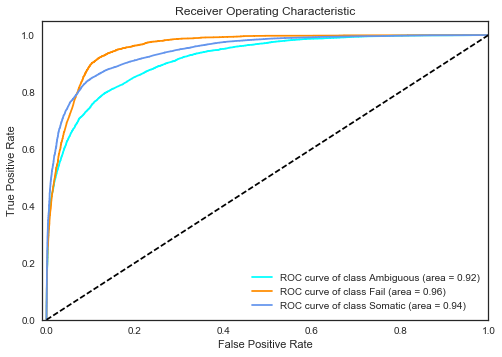

In [21]:
n_classes = Y_train.shape[1]
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Somatic'}
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.title('Receiver Operating Characteristic')
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = metrics.roc_curve(Y_train[:, i], probabilities[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0}'
             ' (area = {1:0.2f})'.format(class_lookup[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

confidence intervals +-:  [ 0.00076224  0.00480291  0.00637777  0.00737085  0.00860215  0.01059822
  0.00951246  0.0081652   0.00608496  0.00159207]


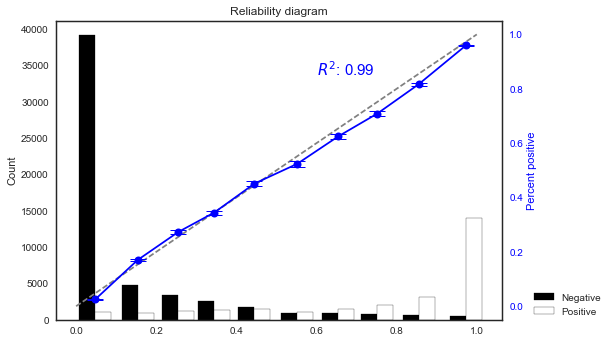

In [22]:
create_reliability_diagram(probabilities, Y_train,['Ambiguous','Fail','Somatic'], 'blue')

## Feature importance analysis

In [27]:
feature_metrics = determine_feature_importance(estimator, X_test, Y_test, True)

Epoch 1/700
13746/13746 [==============================] - 0s - loss: 1.0771 - acc: 0.4654     
Epoch 2/700
13746/13746 [==============================] - 0s - loss: 1.0194 - acc: 0.5167     
Epoch 3/700
13746/13746 [==============================] - 0s - loss: 0.9835 - acc: 0.5164     
Epoch 4/700
13746/13746 [==============================] - 0s - loss: 0.9628 - acc: 0.5164     
Epoch 5/700
13746/13746 [==============================] - 0s - loss: 0.9470 - acc: 0.5173     
Epoch 6/700
13746/13746 [==============================] - 0s - loss: 0.9262 - acc: 0.5289     
Epoch 7/700
13746/13746 [==============================] - 0s - loss: 0.8983 - acc: 0.5576     
Epoch 8/700
13746/13746 [==============================] - 0s - loss: 0.8730 - acc: 0.5916     
Epoch 9/700
13746/13746 [==============================] - 0s - loss: 0.8481 - acc: 0.6008     
Epoch 10/700
13746/13746 [==============================] - 0s - loss: 0.8263 - acc: 0.6117     
Epoch 11/700
13746/13746 [=============

13746/13746 [==============================] - 0s - loss: 0.4759 - acc: 0.8047     
Epoch 169/700
13746/13746 [==============================] - 0s - loss: 0.4778 - acc: 0.8040     
Epoch 170/700
13746/13746 [==============================] - 0s - loss: 0.4752 - acc: 0.8039     
Epoch 171/700
13746/13746 [==============================] - 0s - loss: 0.4734 - acc: 0.8052     
Epoch 172/700
13746/13746 [==============================] - 0s - loss: 0.4745 - acc: 0.8029     
Epoch 173/700
13746/13746 [==============================] - 0s - loss: 0.4744 - acc: 0.8042     
Epoch 174/700
13746/13746 [==============================] - 0s - loss: 0.4771 - acc: 0.8030     
Epoch 175/700
13746/13746 [==============================] - 0s - loss: 0.4745 - acc: 0.8054     
Epoch 176/700
13746/13746 [==============================] - 0s - loss: 0.4741 - acc: 0.8055     
Epoch 177/700
13746/13746 [==============================] - 0s - loss: 0.4728 - acc: 0.8046     
Epoch 178/700
13746/13746 [=======

13746/13746 [==============================] - 0s - loss: 0.4309 - acc: 0.8210     
Epoch 334/700
13746/13746 [==============================] - 0s - loss: 0.4302 - acc: 0.8220     
Epoch 335/700
13746/13746 [==============================] - 0s - loss: 0.4310 - acc: 0.8209     
Epoch 336/700
13746/13746 [==============================] - 0s - loss: 0.4319 - acc: 0.8204     
Epoch 337/700
13746/13746 [==============================] - 0s - loss: 0.4292 - acc: 0.8199     
Epoch 338/700
13746/13746 [==============================] - 0s - loss: 0.4303 - acc: 0.8216     
Epoch 339/700
13746/13746 [==============================] - 0s - loss: 0.4278 - acc: 0.8227     
Epoch 340/700
13746/13746 [==============================] - 0s - loss: 0.4270 - acc: 0.8219     
Epoch 341/700
13746/13746 [==============================] - 0s - loss: 0.4278 - acc: 0.8219     
Epoch 342/700
13746/13746 [==============================] - 0s - loss: 0.4281 - acc: 0.8205     
Epoch 343/700
13746/13746 [=======

13746/13746 [==============================] - 0s - loss: 0.4024 - acc: 0.8322     
Epoch 500/700
13746/13746 [==============================] - 0s - loss: 0.4038 - acc: 0.8322     
Epoch 501/700
13746/13746 [==============================] - 0s - loss: 0.4033 - acc: 0.8318     
Epoch 502/700
13746/13746 [==============================] - 0s - loss: 0.4054 - acc: 0.8311     
Epoch 503/700
13746/13746 [==============================] - 0s - loss: 0.4029 - acc: 0.8331     
Epoch 504/700
13746/13746 [==============================] - 0s - loss: 0.4055 - acc: 0.8301     
Epoch 505/700
13746/13746 [==============================] - 0s - loss: 0.4039 - acc: 0.8322     
Epoch 506/700
13746/13746 [==============================] - 0s - loss: 0.4058 - acc: 0.8314     
Epoch 507/700
13746/13746 [==============================] - 0s - loss: 0.4077 - acc: 0.8296     
Epoch 508/700
13746/13746 [==============================] - 0s - loss: 0.4092 - acc: 0.8290     
Epoch 509/700
13746/13746 [=======

13746/13746 [==============================] - 0s - loss: 0.3846 - acc: 0.8398     
Epoch 665/700
13746/13746 [==============================] - 0s - loss: 0.3839 - acc: 0.8383     
Epoch 666/700
13746/13746 [==============================] - 0s - loss: 0.3839 - acc: 0.8382     
Epoch 667/700
13746/13746 [==============================] - 0s - loss: 0.3839 - acc: 0.8387     
Epoch 668/700
13746/13746 [==============================] - 0s - loss: 0.3841 - acc: 0.8384     
Epoch 669/700
13746/13746 [==============================] - 0s - loss: 0.3860 - acc: 0.8385     
Epoch 670/700
13746/13746 [==============================] - 0s - loss: 0.3885 - acc: 0.8390     
Epoch 671/700
13746/13746 [==============================] - 0s - loss: 0.3899 - acc: 0.8376     - ETA: 0s - loss: 0.3894 - acc: 0.836
Epoch 672/700
13746/13746 [==============================] - 0s - loss: 0.3917 - acc: 0.8342     
Epoch 673/700
13746/13746 [==============================] - 0s - loss: 0.3881 - acc: 0.8376   

In [28]:
feature_metrics.head(15)

feature  shuffled_auc  delta_auc
0                                          disease      0.761110   0.193206
31                                     tumor_depth      0.870290   0.084027
51         tumor_var_avg_num_mismaches_as_fraction      0.871507   0.082809
48      tumor_var_avg_distance_to_effective_3p_end      0.881706   0.072610
47                    tumor_var_avg_clipped_length      0.914368   0.039948
12           normal_ref_avg_sum_mismatch_qualities      0.919151   0.035165
55                                 tumor_var_count      0.931268   0.023049
35      tumor_ref_avg_distance_to_effective_3p_end      0.936468   0.017848
49  tumor_var_avg_distance_to_q2_start_in_q2_reads      0.939766   0.014550
2                                     normal_depth      0.940927   0.013390
41            tumor_ref_avg_sum_mismatch_qualities      0.941881   0.012436
25           normal_var_avg_sum_mismatch_qualities      0.942163   0.012153
54            tumor_var_avg_sum_mismatch_qualities      0.942721   0.011596
19     normal_var_avg_distance_to_effective_3p_end      0.943826   0.010490
18                   normal_var_avg_clipped_length      0.944075   0.010241

In [27]:
test_probs = estimator.predict_proba(X_test)

 2000/13746 [===>..........................] - ETA: 0s

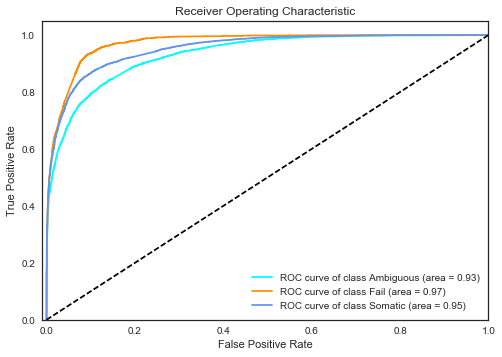

In [28]:
n_classes = Y_test.shape[1]
class_lookup = {0: 'Ambiguous', 1: 'Fail', 2: 'Somatic'}
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.title('Receiver Operating Characteristic')
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])
for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = metrics.roc_curve(Y_test[:, i], test_probs[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0}'
             ' (area = {1:0.2f})'.format(class_lookup[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

confidence intervals +-:  [ 0.00085231  0.00577859  0.00898874  0.01081233  0.01160554  0.01528722
  0.01322622  0.00994922  0.00719615  0.00172029]


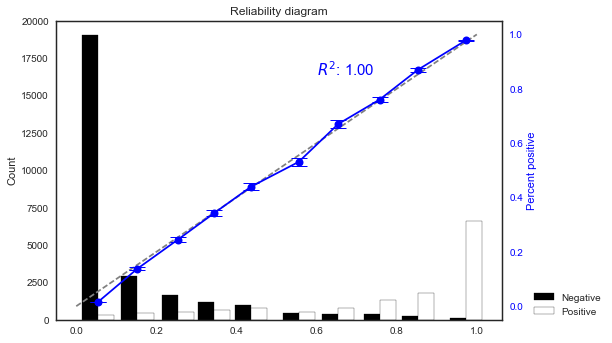

In [29]:
create_reliability_diagram(test_probs, Y_test,['Ambiguous','Fail','Somatic'], 'blue')